___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
# !pip install kmodes

In [2]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# scikit learn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score, PrecisionRecallDisplay, plot_precision_recall_curve, plot_roc_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

# scikit learn library for clustering
# from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from pyclustertend import hopkins

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix, PrecisionRecallCurve
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

# To set float format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [3]:
df = pd.read_csv("HR_Dataset.csv")

In [4]:
# Create a copy of df

df_copy = df.copy()

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [7]:
df.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Departments  salary  
14994                      0      support    low  
14995                      0      support    low  
14996                      0      support    low  
14997                      0      support    low  
14998                      0      support    low

In [8]:
df.sample(20)

satisfaction_level  last_evaluation  number_project  \
9914                 0.70             0.76               3   
11047                0.36             0.44               5   
2599                 0.48             0.89               5   
283                  0.10             0.93               6   
11513                0.98             0.49               3   
14912                0.11             0.80               6   
8473                 0.71             0.97               3   
10138                0.91             0.88               5   
7245                 0.75             0.96               4   
1955                 0.09             0.81               6   
11176                0.65             1.00               4   
10285                0.65             0.76               4   
6226                 0.87             0.82               3   
9784                 0.43             0.81               3   
2168                 0.80             0.94               4   
3988                 0.72             0.51               3   
3173                 0.93             0.77               5   
1417                 0.11             0.96               6   
6268                 0.96             0.51               4   
6519                 0.91             0.76               3   

       average_montly_hours  time_spend_company  Work_accident  left  \
9914                    173                   2              0     0   
11047                   155                   3              0     0   
2599                    179                   3              0     0   
283                     289                   4              1     1   
11513                   199                  10              0     0   
14912                   304                   4              0     1   
8473                    173                   2              1     0   
10138                   123                   5              0     0   
7245                    150                   2              0     0   
1955                    257                   4              0     1   
11176                   229                   4              0     0   
10285                   171                   4              0     0   
6226                    224                   3              0     0   
9784                    102                   3              0     0   
2168                    136                   2              0     0   
3988                    146                   2              1     0   
3173                    106                   5              0     0   
1417                    301                   5              0     1   
6268                    237                   3              0     0   
6519                    159                   3              0     0   

       promotion_last_5years Departments   salary  
9914                       0  product_mng     low  
11047                      0    technical  medium  
2599                       0   management  medium  
283                        0      support     low  
11513                      0    technical  medium  
14912                      0    technical     low  
8473                       0    marketing  medium  
10138                      0           IT     low  
7245                       0  product_mng     low  
1955                       0      support     low  
11176                      0  product_mng     low  
10285                      0    technical     low  
6226                       0    technical     low  
9784                       0        sales  medium  
2168                       0           hr  medium  
3988                       0        sales     low  
3173                       0    technical  medium  
1417                       0    technical     low  
6268                       0        sales     low  
6519                       0           hr  medium

In [9]:
# Checking the null values in df

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [10]:
# Checking the number of uniques

df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [11]:
# Defining a function to first look for each column

def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Percent_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number_of_Nulls   : ', df[col].isnull().sum())
    print('Number_of_Uniques : ', df[col].nunique())
    print()
    print(f"Value_counts of {col} column:\n", "--"*20,"\n", df[col].value_counts(dropna = False).head(10))
    print()
    if df[col].dtypes == "O" :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index(key = lambda x : x.str.lower()).head(10))
    else :
        print(f"Value_counts of {col} column with sort_index : \n", "--"*20,"\n", df[col].value_counts(dropna = False).sort_index().head(10))
    print()

In [12]:
# Checking the columns in df using first_look function

for col in df.columns :
    first_look(col)

column name :  satisfaction_level
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  92

Value_counts of satisfaction_level column:
 ---------------------------------------- 
 0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
0.73    246
0.78    241
0.37    241
0.82    241
0.89    237
Name: satisfaction_level, dtype: int64

Value_counts of satisfaction_level column with sort_index : 
 ---------------------------------------- 
 0.09    195
0.10    358
0.11    335
0.12     30
0.13     54
0.14     73
0.15     76
0.16     79
0.17     72
0.18     63
Name: satisfaction_level, dtype: int64

column name :  last_evaluation
--------------------------------
Percent_of_Nulls   :  % 0.0
Number_of_Nulls   :  0
Number_of_Uniques :  65

Value_counts of last_evaluation column:
 ---------------------------------------- 
 0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
0.49    332
0.87    326
0.53    324
0.56    322
0.85    316
N

In [13]:
# descriptive statistics for numerical columns

df.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level    14999.00   0.61  0.25  0.09   0.44   0.64   0.82   1.00
last_evaluation       14999.00   0.72  0.17  0.36   0.56   0.72   0.87   1.00
number_project        14999.00   3.80  1.23  2.00   3.00   4.00   5.00   7.00
average_montly_hours  14999.00 201.05 49.94 96.00 156.00 200.00 245.00 310.00
time_spend_company    14999.00   3.50  1.46  2.00   3.00   3.00   4.00  10.00
Work_accident         14999.00   0.14  0.35  0.00   0.00   0.00   0.00   1.00
left                  14999.00   0.24  0.43  0.00   0.00   0.00   0.00   1.00
promotion_last_5years 14999.00   0.02  0.14  0.00   0.00   0.00   0.00   1.00

In [14]:
# descriptive statistics for categorical columns

df.describe(include="O").T

count unique    top  freq
Departments   14999     10  sales  4140
salary        14999      3    low  7316

In [15]:
# descriptive statistics for numerical column by target column("left")

df.groupby("left").describe()

satisfaction_level                                    last_evaluation  \
                  count mean  std  min  25%  50%  75%  max           count   
left                                                                         
0              11428.00 0.67 0.22 0.12 0.54 0.69 0.84 1.00        11428.00   
1               3571.00 0.44 0.26 0.09 0.13 0.41 0.73 0.92         3571.00   

                                        number_project                      \
     mean  std  min  25%  50%  75%  max          count mean  std  min  25%   
left                                                                         
0    0.72 0.16 0.36 0.58 0.71 0.85 1.00       11428.00 3.79 0.98 2.00 3.00   
1    0.72 0.20 0.45 0.52 0.79 0.90 1.00        3571.00 3.86 1.82 2.00 2.00   

                    average_montly_hours                                    \
      50%  75%  max                count   mean   std    min    25%    50%   
left                                                                         
0    4.00 4.00 6.00             11428.00 199.06 45.68  96.00 162.00 198.00   
1    4.00 6.00 7.00              3571.00 207.42 61.20 126.00 146.00 224.00   

                   time_spend_company                                      \
        75%    max              count mean  std  min  25%  50%  75%   max   
left                                                                        
0    238.00 287.00           11428.00 3.38 1.56 2.00 2.00 3.00 4.00 10.00   
1    262.00 310.00            3571.00 3.88 0.98 2.00 3.00 4.00 5.00  6.00   

     Work_accident                                    promotion_last_5years  \
             count mean  std  min  25%  50%  75%  max                 count   
left                                                                          
0         11428.00 0.18 0.38 0.00 0.00 0.00 0.00 1.00              11428.00   
1          3571.00 0.05 0.21 0.00 0.00 0.00 0.00 1.00               3571.00   

                                         
     mean  std  min  25%  50%  75%  max  
left                                     
0    0.03 0.16 0.00 0.00 0.00 0.00 1.00  
1    0.01 0.07 0.00 0.00 0.00 0.00 1.00

In [16]:
# descriptive statistics for categorical column by target column("left")

df.groupby("left").describe(include="O")

Departments                      salary                  
            count unique    top  freq  count unique  top  freq
left                                                          
0           11428     10  sales  3126  11428      3  low  5144
1            3571     10  sales  1014   3571      3  low  2172

In [17]:
# checking duplicates

df.duplicated().sum()

3008

In [18]:
# checking the percentage of duplicates in df

df.duplicated().sum()/df.shape[0]

0.2005467031135409

In [19]:
# dropping duplicates

df = df.drop_duplicates().reset_index(drop=True)

In [20]:
# cleaning column names

from skimpy import clean_columns
df = clean_columns(df)
df.columns

2 column names have been cleaned

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [21]:
# changing the position of "left" column in df

df = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 
       'promotion_last_5years', 'departments', 'salary','left']]

In [22]:
# checking the descriptive statistics of df after dropping duplicates

df.describe().T

count   mean   std   min    25%    50%    75%    max
satisfaction_level    11991.00   0.63  0.24  0.09   0.48   0.66   0.82   1.00
last_evaluation       11991.00   0.72  0.17  0.36   0.57   0.72   0.86   1.00
number_project        11991.00   3.80  1.16  2.00   3.00   4.00   5.00   7.00
average_montly_hours  11991.00 200.47 48.73 96.00 157.00 200.00 243.00 310.00
time_spend_company    11991.00   3.36  1.33  2.00   3.00   3.00   4.00  10.00
work_accident         11991.00   0.15  0.36  0.00   0.00   0.00   0.00   1.00
promotion_last_5years 11991.00   0.02  0.13  0.00   0.00   0.00   0.00   1.00
left                  11991.00   0.17  0.37  0.00   0.00   0.00   0.00   1.00

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

*Feel free to add more visualization

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

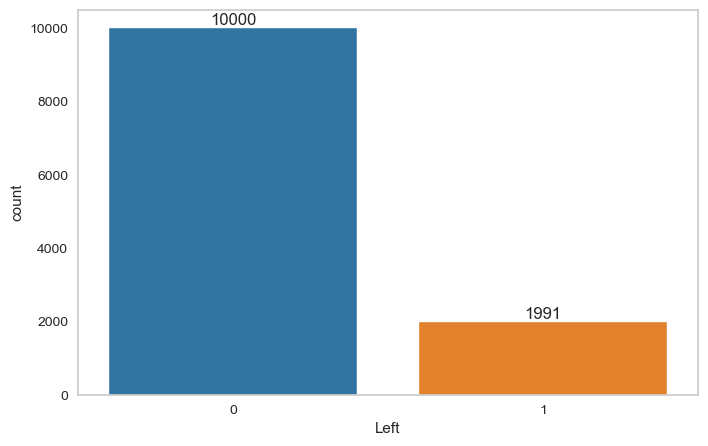

In [23]:
# Checking the value counts of target column

plt.figure(figsize=(8,5))
ax = sns.countplot(x="left", data=df, palette="tab10")
plt.xlabel("Left")
ax.bar_label(ax.containers[0]);

In [24]:
# Checking the percentage of target column values

df.left.value_counts(normalize=True)

0   0.83
1   0.17
Name: left, dtype: float64

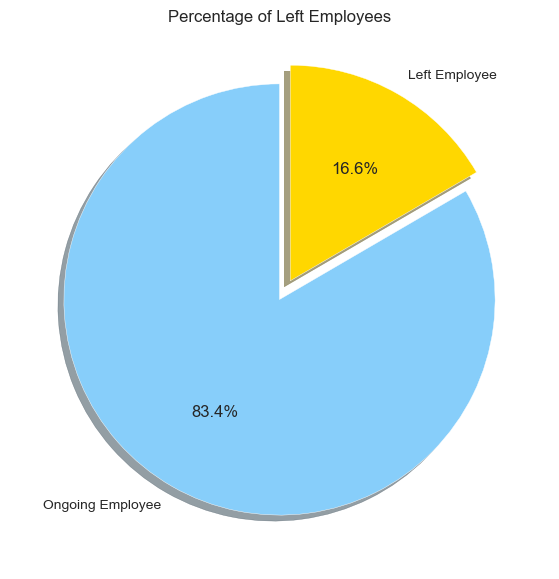

In [25]:
# Percentage of Employees based on the "left" feature

fig = plt.figure(figsize =(10, 7))
plt.pie(df.left.value_counts(normalize=True), 
        labels = ["Ongoing Employee","Left Employee"], explode = (0, 0.1),autopct='%1.1f%%',shadow=True, startangle=90,
        colors=['LightSkyBlue', 'gold'])
plt.title("Percentage of Left Employees")
plt.show()

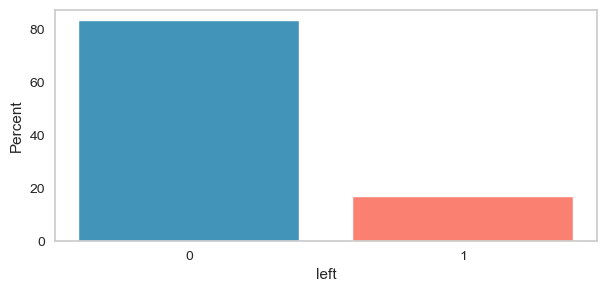

In [26]:
# from Allen

fig, ax = plt.subplots(figsize=(7, 3))
sns.histplot(x=df['left'], discrete=1, stat='percent', shrink=.8, kde=False, ax=ax)
ax.bar_label(ax.containers[0], fmt='%.0f%%', padding=-20, fontsize=14, weight='bold', c='w');
ax.patches[1].set_facecolor('salmon')
plt.xticks([0, 1]);

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

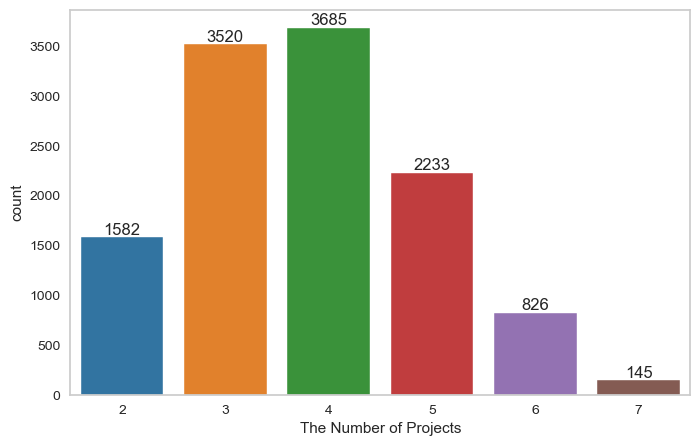

In [27]:
# The number of employee by the number of projects

plt.figure(figsize=(8,5))
ax = sns.countplot(x="number_project", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
ax.bar_label(ax.containers[0]);

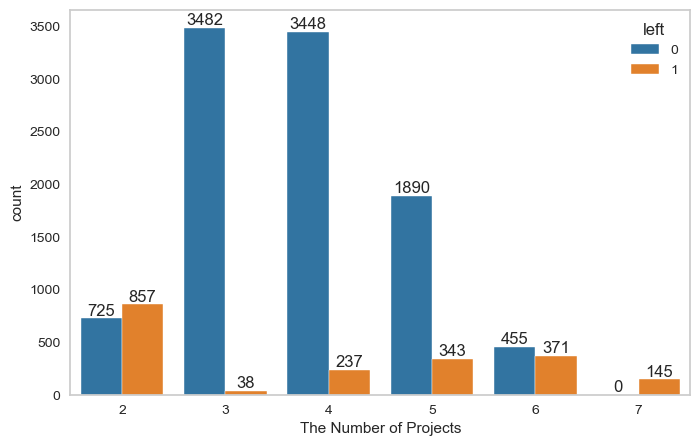

In [28]:
# The number of employee by the number of projects and left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="number_project", hue = "left", data=df, palette="tab10")
plt.xlabel("The Number of Projects")
for i in ax.containers:
    ax.bar_label(i);

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


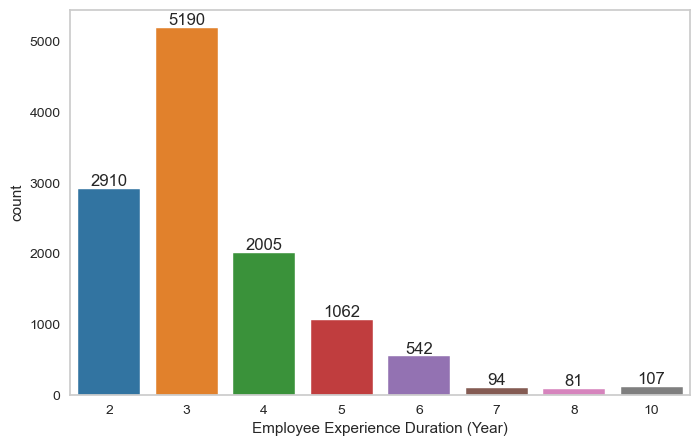

In [29]:
# The number of employee by the employee experience

plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_spend_company", data=df, palette="tab10")
plt.xlabel("Employee Experience Duration (Year)")
ax.bar_label(ax.containers[0]);

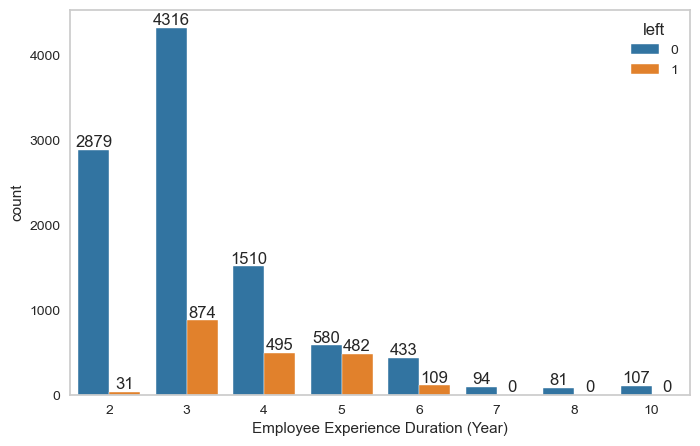

In [30]:
# The number of employee by the employee experience and left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="time_spend_company", hue="left", data=df, palette = "tab10")
plt.xlabel("Employee Experience Duration (Year)")
for i in ax.containers:
    ax.bar_label(i)

### Work Accident

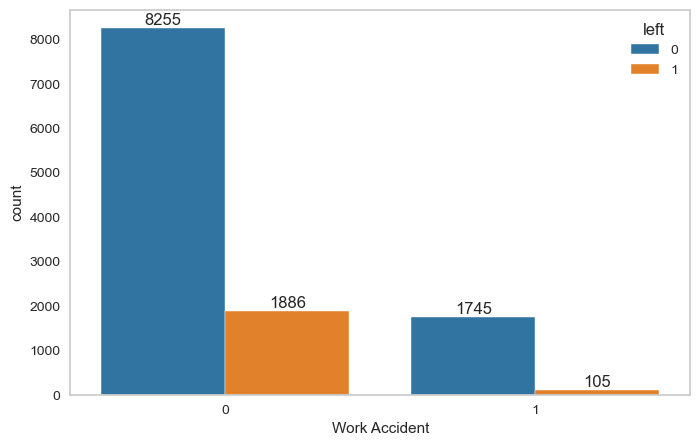

In [31]:
# The number of employee by the work accident and left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="work_accident", hue="left", data=df, palette = "tab10")
plt.xlabel("Work Accident")
for i in ax.containers:
    ax.bar_label(i)

### promotion_last_5years

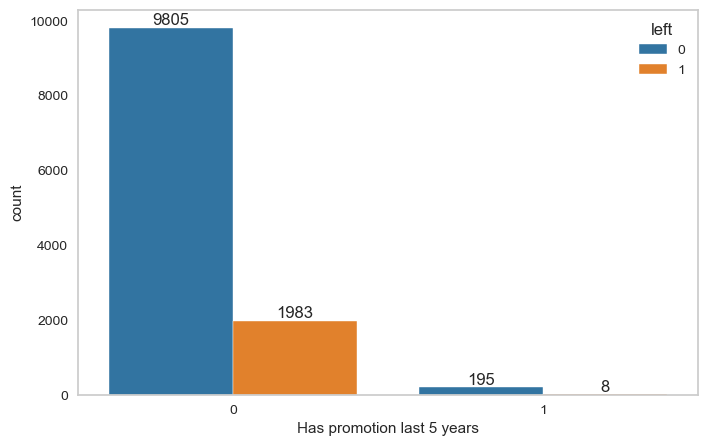

In [32]:
# The number of employee by the promotion and left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="promotion_last_5years", hue="left", data=df, palette = "tab10")
plt.xlabel("Has promotion last 5 years")
for i in ax.containers:
    ax.bar_label(i)

### Departments

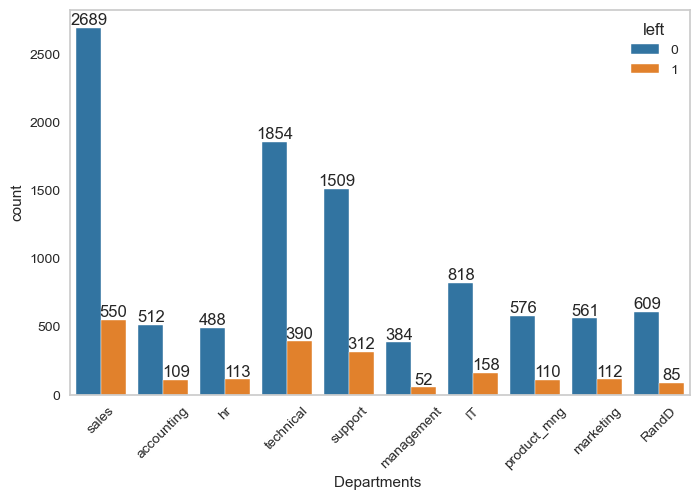

In [33]:
# The number of employee by the department and left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="departments", hue="left", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

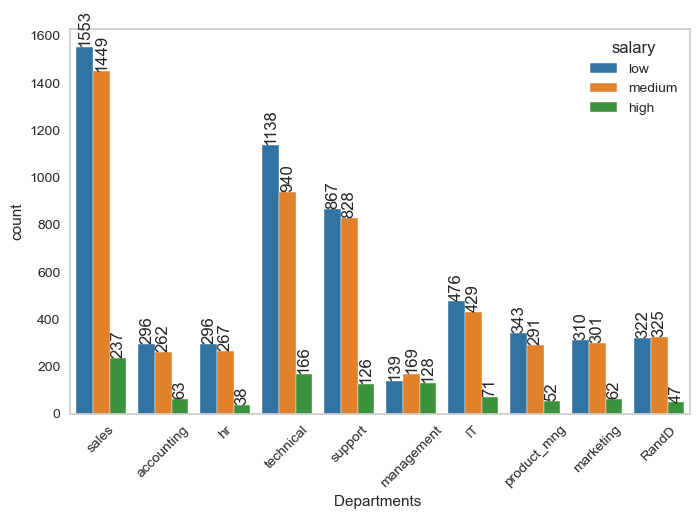

In [34]:
# The number of employee by the department and salary

plt.figure(figsize=(8,5))
ax = sns.countplot(x="departments", hue="salary", data=df, palette = "tab10")
plt.xlabel("Departments ")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i, rotation=90)

### Salary

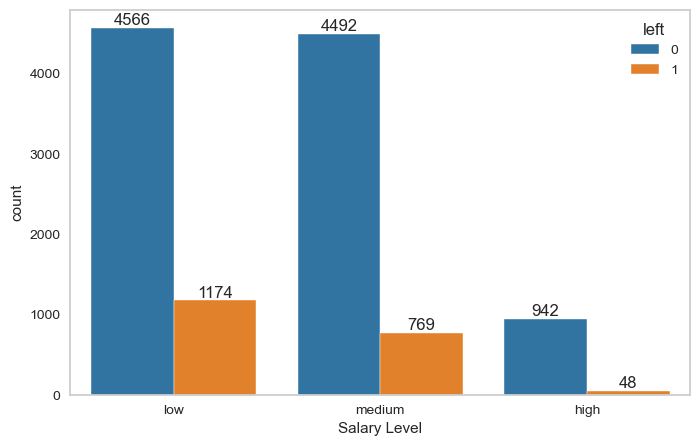

In [35]:
# The number of employee by the salary and left situation

plt.figure(figsize=(8,5))
ax = sns.countplot(x="salary", hue="left", data=df, palette = "tab10")
plt.xlabel("Salary Level")
for i in ax.containers:
    ax.bar_label(i)

### Subplots of Features


#### Distribution of numerical features

In [36]:
numeric = df.select_dtypes(exclude="O").columns
numeric

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'left'],
      dtype='object')

In [37]:
df[numeric].head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years  left  
0                   3              0                      0     1  
1                   6              0                      0     1  
2                   4              0                      0     1  
3                   5              0                      0     1  
4                   3              0                      0     1

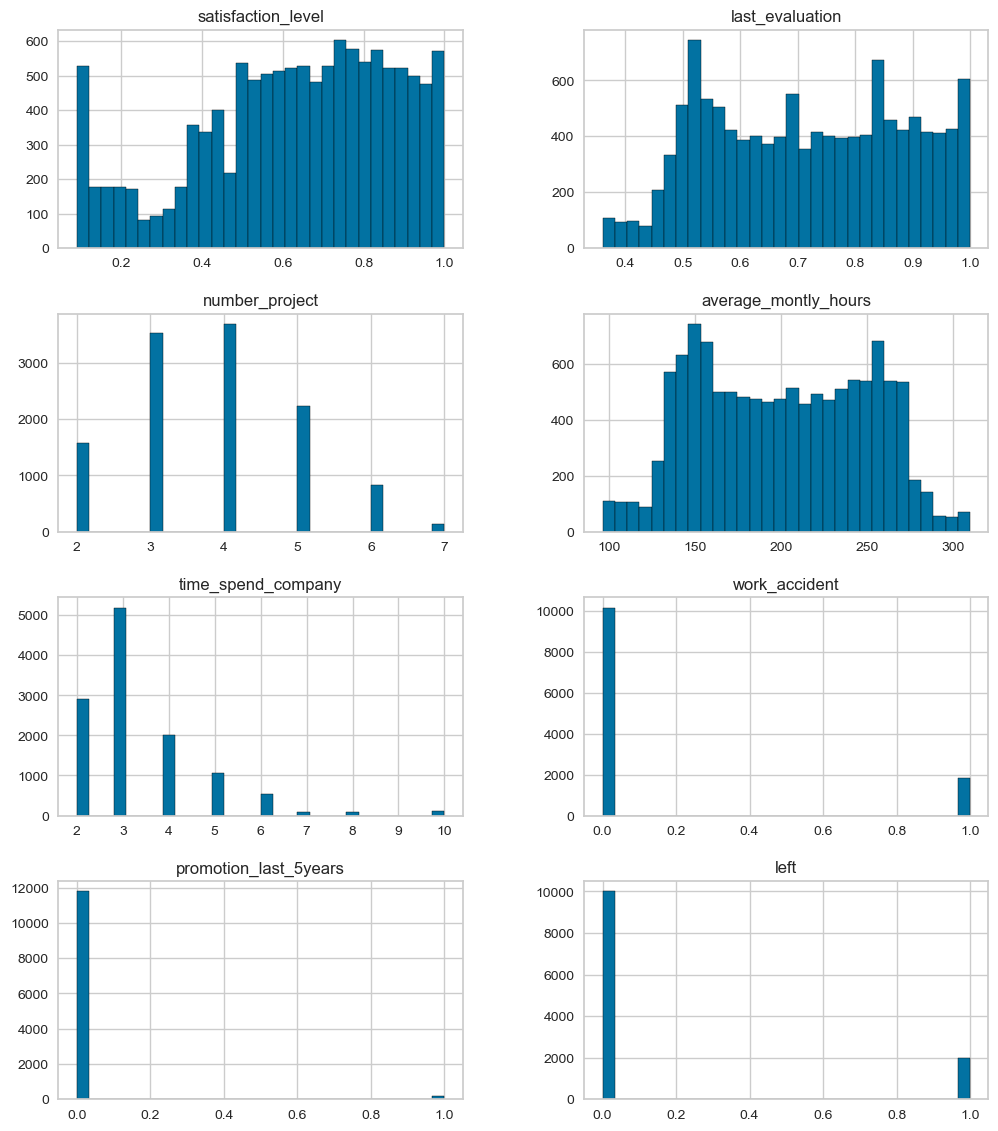

In [38]:
# Distribution of numerical features

fig_ = df[numeric].hist(figsize=(12, 36), layout=(10,2), bins=30, edgecolor="black");

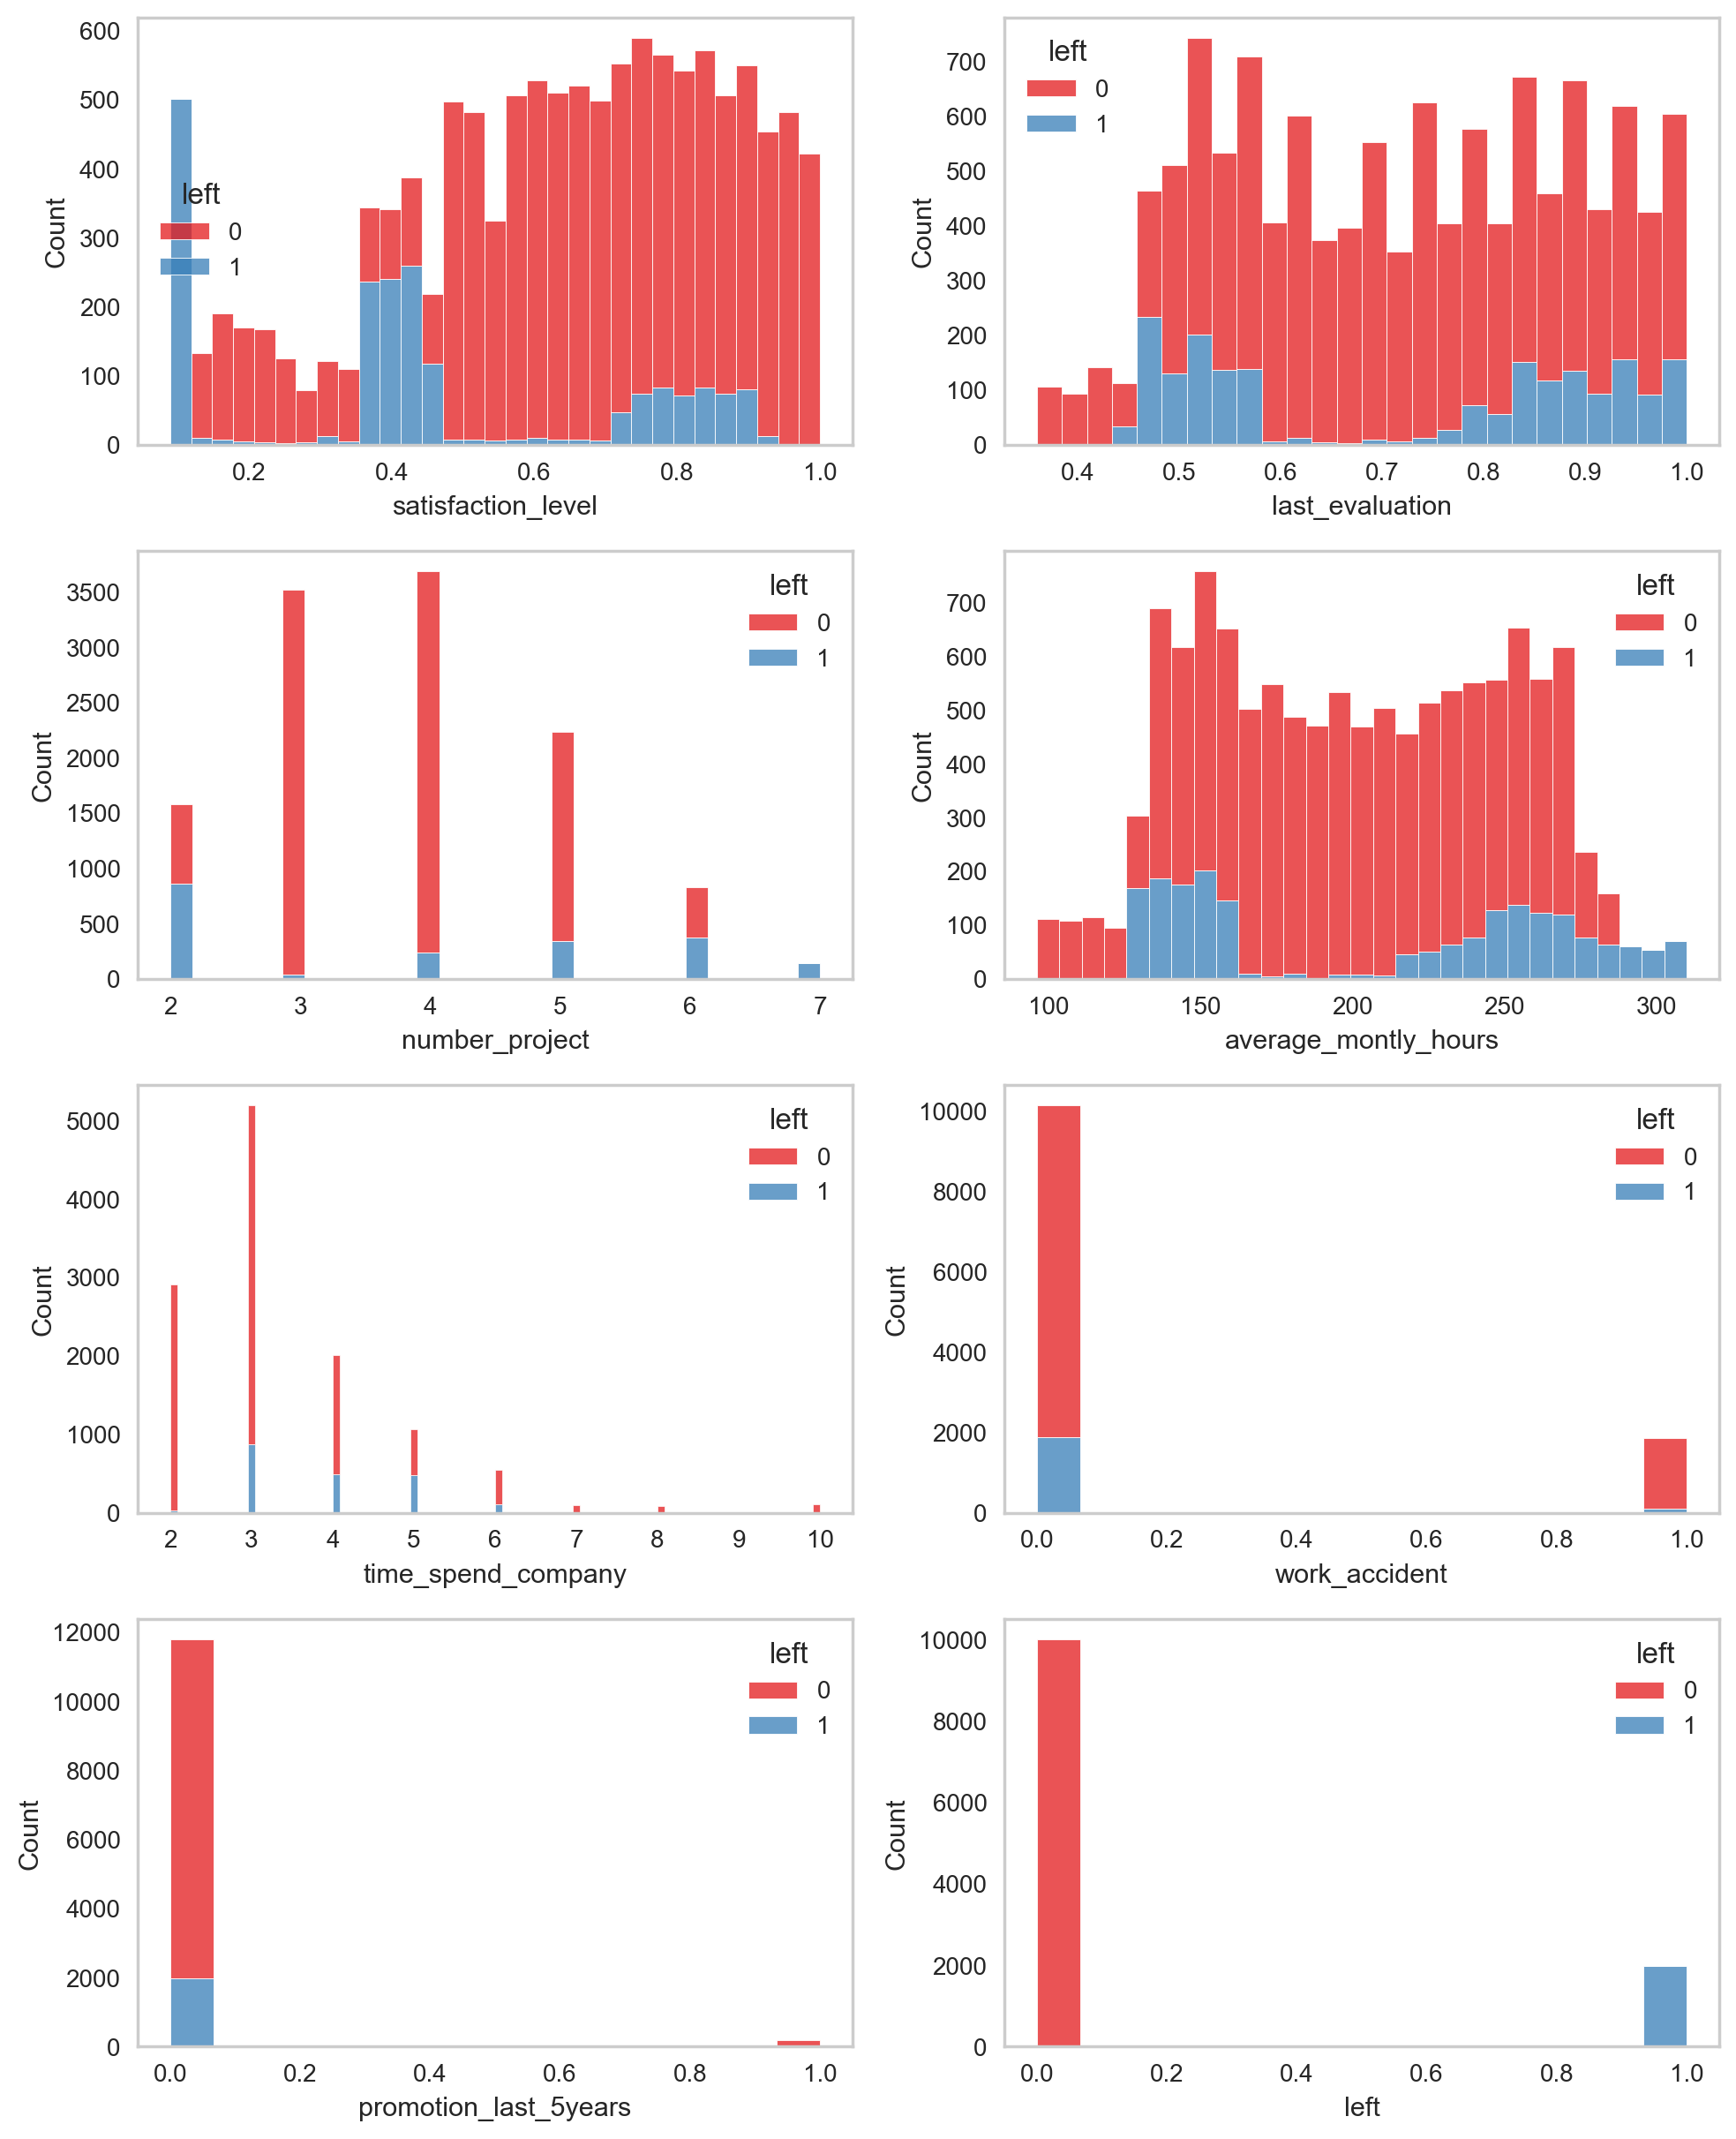

In [39]:
# Distribution of numerical features by target column("left")

fig = plt.figure(figsize=(10,30), dpi=200)
for i, col in enumerate(df[numeric]):
        plt.subplot(10,2,i+1)
        sns.histplot(x= col, hue="left", data=df, multiple="stack", palette="Set1"
                    )
plt.tight_layout();

#### Boxplots for numerical features based on the "left" feature

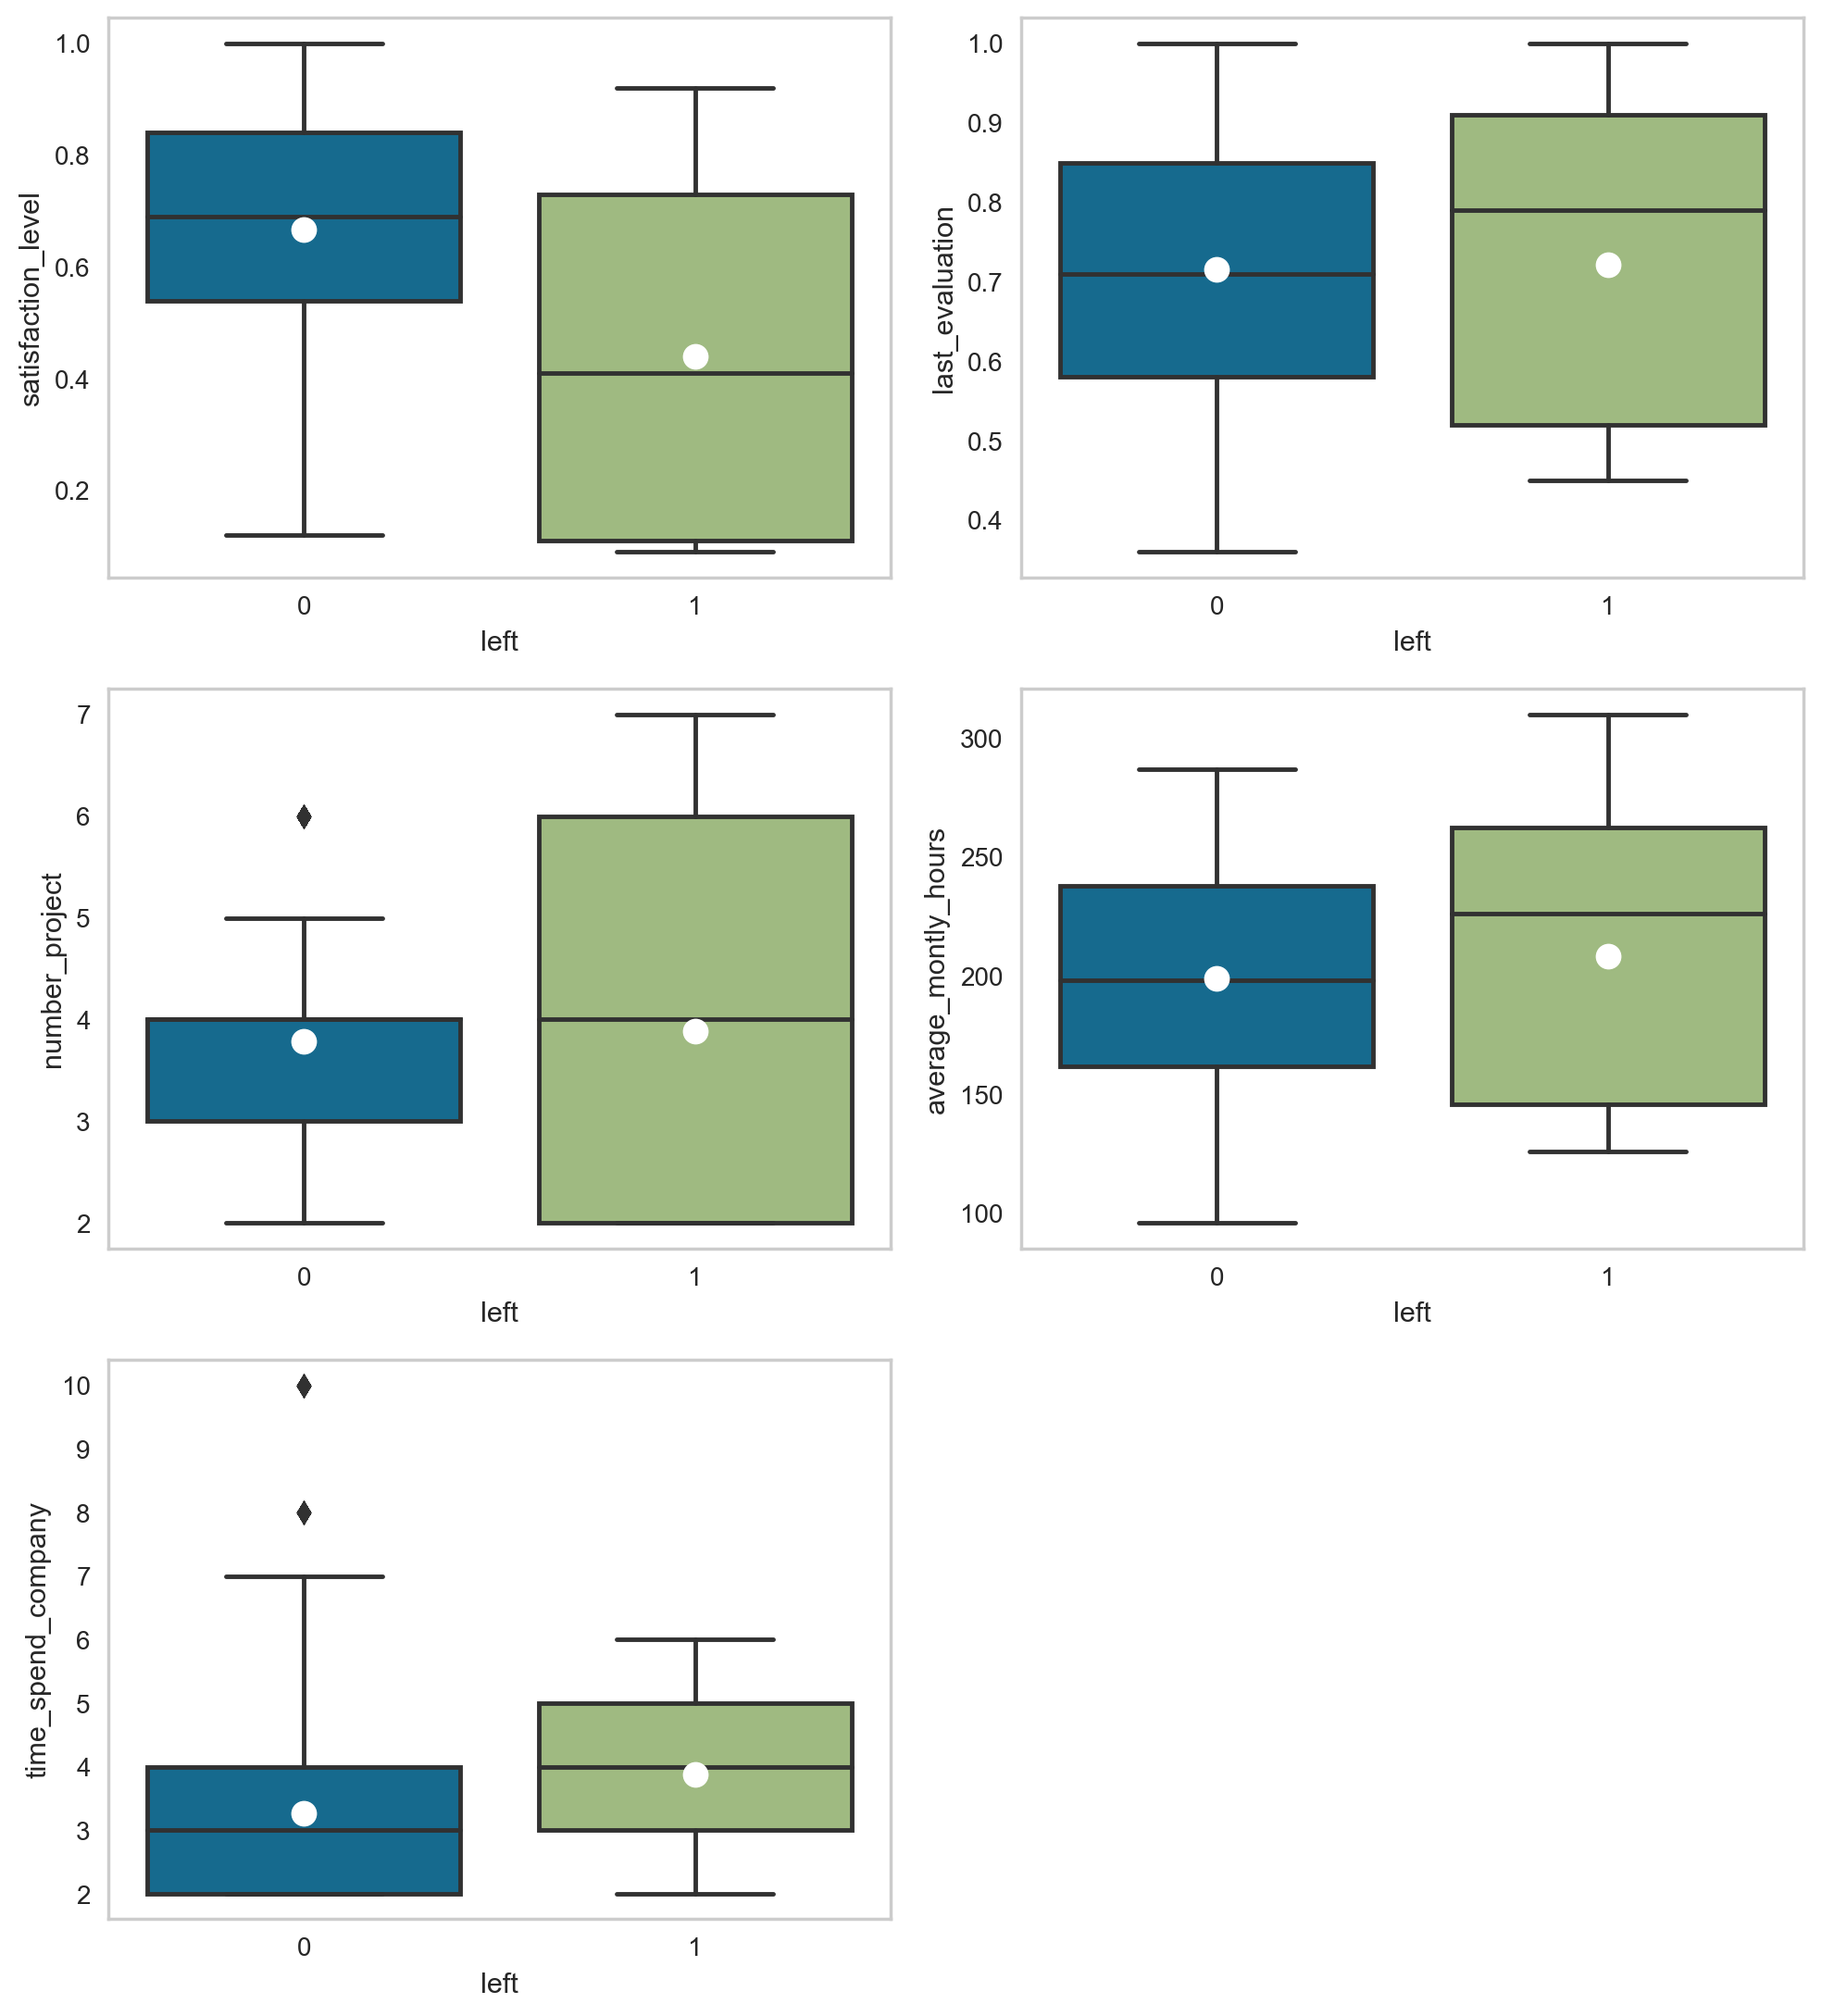

In [40]:
fig = plt.figure(figsize=(10,36), dpi=200)
for i, col in enumerate(df[numeric].iloc[:,:-3]):
        plt.subplot(10,2,i+1)
        sns.boxplot(x= "left", y=col, data=df,
                    showmeans=True,
                    meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.tight_layout();

#### Pairplot for numerical features

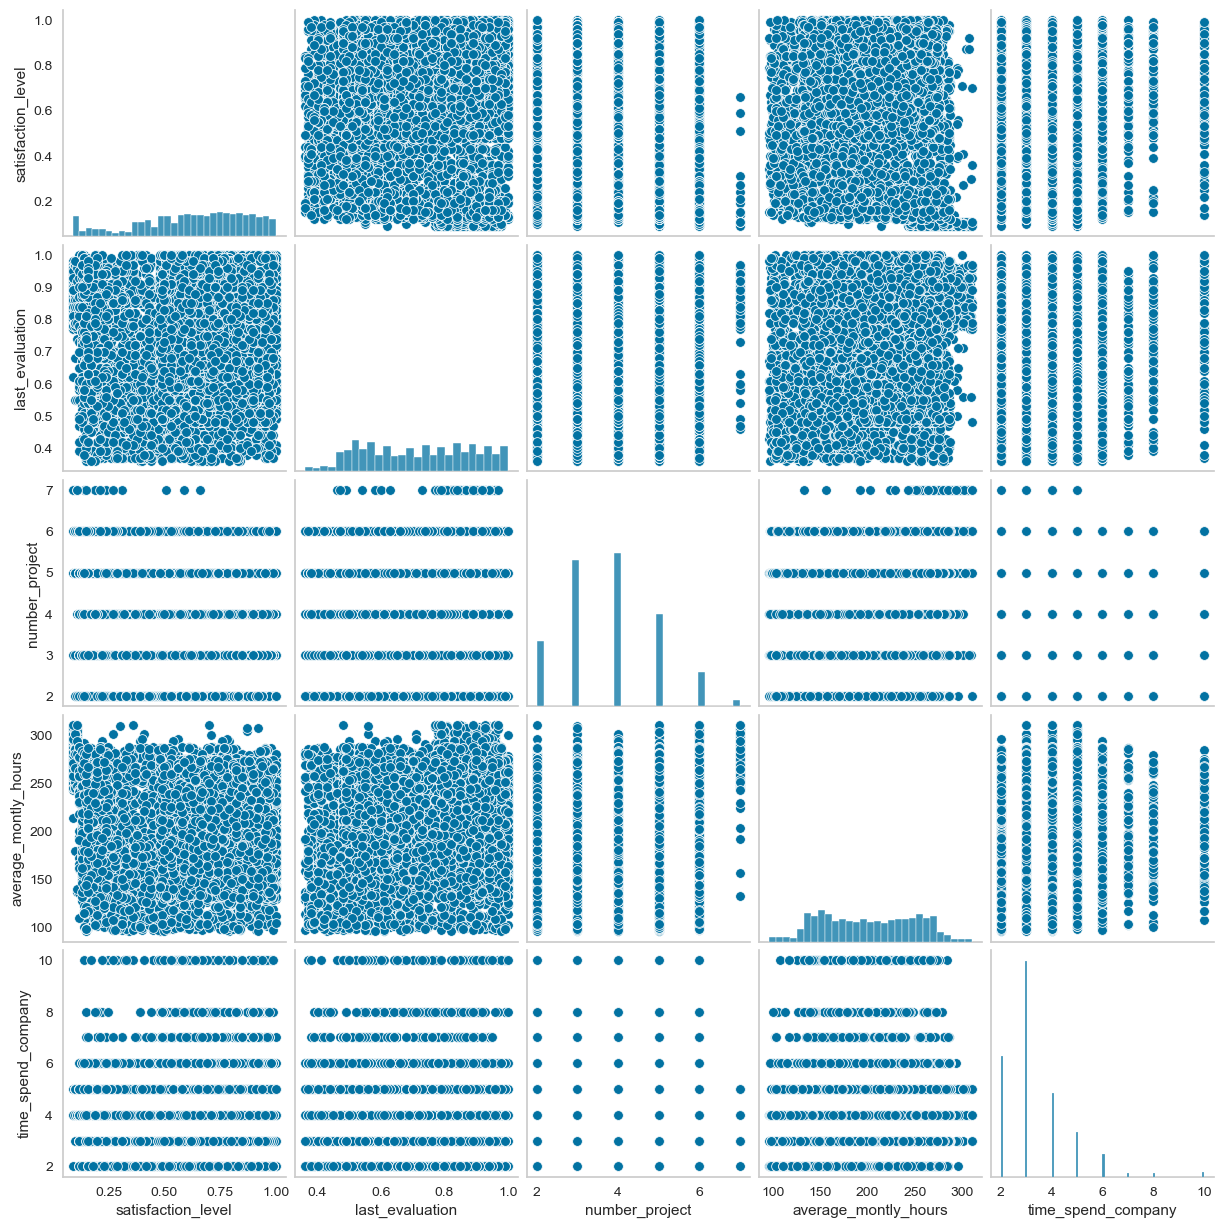

In [41]:
sns.pairplot(df[numeric].iloc[:,:-3]);

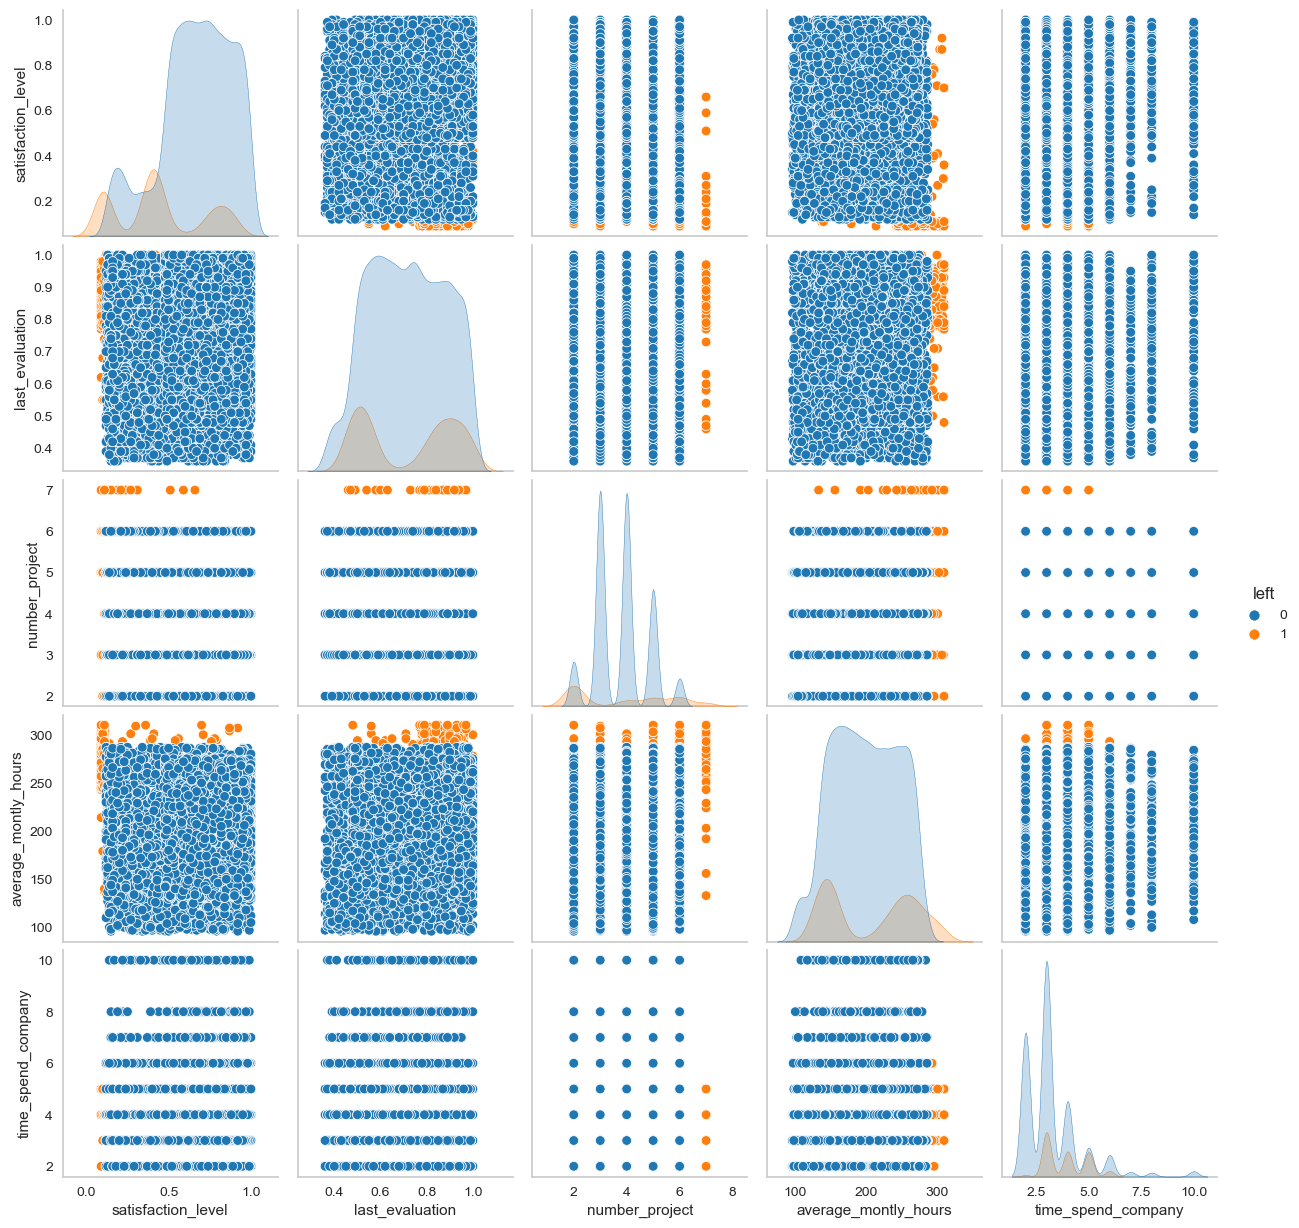

In [42]:
# Pairplot for the numerical features by target column("left")

sns.pairplot(df[numeric].iloc[:, [0,1,2,3,4,7]], hue="left", palette="tab10" );

In [43]:
# Correlation between numerical features

df.corr().style.background_gradient(cmap='YlGnBu')

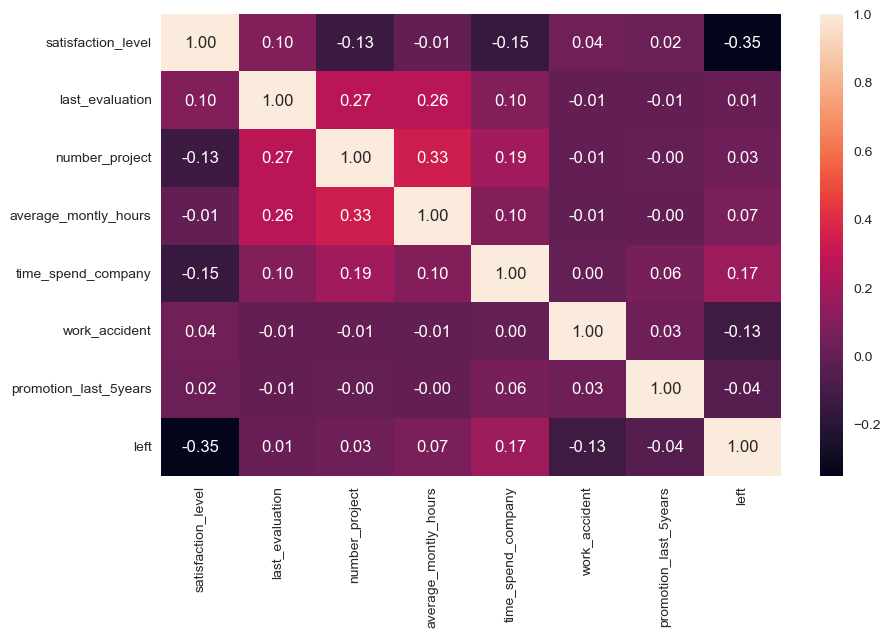

In [44]:
# Heatmap of correlation between numerical features

sns.heatmap(df.corr(), annot=True, fmt=".2f");

## 3. Data Pre-Processing

As we have duplicated values in our data. We decided to investigate clustering and supervised algorithms using the  with and without duplicates. So we will define dependent and indepentend variables with duplicates and without duplicates.

### Defining X and y

In [45]:
# data with duplicates

df_with_dp = df_copy.copy()
df_with_dp = clean_columns(df_with_dp)
df_with_dp.head()

df_with_dp.to_csv("df_with_dp.csv", index=False)
df_with_dp.shape

2 column names have been cleaned

(14999, 10)

In [46]:
# data without duplicates

df_without_dp = df.copy()
df_without_dp.to_csv("df_without_dp.csv", index=False)

df_without_dp.shape

(11991, 10)

In [47]:
# data with duplicates

X_dp = df_with_dp.drop(columns="left")
y_dp = df_with_dp.left

In [48]:
# data without duplicates

X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [49]:
print(X_dp.shape, y_dp.shape)
print(X.shape, y.shape)

(14999, 9) (14999,)
(11991, 9) (11991,)


#### Encoding and Scaling

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

**KModes steps: https://enjoymachinelearning.com/blog/k-mode-clustering-python/**

**KPrototypes: https://medium.com/@keswani-rohitkumar/k-prototypes-clustering-algorithm-f5d8e09a0104#:~:text=The%20Algorithm,is%20used%20for%20categorical%20data.**



### KPrototype Clustering Analysis

*As it is mentioned the paper below; if you have mixed data composed of numerical and categorical features, K-Prototype method should be used instead of KMeans clustering.*

https://towardsdatascience.com/clustering-algorithm-for-data-with-mixed-categorical-and-numerical-features-d4e3a48066a0

In [50]:
from kmodes.kprototypes import KPrototypes

#### Data Preprocessing for KPrototype Clustering Analysis

**As k-prototypes only accepts floating-point values for numerical data and integer values for categorical data, any other data type must be properly converted beforehand.**

In [51]:
X.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      0       sales   
2                   4              0                      0       sales   
3                   5              0                      0       sales   
4                   3              0                      0       sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [52]:
# We will implement ordinal encoding to the categorical features and scaling to the numericalfetures before KPrototypes Clustering
from sklearn.compose import make_column_transformer

# one_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [53]:
X_cat_encoded = pd.DataFrame(data=ord_enc.fit_transform(X[["departments", "salary"]]), columns=["departments", "salary"]).astype("int")
X_cat_encoded

departments  salary
0                7       1
1                7       2
2                7       2
3                7       1
4                7       1
...            ...     ...
11986            4       0
11987            4       0
11988            4       0
11989            5       0
11990            0       1

[11991 rows x 2 columns]

In [54]:
X_kproto = pd.concat([X.iloc[:, 0:7].astype("float"), X_cat_encoded], axis=1)
X_kproto

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53            2.00   
1                    0.80             0.86            5.00   
2                    0.11             0.88            7.00   
3                    0.72             0.87            5.00   
4                    0.37             0.52            2.00   
...                   ...              ...             ...   
11986                0.90             0.55            3.00   
11987                0.74             0.95            5.00   
11988                0.85             0.54            3.00   
11989                0.33             0.65            3.00   
11990                0.50             0.73            4.00   

       average_montly_hours  time_spend_company  work_accident  \
0                    157.00                3.00           0.00   
1                    262.00                6.00           0.00   
2                    272.00                4.00           0.00   
3                    223.00                5.00           0.00   
4                    159.00                3.00           0.00   
...                     ...                 ...            ...   
11986                259.00               10.00           1.00   
11987                266.00               10.00           0.00   
11988                185.00               10.00           0.00   
11989                172.00               10.00           0.00   
11990                180.00                3.00           0.00   

       promotion_last_5years  departments  salary  
0                       0.00            7       1  
1                       0.00            7       2  
2                       0.00            7       2  
3                       0.00            7       1  
4                       0.00            7       1  
...                      ...          ...     ...  
11986                   1.00            4       0  
11987                   1.00            4       0  
11988                   1.00            4       0  
11989                   1.00            5       0  
11990                   0.00            0       1  

[11991 rows x 9 columns]

In [55]:
# Effects of different scaler on hopkins score only for numerical features for the data without duplicates

from pyclustertend import hopkins

counter = 1
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
scal_str = ["MinMaxScaling","StandardScaling", "RobustScaling" ]
for i in scalers:
    X_scaled = i.fit_transform(X_kproto)
    print(f"{scal_str[counter-1]}: {hopkins(X_scaled, X_scaled.shape[0])}")
    counter += 1

MinMaxScaling: 0.1857135859070195
StandardScaling: 0.16001047776215346
RobustScaling: 0.23742441266638095


In [56]:
# As we get the better result with StandartScaler, we will continue with it

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_kproto)

In [57]:
# converting scaled data to dataframe and concate it with categorical features in order to use it in KPrototype

# X_proto = pd.DataFrame(data=X_scaled, columns=X.select_dtypes(exclude="O").columns)
# X_proto = pd.concat([X_proto, X.select_dtypes(include="O")], axis=1)
# X_proto

In [59]:
# get indices of categorical columns
catcol_idx = [X_kproto.columns.get_loc(col) for col in list(X.select_dtypes("object").columns)]
catcol_idx

[7, 8]

In [158]:
kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=20, n_jobs=-1, random_state=101)
kproto.fit(X_scaled, categorical=catcol_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3


KPrototypes(gamma=0.5, max_iter=20, n_clusters=2, n_jobs=-1, random_state=101,
            verbose=2)

#### The Elbow Method for KPrototypes

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

*k-Prototypes does not provide us with inertia scores, unlike k-Means clustering. Therefore, we will use the cost variable to assess the goodness of fit as mentioned below paper:*

https://towardsdatascience.com/one-hot-elbows-and-k-prototypes-more-customer-segmentation-in-python-106d13c55eae

In [159]:
# ssd = []  # sum of squared distance

# K = range(2,10)

# for k in K:
#     model = KPrototypes(n_clusters=5, max_iter=20, random_state=101)
#     model.fit(X_proto.values, categorical=catcol_idx)
#     ssd.append(model.euclidean_distance())
    
dict_cost_c3 = {}
for k in range(2,10):
    model = KPrototypes(n_clusters=k, n_jobs=-1, verbose=2, random_state=101)
    res = model.fit_predict(X_scaled, categorical=catcol_idx)
    dict_cost_c3[k] = model.cost_

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 6
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 2
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 7
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 7
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 9
Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1


In [160]:
print("cost (sum distance) for all k:")
_ = [print(k,":",f'{v:.3f}') for k,v in dict_cost_c3.items()]

cost (sum distance) for all k:
2 : 78668.771
3 : 68073.546
4 : 56454.931
5 : 49005.332
6 : 44586.616
7 : 40920.602
8 : 38705.599
9 : 36833.228


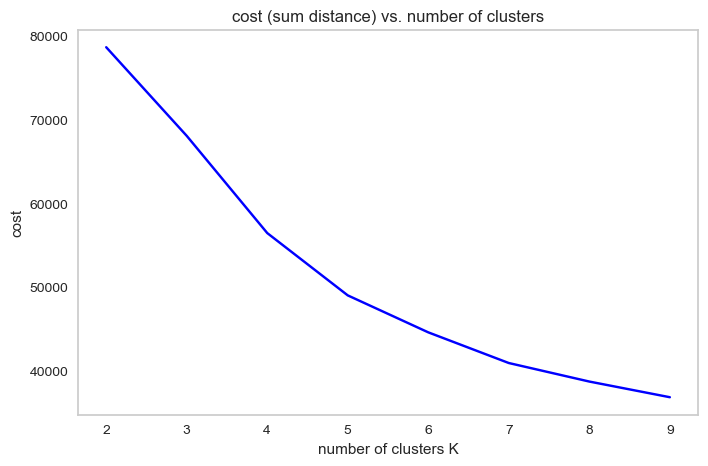

In [161]:
# scree plot: look for elbow
plt.figure(figsize=[8,5])
plt.plot(dict_cost_c3.keys(), dict_cost_c3.values(), color="blue")
plt.title("cost (sum distance) vs. number of clusters")
plt.xticks(np.arange(2,10,1))
plt.xlabel("number of clusters K")
plt.ylabel("cost");
plt.show();

In [97]:
# !pip install kneed

In [162]:
from kneed import KneeLocator

elbow at k = 5 clusters


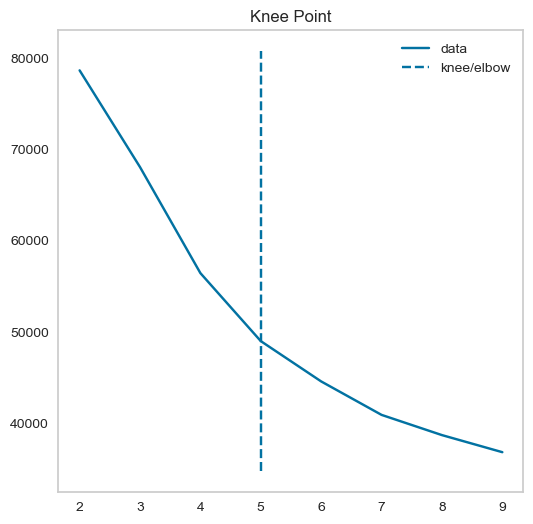

In [163]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
cost_knee_c3 = KneeLocator(
        x=list(dict_cost_c3.keys()), 
        y=list(dict_cost_c3.values()), 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow  # get knee point from KneeLocator object   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')  # print the knee point

# plot knee point using KneeLocator object plot_knee method
cost_knee_c3.plot_knee()

**Silhouette Coefficient for KModes and KPrototypes: https://codinginfinite.com/silhouette-coefficient-for-k-modes-and-k-prototypes-clustering/**

In [60]:
from kmodes import kprototypes

In [61]:
# defining a function named mixed_distance() to calculate the distance between the data points

def mixed_distance(a,b, categorical=None, alpha=0.01):
    if categorical is None:
        num_score=kprototypes.euclidean_dissim(a,b)
        return num_score
    else:
        cat_index=categorical
        a_cat=[]
        b_cat=[]
        for index in cat_index:
            a_cat.append(a[index])
            b_cat.append(b[index])
        a_num=[]
        b_num=[]
        l=len(a)
        for index in range(l):
            if index not in cat_index:
                a_num.append(a[index])
                b_num.append(b[index])
                
        a_cat=np.array(a_cat).reshape(1,-1)
        a_num=np.array(a_num).reshape(1,-1)
        b_cat=np.array(b_cat).reshape(1,-1)
        b_num=np.array(b_num).reshape(1,-1)
        cat_score=kprototypes.matching_dissim(a_cat,b_cat)
        num_score=kprototypes.euclidean_dissim(a_num,b_num)
        return cat_score+num_score*alpha  # alpha parameter is used to The alpha parameter is used to scale the distance between numerical attributes.

In [62]:
# defining a function to calculate the distance matrix for k-prototypes clustering

def dm_prototypes(dataset,categorical=None,alpha=0.1):
    #if the input dataset is a dataframe, we take out the values as a numpy. 
    #if the input dataset is a numpy array, we use it as is.
    if type(dataset).__name__=='DataFrame':
        dataset=dataset.values    
    lenDataset=len(dataset)
    distance_matrix=np.zeros(lenDataset*lenDataset).reshape(lenDataset,lenDataset)
    for i in range(lenDataset):
        for j in range(lenDataset):
            x1= dataset[i]
            x2= dataset[j]
            distance=mixed_distance(x1,  # mixed_distance function is used to calculate the distance
                                    x2,
                                    categorical=categorical,
                                    alpha=alpha)
            distance_matrix[i][j]=distance
            distance_matrix[j][i]=distance
    return distance_matrix

In [64]:
from sklearn.metrics import silhouette_score
# df=pd.read_csv("Kprototypes_dataset.csv", index_col=["Student"])

# Normalize dataset
# df["Height(in cms)"]=(df["Height(in cms)"]/df["Height(in cms)"].abs().max())*5
# df["Weight(in Kgs)"]=(df["Weight(in Kgs)"]/df["Weight(in Kgs)"].abs().max())*5

# obtain array of values
data_array=X_scaled

# specify data types
data_array[:, :7] = data_array[:, :7].astype(float)
data_array[:, 7:] = data_array[:, 7:].astype(int)

distance_matrix = dm_prototypes(data_array,categorical=catcol_idx, alpha=0.1)


In [65]:
distance_matrix

array([[ 0.        ,  3.32606807,  4.01902929, ..., 10.26536082,
         9.9164408 ,  1.48385787],
       [ 3.32606807,  0.        ,  1.34663697, ...,  8.82391751,
         9.08545922,  3.08028884],
       [ 4.01902929,  1.34663697,  0.        , ..., 11.8948707 ,
        10.9169345 ,  3.41934632],
       ...,
       [10.26536082,  8.82391751, 11.8948707 , ...,  0.        ,
         0.51514395, 11.1911009 ],
       [ 9.9164408 ,  9.08545922, 10.9169345 , ...,  0.51514395,
         0.        , 10.92685895],
       [ 1.48385787,  3.08028884,  3.41934632, ..., 11.1911009 ,
        10.92685895,  0.        ]])

In [66]:
silhouette_scores = dict()
K = range(2,10)

for k in K:
    model = KPrototypes(n_clusters=k, max_iter=20, random_state=101)
    trained_model = model.fit(data_array, categorical=catcol_idx)
    cluster_labels = trained_model.labels_
    score = silhouette_score(distance_matrix, cluster_labels, metric="precomputed")
    silhouette_scores[k]= score
print("The k and associated Silhouette scores are: ",silhouette_scores)

The k and associated Silhouette scores are:  {2: 0.21220022036403, 3: 0.22507992486012263, 4: 0.16668700371071393, 5: 0.186622772091066, 6: 0.20215933121748847, 7: 0.17429389313762284, 8: 0.16117229378378886, 9: 0.16044160097348067}


### KMeans Clustering

In [74]:
# We will implement ordinal encoding to the categorical features and then scale the data before KMeans Clustering

from sklearn.compose import make_column_transformer

# one_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, ["salary", "departments"]), remainder= "passthrough")

column_trans.fit_transform(X_dp)

column_names=column_trans.get_feature_names_out()

X_dp_enc = pd.DataFrame(column_trans.fit_transform(X_dp), columns=column_names)
X_dp_enc

ordinalencoder__salary  ordinalencoder__departments  \
0                        1.00                         7.00   
1                        2.00                         7.00   
2                        2.00                         7.00   
3                        1.00                         7.00   
4                        1.00                         7.00   
...                       ...                          ...   
14994                    1.00                         8.00   
14995                    1.00                         8.00   
14996                    1.00                         8.00   
14997                    1.00                         8.00   
14998                    1.00                         8.00   

       remainder__satisfaction_level  remainder__last_evaluation  \
0                               0.38                        0.53   
1                               0.80                        0.86   
2                               0.11                        0.88   
3                               0.72                        0.87   
4                               0.37                        0.52   
...                              ...                         ...   
14994                           0.40                        0.57   
14995                           0.37                        0.48   
14996                           0.37                        0.53   
14997                           0.11                        0.96   
14998                           0.37                        0.52   

       remainder__number_project  remainder__average_montly_hours  \
0                           2.00                           157.00   
1                           5.00                           262.00   
2                           7.00                           272.00   
3                           5.00                           223.00   
4                           2.00                           159.00   
...                          ...                              ...   
14994                       2.00                           151.00   
14995                       2.00                           160.00   
14996                       2.00                           143.00   
14997                       6.00                           280.00   
14998                       2.00                           158.00   

       remainder__time_spend_company  remainder__work_accident  \
0                               3.00                      0.00   
1                               6.00                      0.00   
2                               4.00                      0.00   
3                               5.00                      0.00   
4                               3.00                      0.00   
...                              ...                       ...   
14994                           3.00                      0.00   
14995                           3.00                      0.00   
14996                           3.00                      0.00   
14997                           4.00                      0.00   
14998                           3.00                      0.00   

       remainder__promotion_last_5years  
0                                  0.00  
1                                  0.00  
2                                  0.00  
3                                  0.00  
4                                  0.00  
...                                 ...  
14994                              0.00  
14995                              0.00  
14996                              0.00  
14997                              0.00  
14998                              0.00  

[14999 rows x 9 columns]

In [76]:
# As we get the better result with StandartScaler, we will continue with it

scalar = StandardScaler()
X_dp_scaled = scalar.fit_transform(X_dp_enc)

In [76]:
# As we get the better result with StandartScaler, we will continue with it

scalar = StandardScaler()
X_dp_scaled = scalar.fit_transform(X_dp_enc)

In [77]:
one_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, ["salary", "departments"]), remainder= "passthrough")

column_trans.fit_transform(X)

column_names=column_trans.get_feature_names_out()

X_enc = pd.DataFrame(column_trans.fit_transform(X), columns=column_names)
X_enc

ordinalencoder__salary  ordinalencoder__departments  \
0                        1.00                         7.00   
1                        2.00                         7.00   
2                        2.00                         7.00   
3                        1.00                         7.00   
4                        1.00                         7.00   
...                       ...                          ...   
11986                    0.00                         4.00   
11987                    0.00                         4.00   
11988                    0.00                         4.00   
11989                    0.00                         5.00   
11990                    1.00                         0.00   

       remainder__satisfaction_level  remainder__last_evaluation  \
0                               0.38                        0.53   
1                               0.80                        0.86   
2                               0.11                        0.88   
3                               0.72                        0.87   
4                               0.37                        0.52   
...                              ...                         ...   
11986                           0.90                        0.55   
11987                           0.74                        0.95   
11988                           0.85                        0.54   
11989                           0.33                        0.65   
11990                           0.50                        0.73   

       remainder__number_project  remainder__average_montly_hours  \
0                           2.00                           157.00   
1                           5.00                           262.00   
2                           7.00                           272.00   
3                           5.00                           223.00   
4                           2.00                           159.00   
...                          ...                              ...   
11986                       3.00                           259.00   
11987                       5.00                           266.00   
11988                       3.00                           185.00   
11989                       3.00                           172.00   
11990                       4.00                           180.00   

       remainder__time_spend_company  remainder__work_accident  \
0                               3.00                      0.00   
1                               6.00                      0.00   
2                               4.00                      0.00   
3                               5.00                      0.00   
4                               3.00                      0.00   
...                              ...                       ...   
11986                          10.00                      1.00   
11987                          10.00                      0.00   
11988                          10.00                      0.00   
11989                          10.00                      0.00   
11990                           3.00                      0.00   

       remainder__promotion_last_5years  
0                                  0.00  
1                                  0.00  
2                                  0.00  
3                                  0.00  
4                                  0.00  
...                                 ...  
11986                              1.00  
11987                              1.00  
11988                              1.00  
11989                              1.00  
11990                              0.00  

[11991 rows x 9 columns]

In [78]:
# Effects of different scaler on hopkins score

counter = 1
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
scal_str = ["MinMaxScaling","StandardScaling", "RobustScaling" ]
for i in scalers:
    X_scaled = i.fit_transform(X_enc)
    print(f"{scal_str[counter-1]}: {hopkins(X_scaled, X_scaled.shape[0])}")
    counter += 1

MinMaxScaling: 0.18605891971483554
StandardScaling: 0.15976472395603608
RobustScaling: 0.2377482310830376


In [79]:
# As we get better hopkins score with data contains duplicates we implement KMeans clustering with it

# X_scaled = scalar.fit_transform(X_enc)

In [80]:
X_dp_scaled_df = pd.DataFrame(X_dp_scaled, columns=X_dp_enc.columns)
X_dp_scaled_df["left"] = y_dp
X_dp_scaled_df

ordinalencoder__salary  ordinalencoder__departments  \
0                       -0.55                         0.39   
1                        1.04                         0.39   
2                        1.04                         0.39   
3                       -0.55                         0.39   
4                       -0.55                         0.39   
...                       ...                          ...   
14994                   -0.55                         0.74   
14995                   -0.55                         0.74   
14996                   -0.55                         0.74   
14997                   -0.55                         0.74   
14998                   -0.55                         0.74   

       remainder__satisfaction_level  remainder__last_evaluation  \
0                              -0.94                       -1.09   
1                               0.75                        0.84   
2                              -2.02                        0.96   
3                               0.43                        0.90   
4                              -0.98                       -1.15   
...                              ...                         ...   
14994                          -0.86                       -0.85   
14995                          -0.98                       -1.38   
14996                          -0.98                       -1.09   
14997                          -2.02                        1.42   
14998                          -0.98                       -1.15   

       remainder__number_project  remainder__average_montly_hours  \
0                          -1.46                            -0.88   
1                           0.97                             1.22   
2                           2.59                             1.42   
3                           0.97                             0.44   
4                          -1.46                            -0.84   
...                          ...                              ...   
14994                      -1.46                            -1.00   
14995                      -1.46                            -0.82   
14996                      -1.46                            -1.16   
14997                       1.78                             1.58   
14998                      -1.46                            -0.86   

       remainder__time_spend_company  remainder__work_accident  \
0                              -0.34                     -0.41   
1                               1.71                     -0.41   
2                               0.34                     -0.41   
3                               1.03                     -0.41   
4                              -0.34                     -0.41   
...                              ...                       ...   
14994                          -0.34                     -0.41   
14995                          -0.34                     -0.41   
14996                          -0.34                     -0.41   
14997                           0.34                     -0.41   
14998                          -0.34                     -0.41   

       remainder__promotion_last_5years  left  
0                                 -0.15     1  
1                                 -0.15     1  
2                                 -0.15     1  
3                                 -0.15     1  
4                                 -0.15     1  
...                                 ...   ...  
14994                             -0.15     1  
14995                             -0.15     1  
14996                             -0.15     1  
14997                             -0.15     1  
14998                             -0.15     1  

[14999 rows x 10 columns]

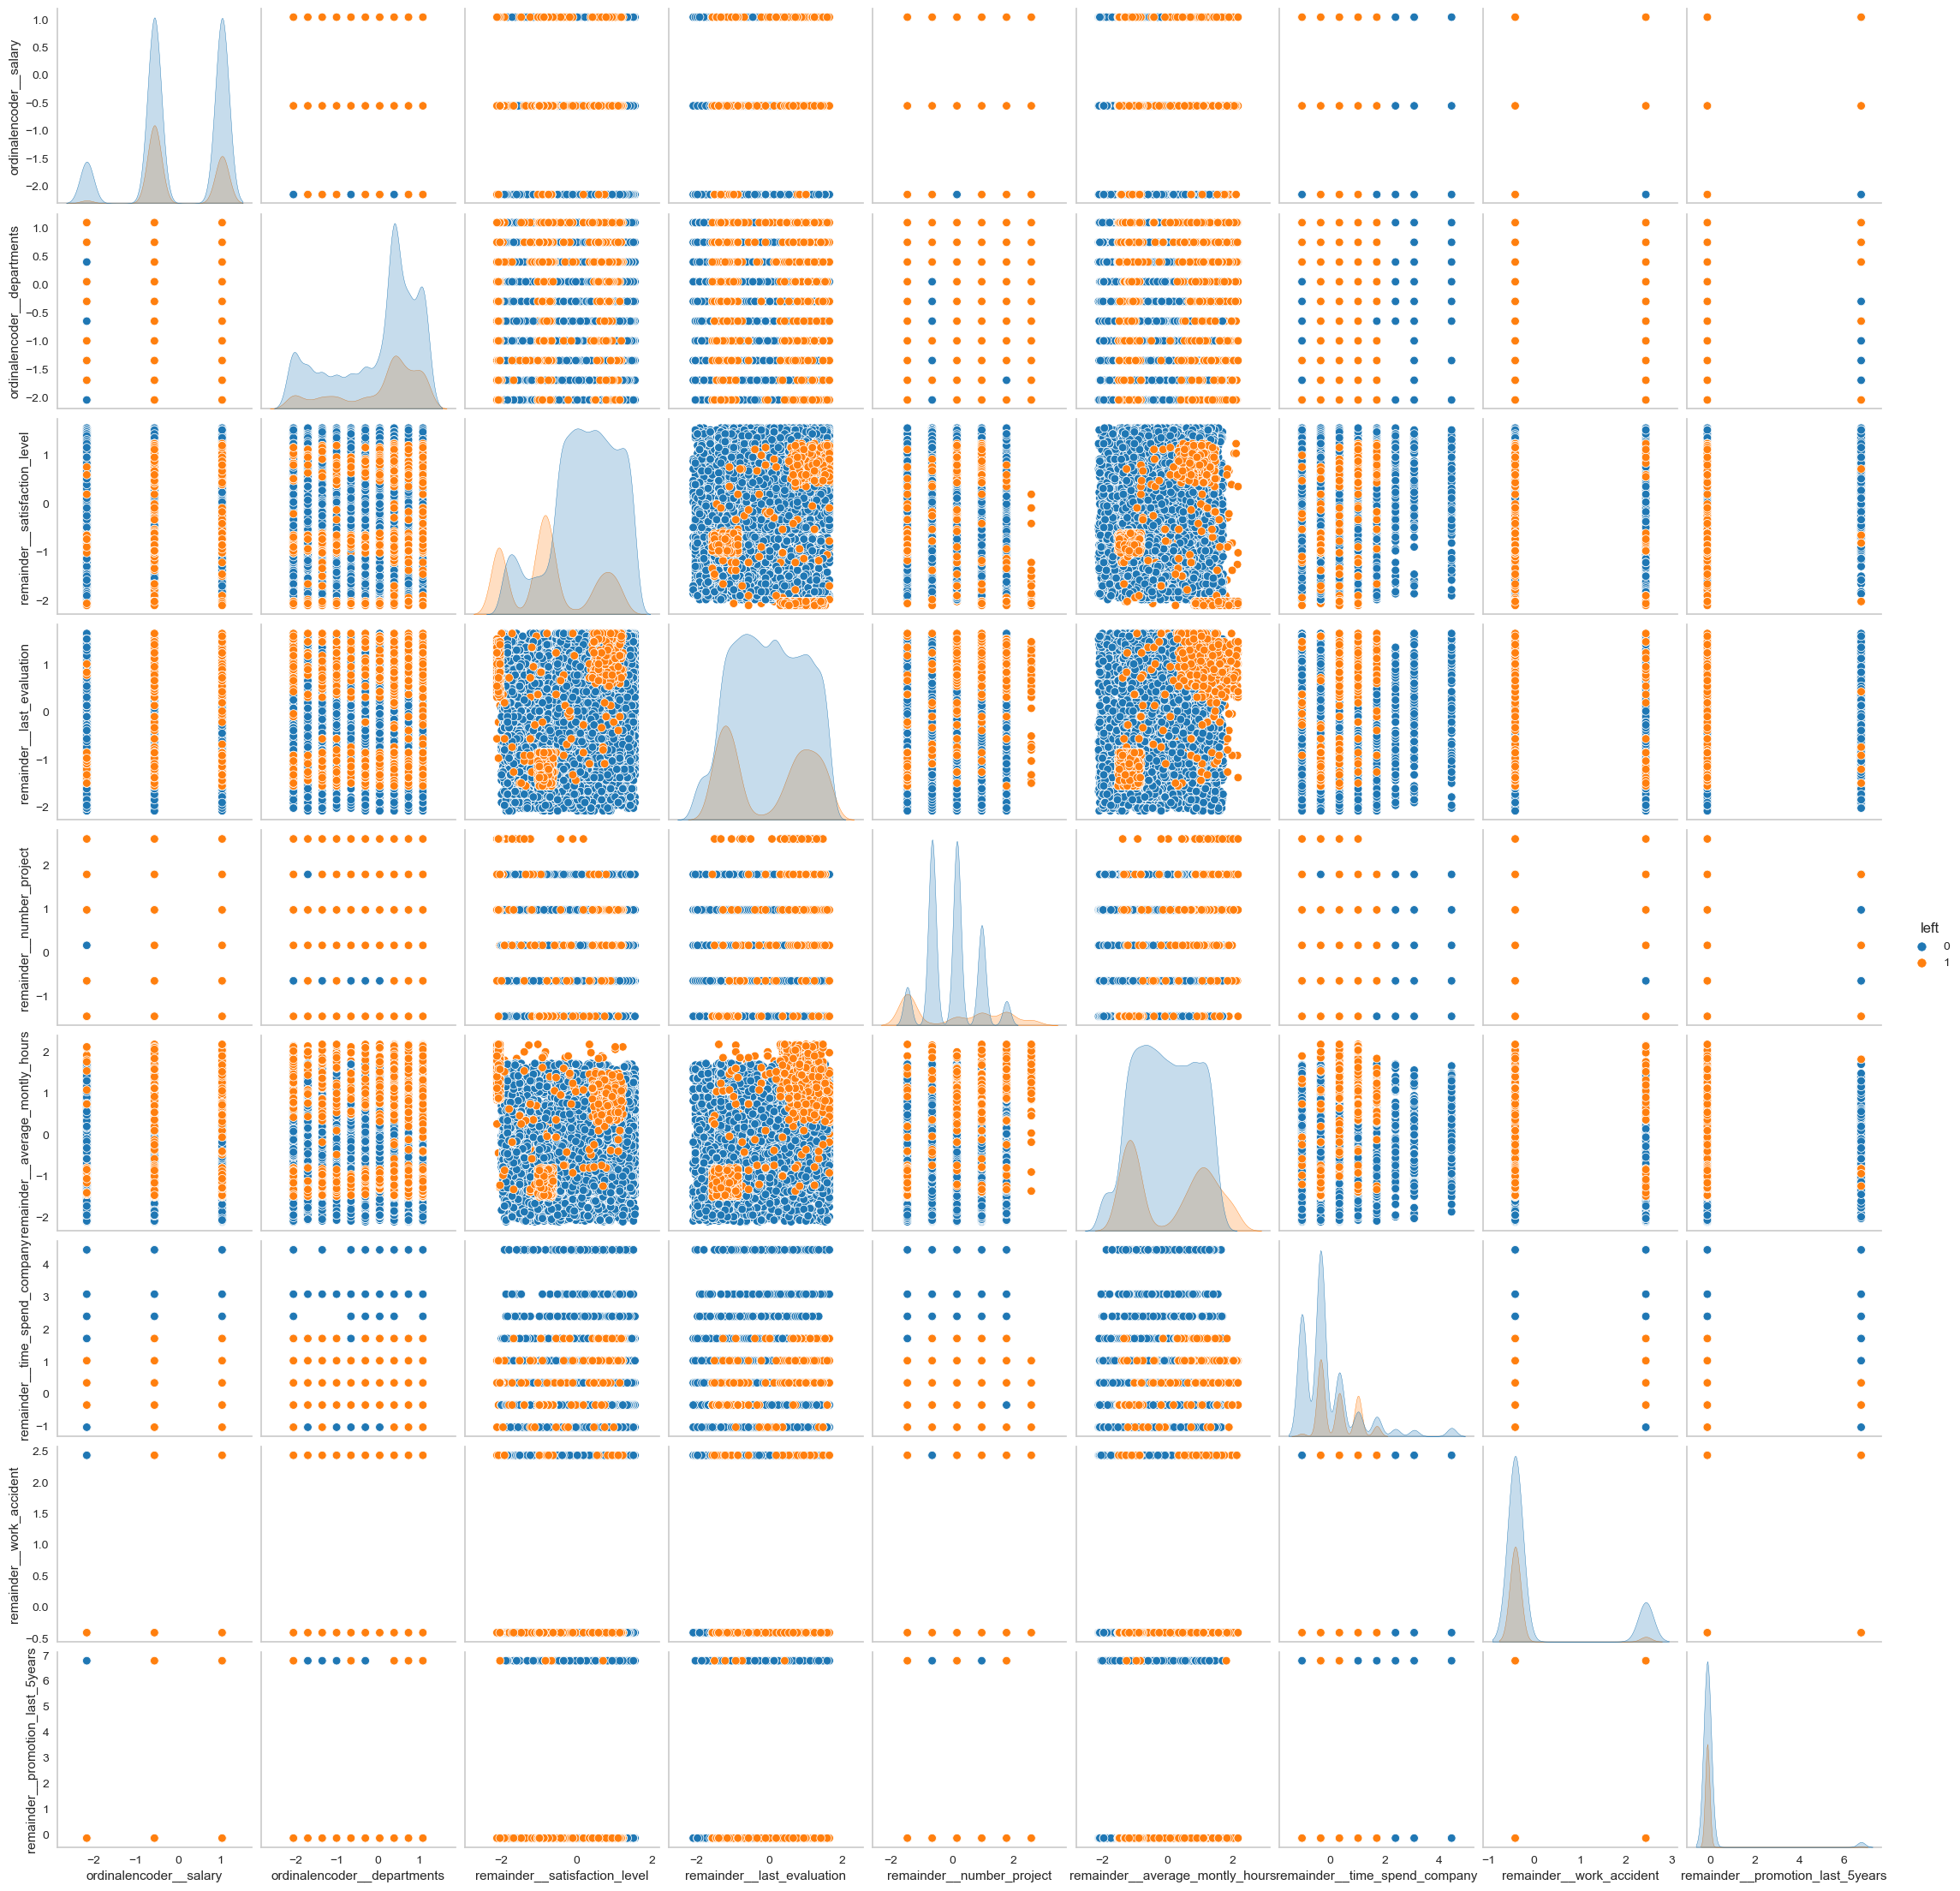

In [81]:
sns.pairplot(X_dp_scaled_df, hue="left", palette="tab10")
plt.show();

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [82]:
hopkins(X_dp_scaled, X_dp_scaled.shape[0])

0.11207648493740413

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [83]:
ssd = []  # sum of squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters = k, random_state=101)
    model.fit(X_dp_scaled)
    ssd.append(model.inertia_)

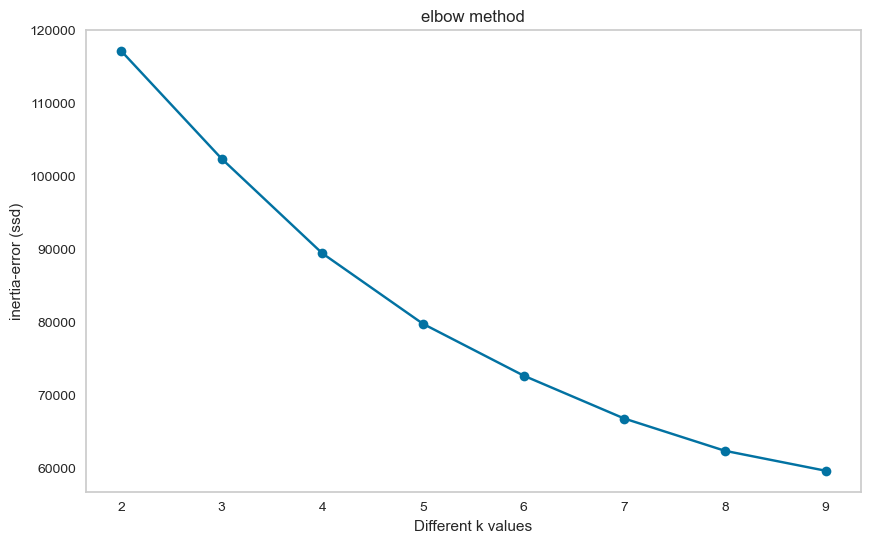

In [84]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")
plt.show();

In [85]:
ssd

[117154.30447241469,
 102351.28960320224,
 89385.69641926493,
 79726.0393780248,
 72626.12463726618,
 66744.6260198887,
 62321.71426815568,
 59590.4673862052]

In [86]:
pd.Series(ssd).diff()

0         NaN
1   -14803.01
2   -12965.59
3    -9659.66
4    -7099.91
5    -5881.50
6    -4422.91
7    -2731.25
dtype: float64

In [87]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1      NaN
2 14803.01
3 12965.59
4  9659.66
5  7099.91
6  5881.50
7  4422.91
8  2731.25

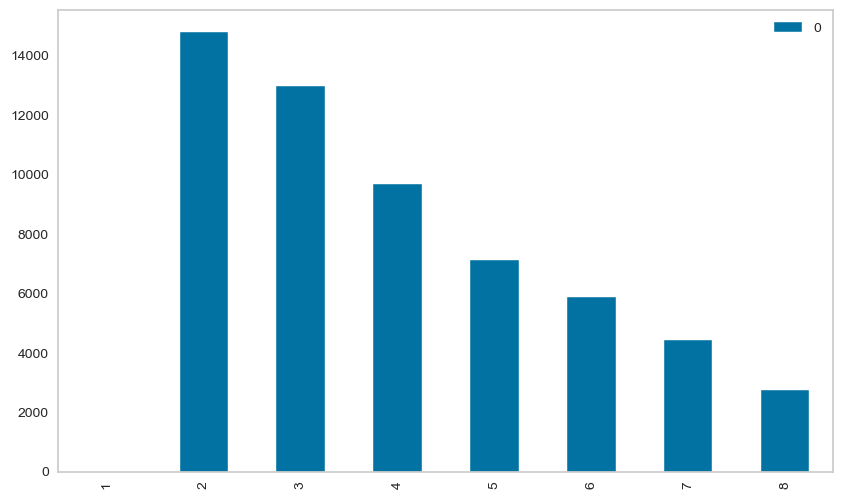

In [88]:
df_diff.plot(kind='bar')
plt.show()

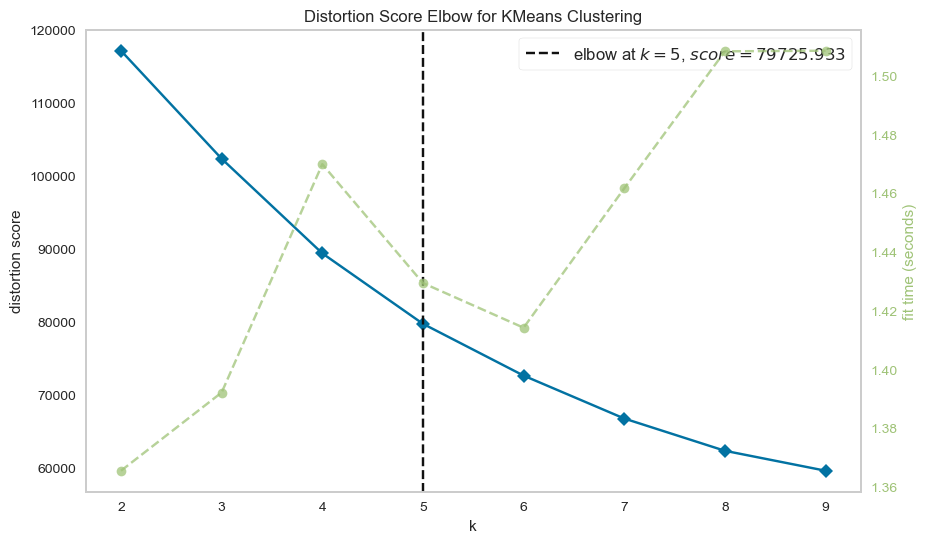

In [89]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X_dp_scaled)        # Fit the data to the visualizer
visualizer.show();

In [90]:
from sklearn.metrics import silhouette_score

In [91]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_dp_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_dp_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.15874717609542882
For n_clusters=3, the silhouette score is 0.1761562410185968
For n_clusters=4, the silhouette score is 0.18792923150101112
For n_clusters=5, the silhouette score is 0.19263778772251525
For n_clusters=6, the silhouette score is 0.19779505128826702
For n_clusters=7, the silhouette score is 0.20428951733074827
For n_clusters=8, the silhouette score is 0.19735886320698362


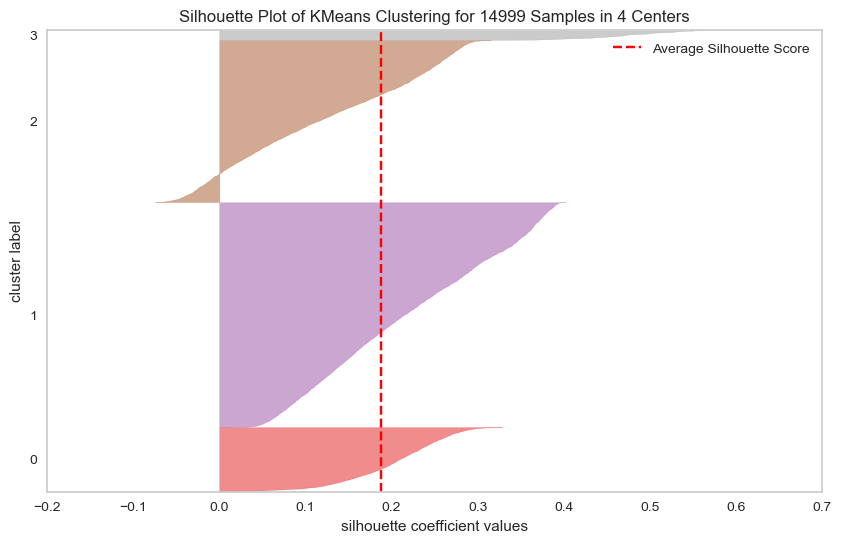

In [126]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_dp_scaled)    # Fit the data to the visualizer
visualizer.show();

In [128]:
# Model fitting
model = KMeans(n_clusters = 4, random_state=101)
y_pred = model.fit_predict(X_dp_scaled)
y_pred

array([0, 2, 2, ..., 0, 2, 0])

In [129]:
predicted_label=model.labels_
predicted_label

array([0, 2, 2, ..., 0, 2, 0])

In [130]:
X_dp_scaled_df["pred_cluster"] = predicted_label
X_dp_scaled_df.head()

ordinalencoder__salary  ordinalencoder__departments  \
0                   -0.55                         0.39   
1                    1.04                         0.39   
2                    1.04                         0.39   
3                   -0.55                         0.39   
4                   -0.55                         0.39   

   remainder__satisfaction_level  remainder__last_evaluation  \
0                          -0.94                       -1.09   
1                           0.75                        0.84   
2                          -2.02                        0.96   
3                           0.43                        0.90   
4                          -0.98                       -1.15   

   remainder__number_project  remainder__average_montly_hours  \
0                      -1.46                            -0.88   
1                       0.97                             1.22   
2                       2.59                             1.42   
3                       0.97                             0.44   
4                      -1.46                            -0.84   

   remainder__time_spend_company  remainder__work_accident  \
0                          -0.34                     -0.41   
1                           1.71                     -0.41   
2                           0.34                     -0.41   
3                           1.03                     -0.41   
4                          -0.34                     -0.41   

   remainder__promotion_last_5years  left  pred_cluster  
0                             -0.15     1             0  
1                             -0.15     1             2  
2                             -0.15     1             2  
3                             -0.15     1             2  
4                             -0.15     1             0

In [131]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(X_dp_scaled_df.left, y_pred)

0.01699100589957157

In [132]:
ct = pd.crosstab(y_pred, X_dp_scaled_df.left)
ct

left      0     1
row_0            
0      6231  1569
1       300    19
2      2970  1818
3      1927   165

In [133]:
clus_pred =X_dp_scaled_df.groupby("left").mean().T
clus_pred

left                                 0     1
ordinalencoder__salary            0.00 -0.00
ordinalencoder__departments      -0.02  0.06
remainder__satisfaction_level     0.22 -0.69
remainder__last_evaluation       -0.00  0.01
remainder__number_project        -0.01  0.04
remainder__average_montly_hours  -0.04  0.13
remainder__time_spend_company    -0.08  0.26
remainder__work_accident          0.09 -0.28
remainder__promotion_last_5years  0.03 -0.11
pred_cluster                      1.05  1.16

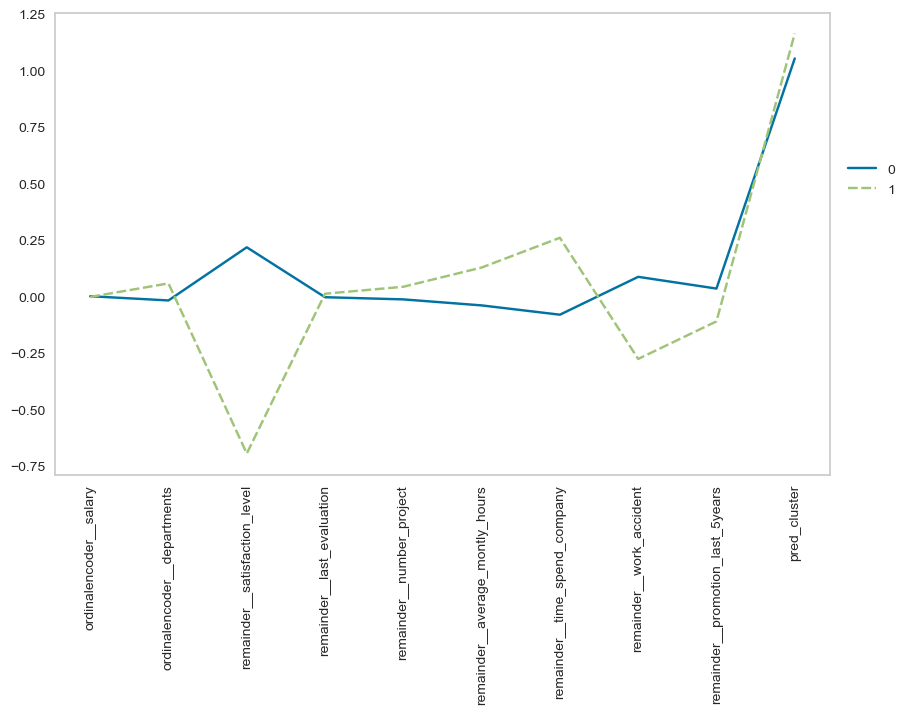

In [135]:
sns.lineplot(data = clus_pred)
plt.legend(bbox_to_anchor=(1.1, 0.7))
plt.xticks(rotation=90)
plt.show()

#### Clustering based on the satisfaction_level, time_spend_company and average_monthly_hours

In [136]:
X_dp.shape, y_dp.shape

((14999, 9), (14999,))

In [137]:
X_dp.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [138]:
X2 = X_dp[["satisfaction_level","time_spend_company","average_montly_hours"]]

In [139]:
X2.head()

satisfaction_level  time_spend_company  average_montly_hours
0                0.38                   3                   157
1                0.80                   6                   262
2                0.11                   4                   272
3                0.72                   5                   223
4                0.37                   3                   159

In [140]:
x2_scaled = scalar.fit_transform(X2)

In [141]:
# hopkins test

hopkins(x2_scaled, x2_scaled.shape[0])

0.06184520181607215

In [142]:
# Elbow method

ssd = []  # sum of squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters = k, random_state=101)
    model.fit(x2_scaled)
    ssd.append(model.inertia_)

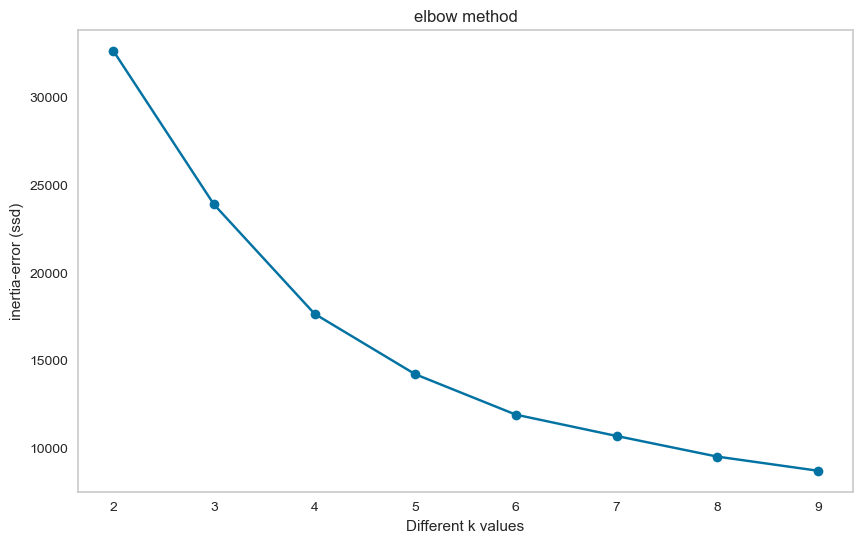

In [143]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")
plt.show();

In [144]:
ssd

[32618.068483676045,
 23874.488103394386,
 17648.03281310373,
 14209.519442107003,
 11908.92544719752,
 10696.172210918943,
 9522.48364111497,
 8718.335983858044]

In [145]:
pd.Series(ssd).diff()

0        NaN
1   -8743.58
2   -6226.46
3   -3438.51
4   -2300.59
5   -1212.75
6   -1173.69
7    -804.15
dtype: float64

In [146]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1     NaN
2 8743.58
3 6226.46
4 3438.51
5 2300.59
6 1212.75
7 1173.69
8  804.15

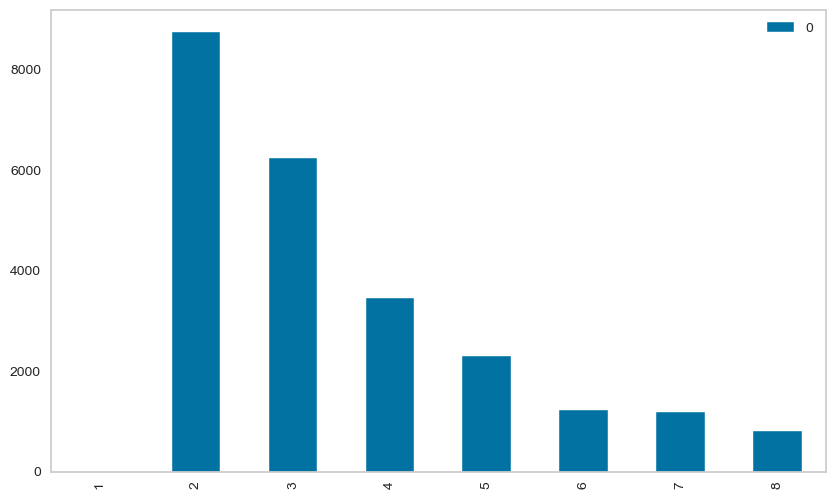

In [147]:
df_diff.plot(kind='bar')
plt.show()

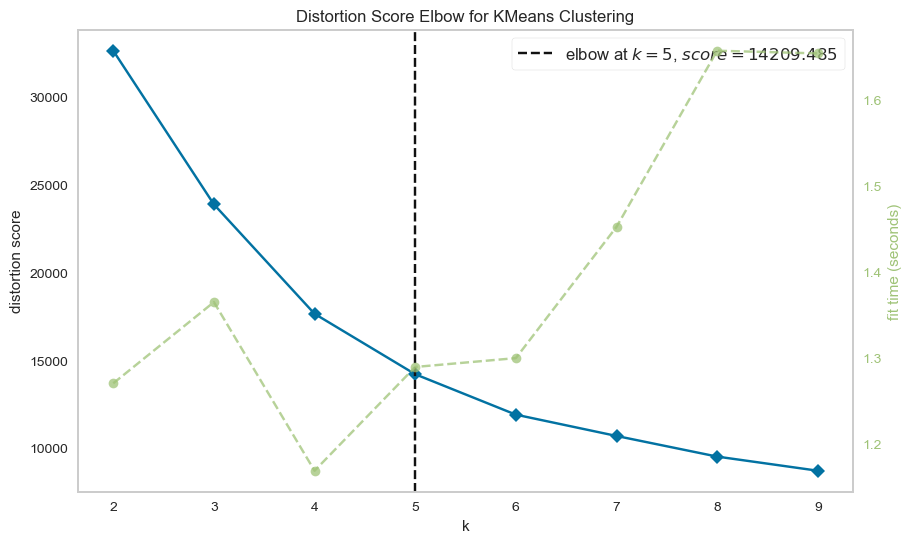

In [148]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(x2_scaled)        # Fit the data to the visualizer
visualizer.show();

In [149]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x2_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3444251901644129
For n_clusters=3, the silhouette score is 0.3330402824534808
For n_clusters=4, the silhouette score is 0.36098828594153515
For n_clusters=5, the silhouette score is 0.35700857452317597
For n_clusters=6, the silhouette score is 0.36840267506212493
For n_clusters=7, the silhouette score is 0.3742043865663975
For n_clusters=8, the silhouette score is 0.36184626424729244


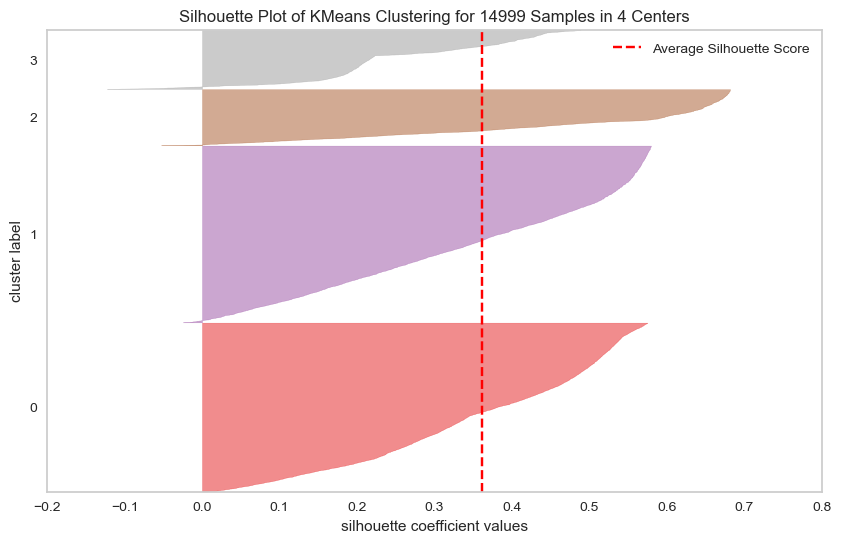

In [150]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(x2_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [152]:
# Model fitting
model = KMeans(n_clusters = 4, random_state=101)
y_pred = model.fit_predict(x2_scaled)
y_pred

array([2, 3, 1, ..., 2, 1, 2])

In [153]:
predicted_label=model.labels_
predicted_label

array([2, 3, 1, ..., 2, 1, 2])

In [154]:
x2_scaled_df = pd.DataFrame(x2_scaled, columns=X2.columns)
x2_scaled_df["left"] = y_dp
x2_scaled_df.head()

satisfaction_level  time_spend_company  average_montly_hours  left
0               -0.94               -0.34                 -0.88     1
1                0.75                1.71                  1.22     1
2               -2.02                0.34                  1.42     1
3                0.43                1.03                  0.44     1
4               -0.98               -0.34                 -0.84     1

In [155]:
x2_scaled_df["pred_cluster"] = predicted_label
x2_scaled_df.head()

satisfaction_level  time_spend_company  average_montly_hours  left  \
0               -0.94               -0.34                 -0.88     1   
1                0.75                1.71                  1.22     1   
2               -2.02                0.34                  1.42     1   
3                0.43                1.03                  0.44     1   
4               -0.98               -0.34                 -0.84     1   

   pred_cluster  
0             2  
1             3  
2             1  
3             3  
4             2

In [156]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(x2_scaled_df.left, y_pred)

0.12832181702317297

In [157]:
ct = pd.crosstab(y_pred, x2_scaled_df.left)
ct

left      0     1
row_0            
0      5491    79
1       859   966
2      4062  1628
3      1016   898

## 5. Model Building

In [158]:
df_with_dp = pd.read_csv("df_with_dp.csv")
df_without_dp = pd.read_csv("df_without_dp.csv")

### Implement Lazypredict with duplicates

In [159]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [161]:
import pyforest
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [162]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:04<00:00,  2.21s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.99               0.98     0.98      0.99   
ExtraTreesClassifier               0.99               0.98     0.98      0.99   
BaggingClassifier                  0.99               0.98     0.98      0.99   
LGBMClassifier                     0.99               0.98     0.98      0.99   
DecisionTreeClassifier             0.98               0.97     0.97      0.98   
LabelPropagation                   0.97               0.97     0.97      0.97   
LabelSpreading                     0.97               0.97     0.97      0.97   
XGBClassifier                      0.98               0.96     0.96      0.98   
ExtraTreeClassifier                0.97               0.96     0.96      0.97   
SVC                                0.96               0.95     0.95      0.96   
AdaBoostClassifier                 0.96               0.95     0.95      0.96   
KNeighborsClassifier               0.94               0.94     0.94      0.95   
QuadraticDiscriminantAnalysis      0.85               0.84     0.84      0.86   
NearestCentroid                    0.75               0.74     0.74      0.76   
GaussianNB                         0.66               0.72     0.72      0.69   
LogisticRegression                 0.79               0.64     0.64      0.77   
LinearDiscriminantAnalysis         0.78               0.62     0.62      0.76   
CalibratedClassifierCV             0.78               0.61     0.61      0.75   
LinearSVC                          0.78               0.60     0.60      0.74   
RidgeClassifier                    0.78               0.60     0.60      0.74   
RidgeClassifierCV                  0.78               0.60     0.60      0.74   
SGDClassifier                      0.79               0.57     0.57      0.73   
BernoulliNB                        0.75               0.56     0.56      0.71   
Perceptron                         0.76               0.52     0.52      0.69   
PassiveAggressiveClassifier        0.76               0.52     0.52      0.68   
DummyClassifier                    0.76               0.50     0.50      0.66   

                               Time Taken  
Model                                      
RandomForestClassifier               2.71  
ExtraTreesClassifier                 2.99  
BaggingClassifier                    0.95  
LGBMClassifier                       0.73  
DecisionTreeClassifier               0.21  
LabelPropagation                    14.58  
LabelSpreading                      19.05  
XGBClassifier                        4.22  
ExtraTreeClassifier                  0.13  
SVC                                  5.27  
AdaBoostClassifier                   1.07  
KNeighborsClassifier                 0.55  
QuadraticDiscriminantAnalysis        0.14  
NearestCentroid                      0.09  
GaussianNB                           0.10  
LogisticRegression                   0.22  
LinearDiscriminantAnalysis           0.23  
CalibratedClassifierCV               7.65  
LinearSVC                            2.20  
RidgeClassifier                      0.10  
RidgeClassifierCV                    0.14  
SGDClassifier                        0.26  
BernoulliNB                          0.09  
Perceptron                           0.09  
PassiveAggressiveClassifier          0.12  
DummyClassifier                      0.06

### Implement Lazypredict without duplicates

In [163]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [165]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:42<00:00,  1.46s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.99               0.97     0.97      0.99   
BaggingClassifier                  0.98               0.96     0.96      0.98   
RandomForestClassifier             0.99               0.96     0.96      0.99   
XGBClassifier                      0.98               0.96     0.96      0.98   
DecisionTreeClassifier             0.96               0.95     0.95      0.96   
SVC                                0.97               0.95     0.95      0.97   
ExtraTreesClassifier               0.98               0.95     0.95      0.98   
KNeighborsClassifier               0.95               0.94     0.94      0.95   
LabelSpreading                     0.95               0.93     0.93      0.95   
LabelPropagation                   0.95               0.93     0.93      0.95   
AdaBoostClassifier                 0.96               0.93     0.93      0.96   
ExtraTreeClassifier                0.93               0.90     0.90      0.94   
QuadraticDiscriminantAnalysis      0.84               0.84     0.84      0.86   
GaussianNB                         0.73               0.75     0.75      0.76   
NearestCentroid                    0.76               0.71     0.71      0.79   
LinearDiscriminantAnalysis         0.83               0.60     0.60      0.81   
PassiveAggressiveClassifier        0.75               0.60     0.60      0.76   
CalibratedClassifierCV             0.84               0.60     0.60      0.81   
LogisticRegression                 0.84               0.59     0.59      0.81   
LinearSVC                          0.84               0.57     0.57      0.80   
RidgeClassifier                    0.85               0.56     0.56      0.80   
RidgeClassifierCV                  0.85               0.56     0.56      0.80   
Perceptron                         0.58               0.56     0.56      0.63   
BernoulliNB                        0.83               0.56     0.56      0.79   
DummyClassifier                    0.83               0.50     0.50      0.76   
SGDClassifier                      0.83               0.50     0.50      0.76   

                               Time Taken  
Model                                      
LGBMClassifier                       0.56  
BaggingClassifier                    0.75  
RandomForestClassifier               2.20  
XGBClassifier                        3.01  
DecisionTreeClassifier               0.18  
SVC                                  2.85  
ExtraTreesClassifier                 2.19  
KNeighborsClassifier                 0.60  
LabelSpreading                      11.03  
LabelPropagation                     8.46  
AdaBoostClassifier                   1.00  
ExtraTreeClassifier                  0.09  
QuadraticDiscriminantAnalysis        0.09  
GaussianNB                           0.09  
NearestCentroid                      0.08  
LinearDiscriminantAnalysis           0.13  
PassiveAggressiveClassifier          0.09  
CalibratedClassifierCV               6.21  
LogisticRegression                   0.21  
LinearSVC                            1.61  
RidgeClassifier                      0.08  
RidgeClassifierCV                    0.13  
Perceptron                           0.09  
BernoulliNB                          0.09  
DummyClassifier                      0.07  
SGDClassifier                        0.21

### Build Pipeline to Implement ML Models

In [75]:
# define a function to compare evaluation metrics of ML models

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show();

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train)
    plt.show();

In [74]:
# Defining column_trans object that contains onehot encoder and ordinal encoder

onehot_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((onehot_enc, ["departments"]), (ordinal_enc, ["salary"]), remainder= "passthrough")

# Defining scaler object
scaler = MinMaxScaler()

### Distance Based(?) Algorithm

### SVC Model- without duplicates

In [70]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [76]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC_model", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

SVC_pipe_model = Pipeline(steps=operations)

In [77]:
# fit the logistic regression model on train data

SVC_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', MinMaxScaler()),
                ('SVC_model',
                 SVC(class_weight='balanced', max_iter=10000,
                     random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2001
           1       0.71      0.92      0.80       398

    accuracy                           0.93      2399
   macro avg       0.85      0.93      0.88      2399
weighted avg       0.94      0.93      0.93      2399



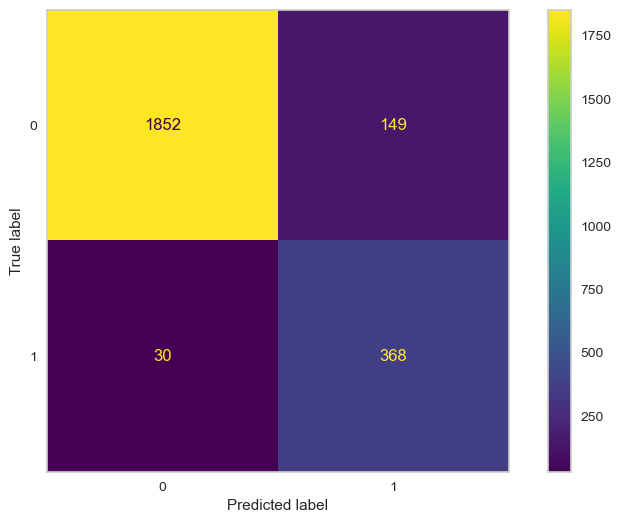




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7999
           1       0.76      0.92      0.83      1593

    accuracy                           0.94      9592
   macro avg       0.87      0.93      0.90      9592
weighted avg       0.95      0.94      0.94      9592



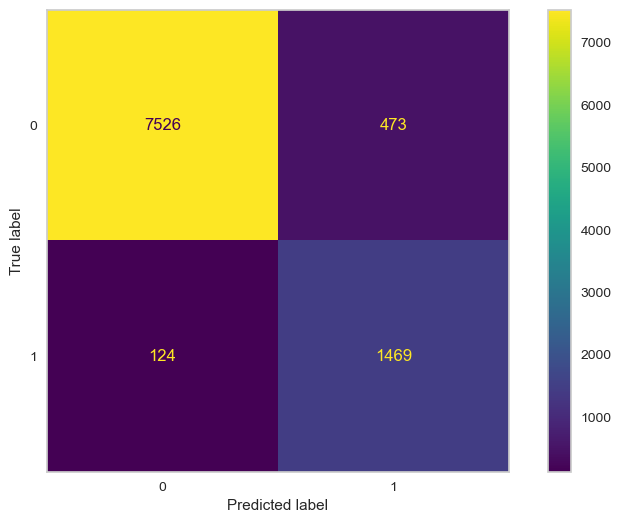

In [78]:
# check the evaluation metrics of logistic model

eval_metric(SVC_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### SVC Model Cross Validation

In [79]:
model = Pipeline(operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  train_precision  test_recall  \
1       1.50        0.25            0.74             0.76         0.92   
2       1.35        0.27            0.76             0.75         0.89   
3       1.29        0.28            0.75             0.76         0.90   
4       1.48        0.25            0.73             0.75         0.92   
5       1.47        0.22            0.73             0.75         0.94   
6       1.41        0.24            0.72             0.76         0.89   
7       1.48        0.30            0.74             0.76         0.92   
8       1.41        0.22            0.78             0.75         0.92   
9       1.43        0.24            0.75             0.75         0.92   
10      1.38        0.30            0.74             0.76         0.90   

    train_recall  test_f1  train_f1  test_accuracy  train_accuracy  
1           0.92     0.82      0.83           0.93            0.94  
2           0.92     0.82      0.83           0.93            0.94  
3           0.92     0.82      0.83           0.93            0.94  
4           0.92     0.82      0.83           0.93            0.94  
5           0.92     0.82      0.83           0.93            0.94  
6           0.92     0.80      0.83           0.93            0.94  
7           0.92     0.82      0.83           0.93            0.94  
8           0.92     0.84      0.83           0.94            0.94  
9           0.92     0.82      0.83           0.94            0.94  
10          0.92     0.81      0.83           0.93            0.94

In [80]:
df_scores.mean()[2:]

test_precision    0.74
train_precision   0.75
test_recall       0.91
train_recall      0.92
test_f1           0.82
train_f1          0.83
test_accuracy     0.93
train_accuracy    0.94
dtype: float64

#### SVC Model GridsearchCV

In [81]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
model = Pipeline(operations)

# defining the grid parameter
param_grid = {'SVC__C': [0.01, 0.1, 1, 5],
              'SVC__gamma': ["scale", "auto", 1, 0.1, 0.01]
             }

# built SVC grid model
SVC_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="f1", cv=5, n_jobs=-1)

In [82]:
# fit grid model on train data

SVC_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            max_iter=10000,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1, 5],
                         'SVC__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring='f1')

In [83]:
SVC_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', MinMaxScaler()),
                ('SVC',
                 SVC(C=5, class_weight='balanced', gamma=1, max_iter=10000,
                     random_state=101))])

In [84]:
SVC_grid_model.best_params_

{'SVC__C': 5, 'SVC__gamma': 1}

In [85]:
SVC_grid_model.best_score_

0.8391869472705219

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2001
           1       0.76      0.91      0.83       398

    accuracy                           0.94      2399
   macro avg       0.87      0.93      0.90      2399
weighted avg       0.95      0.94      0.94      2399



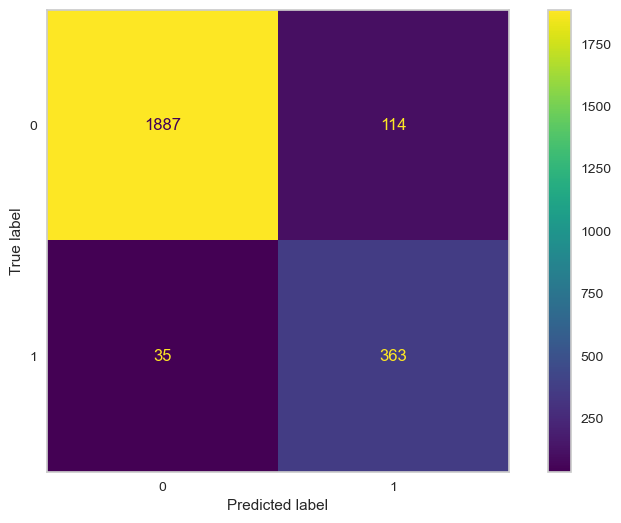




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      7999
           1       0.81      0.94      0.87      1593

    accuracy                           0.95      9592
   macro avg       0.90      0.95      0.92      9592
weighted avg       0.96      0.95      0.96      9592



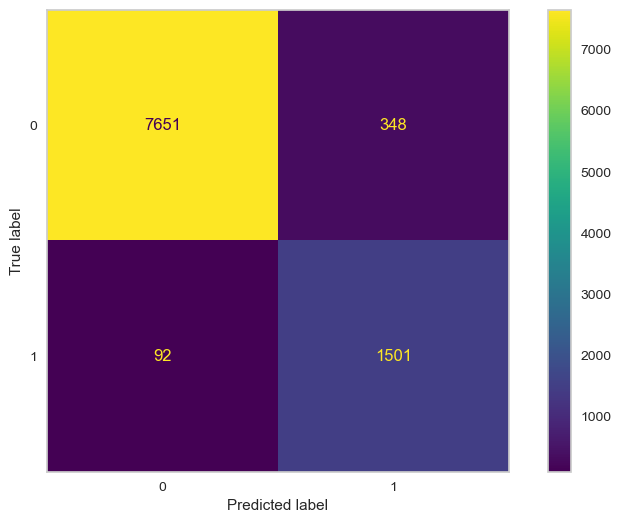

In [86]:
# checking the evaluation metrics of grid model

eval_metric(SVC_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

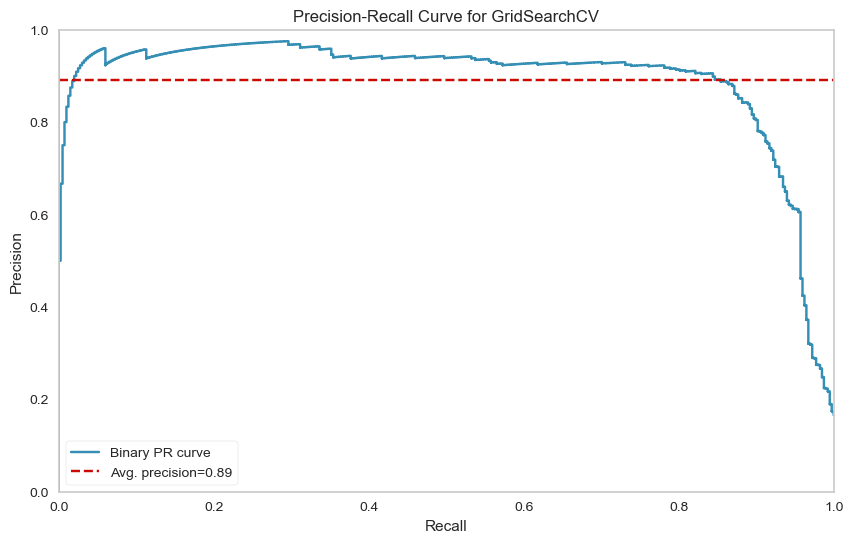

In [87]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=SVC_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

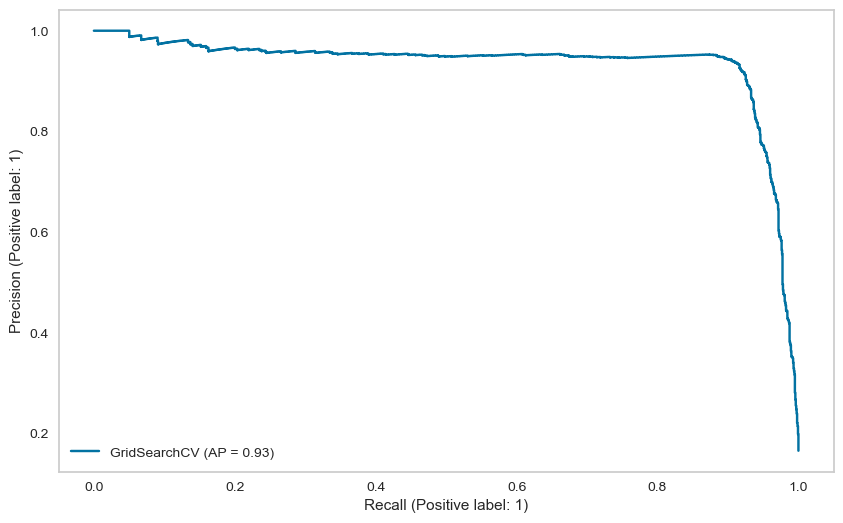

In [88]:
plot_precision_recall_curve(SVC_grid_model, X_train, y_train);

#### Prediction

In [89]:
# predict on train and test data
y_pred_test = SVC_grid_model.predict(X_test)
y_pred_train = SVC_grid_model.predict(X_train)

# predict probability using decision function on test and train data
y_pred_proba_test = SVC_grid_model.decision_function(X_test)
y_pred_proba_train = SVC_grid_model.decision_function(X_train)

In [92]:
# define model comparison variables

SVC_AP_test = average_precision_score(y_test, y_pred_proba_test) # AP: average 
SVC_AP_train = average_precision_score(y_train, y_pred_proba_train)

SVC_f1_test = f1_score(y_test, y_pred_test)
SVC_f1_train = f1_score(y_train, y_pred_train)

SVC_recall_test = recall_score(y_test, y_pred_test)
SVC_recall_train = recall_score(y_train, y_pred_train)

SVC_AP_test, SVC_AP_train, SVC_f1_test, SVC_f1_train, SVC_recall_test, SVC_recall_train

(0.8913894983366276,
 0.9346168622270322,
 0.8297142857142857,
 0.8721673445671121,
 0.9120603015075377,
 0.9422473320778405)

In [437]:
# !pip install scikit-plot -q
# import scikitplot as skplt

In [438]:
# from sklearn.calibration import CalibratedClassifierCV

# calibrated_svc = CalibratedClassifierCV(
#     # base_estimator=LinearSVC(C=0.05, class_weight='balanced', random_state=random_state),
#     base_estimator=SVC_grid_model, 
#     method='sigmoid',
#     cv=5, 
# )
# calibrated_svc.fit(X_train, y_train)

# y_probas = calibrated_svc.predict_proba(X_test)
# skplt.metrics.plot_precision_recall(y_test, y_probas)
# plt.show()

### SVC Model - with duplicates

In [93]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [95]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC_model", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

SVC_pipe_model = Pipeline(steps=operations)

In [96]:
# fit the logistic regression model on train data

SVC_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', MinMaxScaler()),
                ('SVC_model',
                 SVC(class_weight='balanced', max_iter=10000,
                     random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2286
           1       0.80      0.93      0.86       714

    accuracy                           0.93      3000
   macro avg       0.89      0.93      0.91      3000
weighted avg       0.93      0.93      0.93      3000



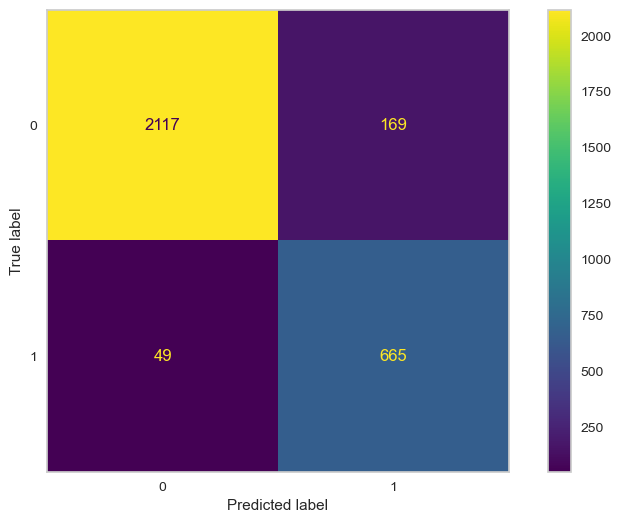




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      9142
           1       0.83      0.92      0.87      2857

    accuracy                           0.94     11999
   macro avg       0.90      0.93      0.92     11999
weighted avg       0.94      0.94      0.94     11999



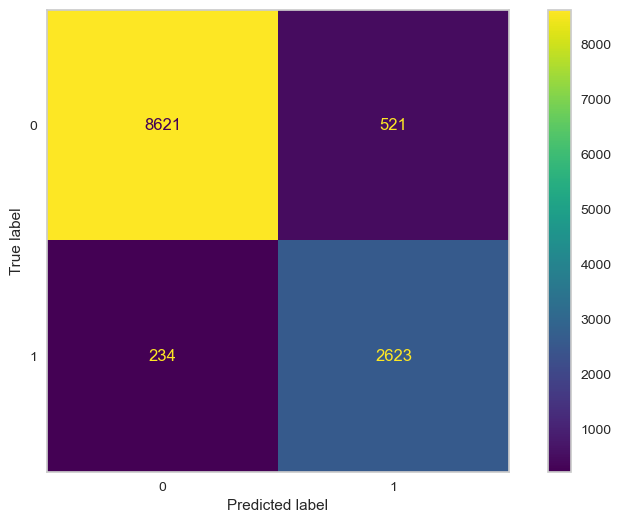

In [97]:
# check the evaluation metrics of logistic model

eval_metric(SVC_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### SVC Model Cross Validation

In [98]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.83
train_precision   0.83
test_recall       0.91
train_recall      0.92
test_f1           0.87
train_f1          0.87
test_accuracy     0.93
train_accuracy    0.94
dtype: float64

In [99]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("SVC", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
model = Pipeline(operations)

# defining the grid parameter
param_grid = {'SVC__C': [0.01, 0.1, 1],
              'SVC__gamma': ["scale", "auto", 1, 0.1, 0.01]
             }

# built SVC grid model
SVC_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="f1", cv=5, n_jobs=-1)

In [100]:
# fit grid model on train data

SVC_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            max_iter=10000,
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1],
                         'SVC__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring='f1')

In [101]:
SVC_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', MinMaxScaler()),
                ('SVC',
                 SVC(C=1, class_weight='balanced', gamma=1, max_iter=10000,
                     random_state=101))])

In [102]:
SVC_grid_model.best_params_

{'SVC__C': 1, 'SVC__gamma': 1}

In [103]:
SVC_grid_model.best_score_

0.8807839635013318

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2286
           1       0.83      0.94      0.88       714

    accuracy                           0.94      3000
   macro avg       0.90      0.94      0.92      3000
weighted avg       0.94      0.94      0.94      3000



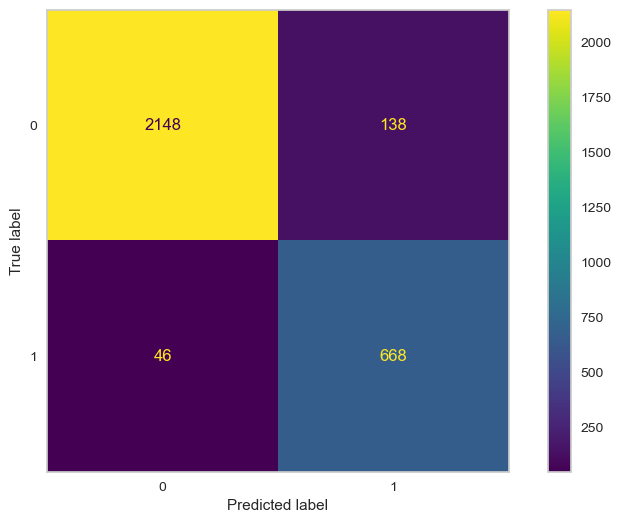




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      9142
           1       0.86      0.93      0.89      2857

    accuracy                           0.95     11999
   macro avg       0.92      0.94      0.93     11999
weighted avg       0.95      0.95      0.95     11999



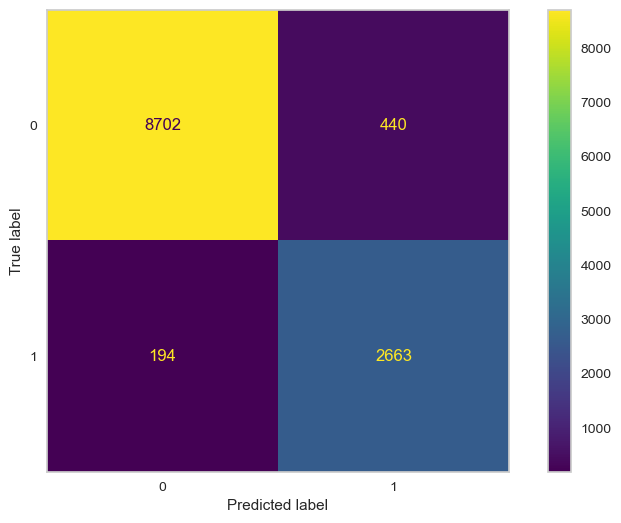

In [104]:
# checking the evaluation metrics of grid model

eval_metric(SVC_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

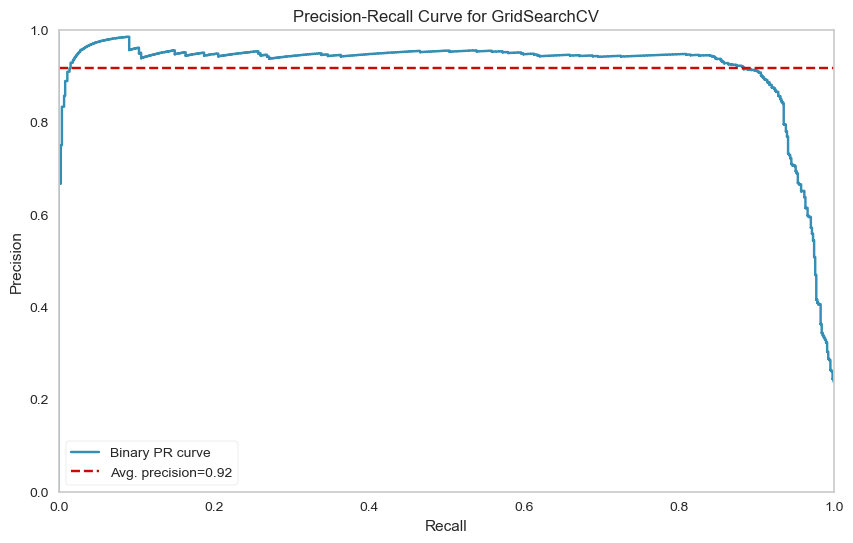

In [105]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=SVC_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

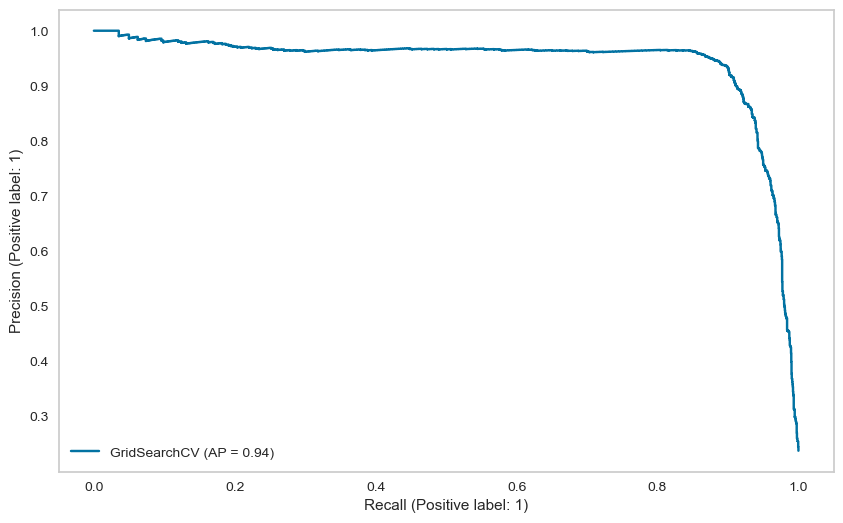

In [106]:
plot_precision_recall_curve(SVC_grid_model, X_train, y_train);

#### Prediction

In [107]:
# predict on train and test data
y_pred_test = SVC_grid_model.predict(X_test)
y_pred_train = SVC_grid_model.predict(X_train)

# predict probability using decision function on test and train data
y_pred_proba_test = SVC_grid_model.decision_function(X_test)
y_pred_proba_train = SVC_grid_model.decision_function(X_train)

In [108]:
# define model comparison variables

SVC_AP_test = average_precision_score(y_test, y_pred_proba_test) # AP: average 
SVC_AP_train = average_precision_score(y_train, y_pred_proba_train)

SVC_f1_test = f1_score(y_test, y_pred_test)
SVC_f1_train = f1_score(y_train, y_pred_train)

SVC_recall_test = recall_score(y_test, y_pred_test)
SVC_recall_train = recall_score(y_train, y_pred_train)

SVC_AP_test, SVC_AP_train, SVC_f1_test, SVC_f1_train, SVC_recall_test, SVC_recall_train

(0.9177539394916006,
 0.9430303577288842,
 0.8789473684210527,
 0.8936241610738254,
 0.9355742296918768,
 0.9320966048302415)

### KNN Model - without duplicates

In [109]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [111]:
# built a pipe model for KNN with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier())]

KNN_pipe_model = Pipeline(steps=operations)

In [112]:
# fit the logistic regression model on train data

KNN_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', MinMaxScaler()),
                ('KNN_model', KNeighborsClassifier())])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.81      0.89      0.85       398

    accuracy                           0.95      2399
   macro avg       0.89      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399



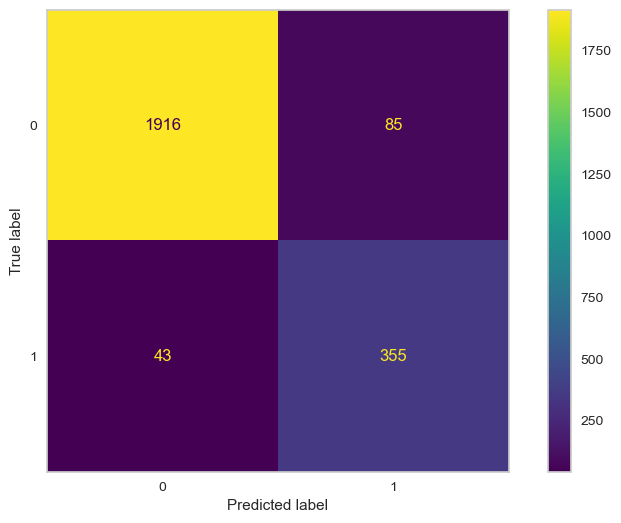




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.88      0.88      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



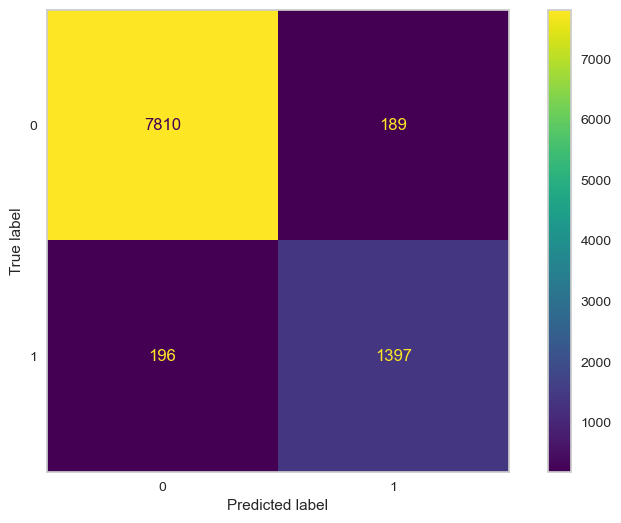

In [113]:
# check the evaluation metrics of logistic model

eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### KNN Model Cross Validation

In [114]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.84
train_precision   0.88
test_recall       0.86
train_recall      0.87
test_f1           0.85
train_f1          0.88
test_accuracy     0.95
train_accuracy    0.96
dtype: float64

#### Elbow Method for Choosing Reasonable K Values

In [115]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=k))]
    KNN_pipe_model = Pipeline(steps=operations)
    KNN_pipe_model.fit(X_train, y_train)  
   
    y_pred_test = KNN_pipe_model.predict(X_test)
    y_pred_train = KNN_pipe_model.predict(X_train)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

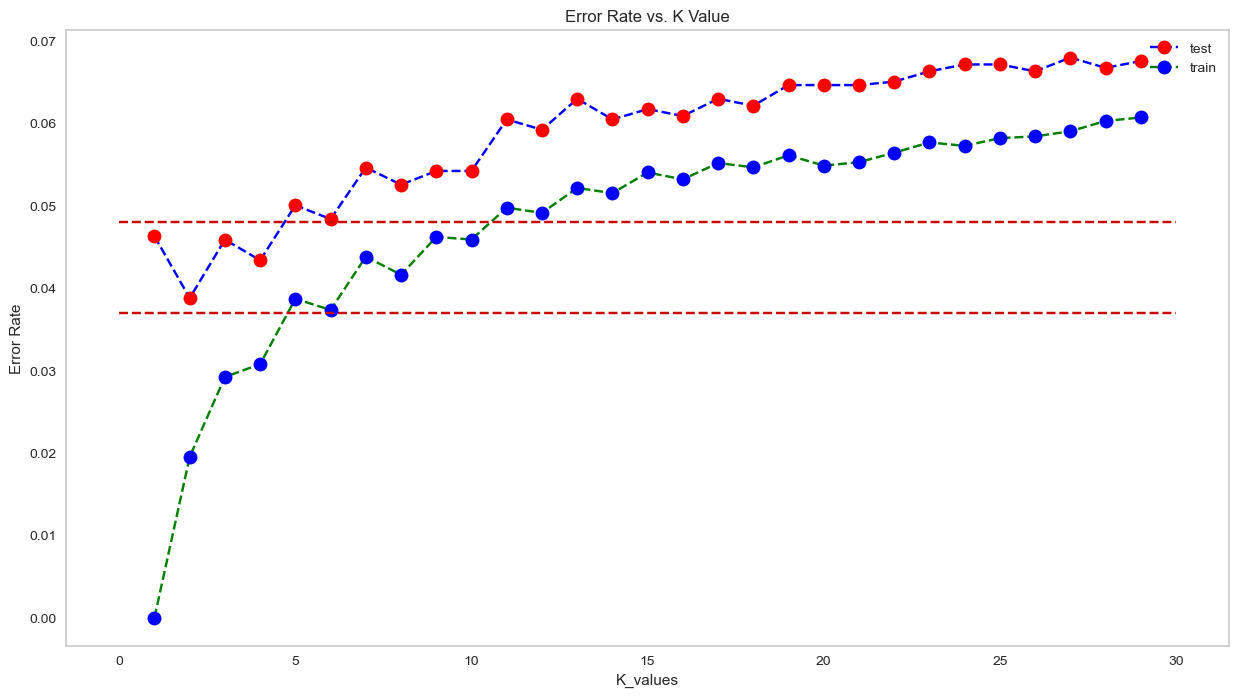

In [464]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.037, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.048, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.legend(["test", "train"]);

#### Scores by Various K Values

WITH K=6

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.88      0.86       398

    accuracy                           0.95      2399
   macro avg       0.91      0.92      0.92      2399
weighted avg       0.95      0.95      0.95      2399



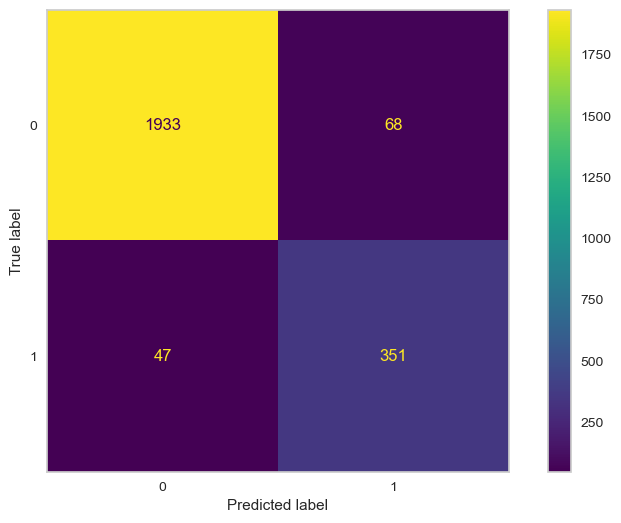




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7999
           1       0.90      0.86      0.88      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.92      0.93      9592
weighted avg       0.96      0.96      0.96      9592



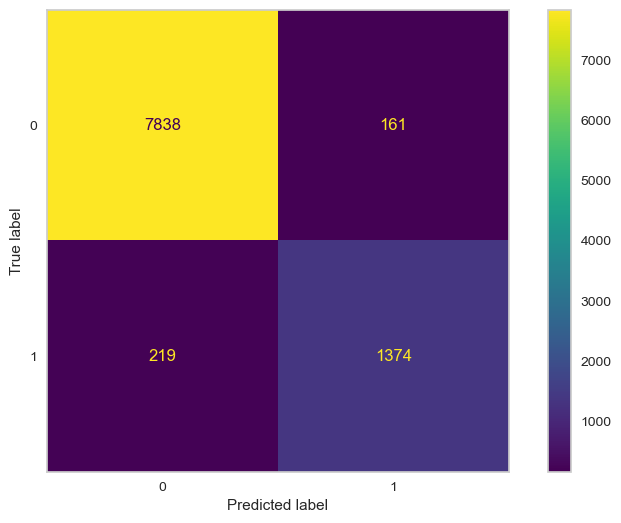

In [116]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=6))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=6\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=7

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.81      0.89      0.85       398

    accuracy                           0.95      2399
   macro avg       0.89      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399



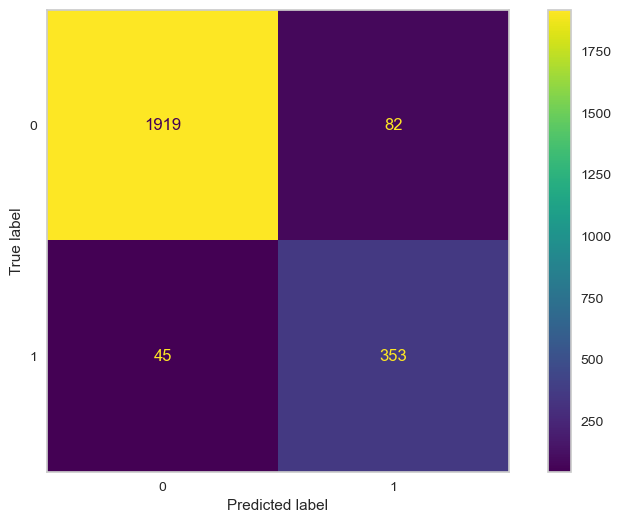




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7999
           1       0.87      0.87      0.87      1593

    accuracy                           0.96      9592
   macro avg       0.92      0.92      0.92      9592
weighted avg       0.96      0.96      0.96      9592



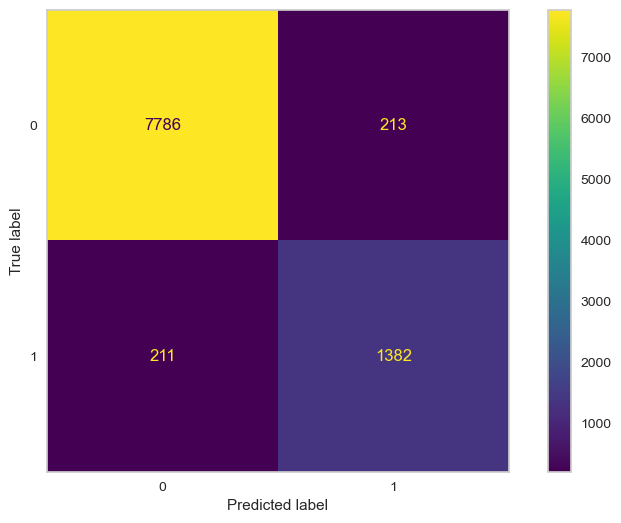

In [117]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=7))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=7\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=8

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.83      0.88      0.85       398

    accuracy                           0.95      2399
   macro avg       0.90      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399



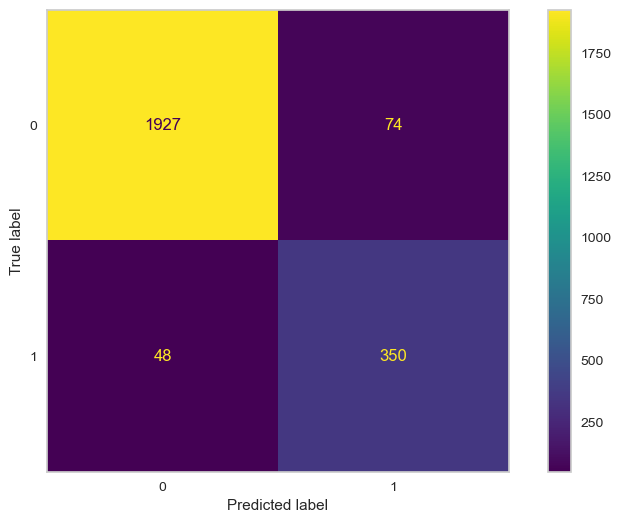




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7999
           1       0.88      0.86      0.87      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.92      0.92      9592
weighted avg       0.96      0.96      0.96      9592



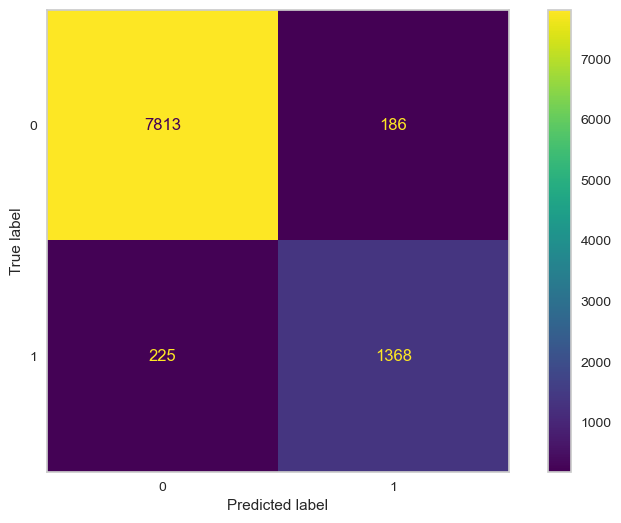

In [118]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=8))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=8\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=10

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2001
           1       0.82      0.86      0.84       398

    accuracy                           0.94      2399
   macro avg       0.89      0.91      0.90      2399
weighted avg       0.95      0.94      0.95      2399



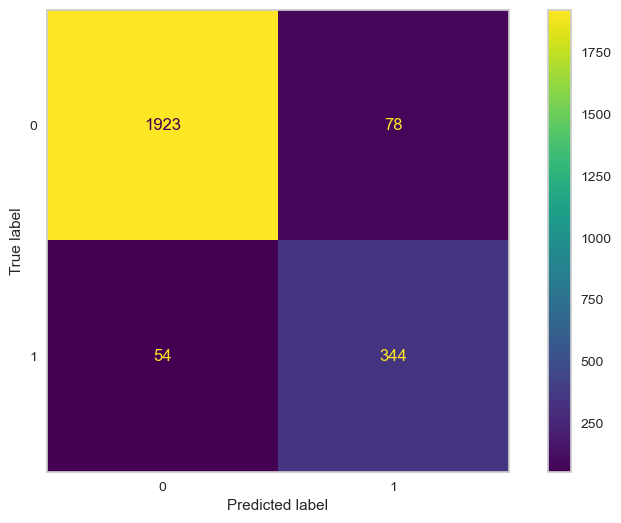




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7999
           1       0.87      0.84      0.86      1593

    accuracy                           0.95      9592
   macro avg       0.92      0.91      0.91      9592
weighted avg       0.95      0.95      0.95      9592



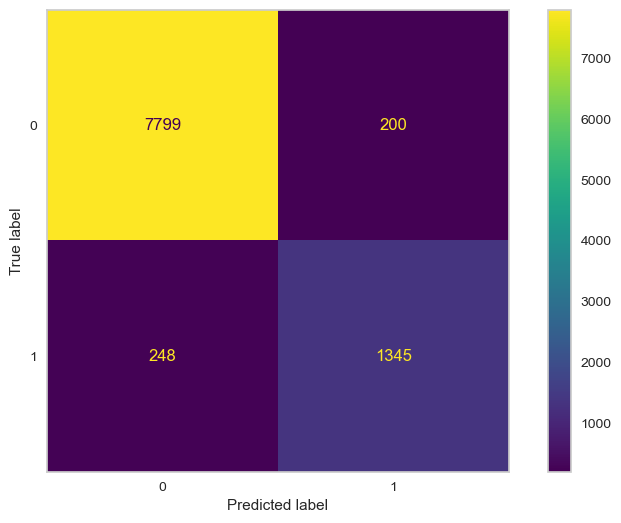

In [119]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=10))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=10\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

#### KNN Model GridsearchCV

In [120]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN", KNeighborsClassifier())]
model = Pipeline(operations)

# defining the grid parameter
k_values=[5, 6, 7, 8, 10, 15]

param_grid = {'KNN__n_neighbors': k_values,
              'KNN__p': [1,2],
              'KNN__weights': ['uniform', "distance"]
             }

# built KNN grid model
KNN_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="f1", cv=5, n_jobs=-1)

In [121]:
# fit grid model on train data

KNN_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', MinMaxScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__n_neighbors': [5, 6, 7, 8, 10, 15],
                         'KNN__p': [1, 2],
                         'KNN__weights': ['uniform', 'distance']},
             scoring='f1')

In [122]:
KNN_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', MinMaxScaler()),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=6, p=1, weights='distance'))])

In [123]:
KNN_grid_model.best_params_

{'KNN__n_neighbors': 6, 'KNN__p': 1, 'KNN__weights': 'distance'}

In [124]:
KNN_grid_model.best_score_

0.8657931017224094

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.81      0.91      0.86       398

    accuracy                           0.95      2399
   macro avg       0.90      0.94      0.92      2399
weighted avg       0.95      0.95      0.95      2399




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



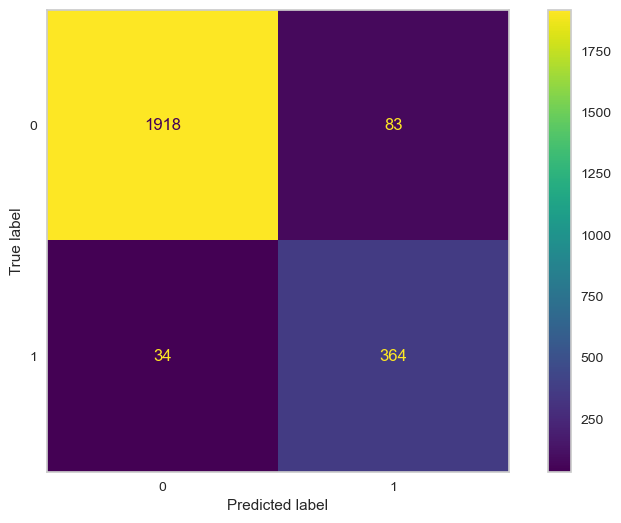

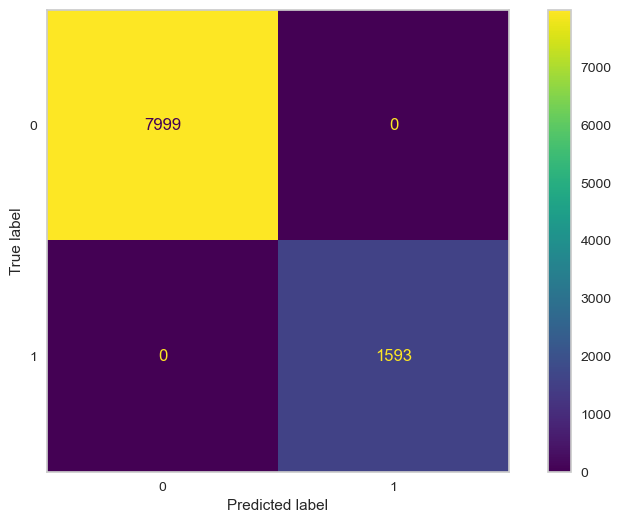

In [474]:
# checking the evaluation metrics of grid model

eval_metric(KNN_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

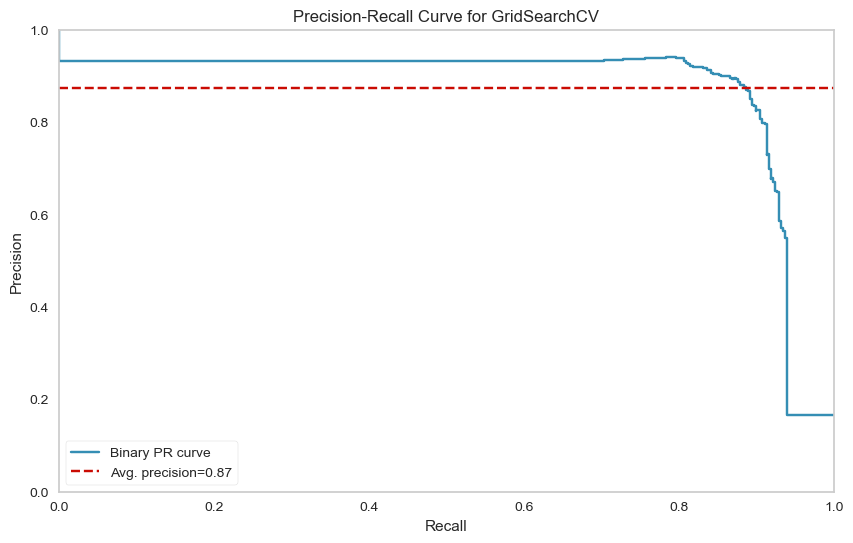

In [125]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=KNN_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

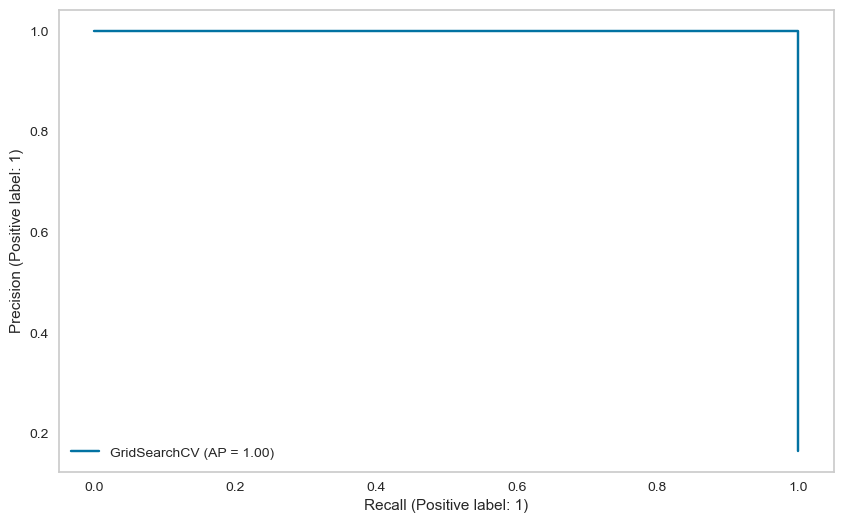

In [126]:
plot_precision_recall_curve(KNN_grid_model, X_train, y_train);

#### Prediction

In [127]:
# predict on train and test data

y_pred_test = KNN_grid_model.predict(X_test)
y_pred_train = KNN_grid_model.predict(X_train)

In [128]:
# define model comparison variables

KNN_AP = viz.score_ # AP: average precision

KNN_f1_test = f1_score(y_test, y_pred_test)
KNN_f1_train = f1_score(y_train, y_pred_train)

KNN_recall_test = recall_score(y_test, y_pred_test)
KNN_recall_train = recall_score(y_train, y_pred_train)

KNN_AP, KNN_f1_test, KNN_f1_train, KNN_recall_test, KNN_recall_train

(0.8744291762438149, 0.8626506024096385, 1.0, 0.8994974874371859, 1.0)

### KNN Model - with duplicates

In [129]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [131]:
# built a pipe model for Logistic Regression with default hyperparameter

operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier())]

KNN_pipe_model = Pipeline(steps=operations)

In [132]:
# fit the KNN model on train data

KNN_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', MinMaxScaler()),
                ('KNN_model', KNeighborsClassifier())])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2286
           1       0.86      0.92      0.89       714

    accuracy                           0.94      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg       0.95      0.94      0.94      3000



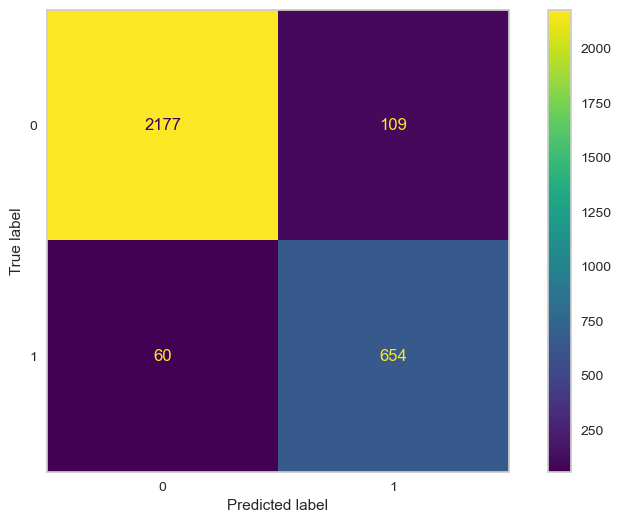




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9142
           1       0.90      0.94      0.92      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.96      0.95     11999
weighted avg       0.96      0.96      0.96     11999



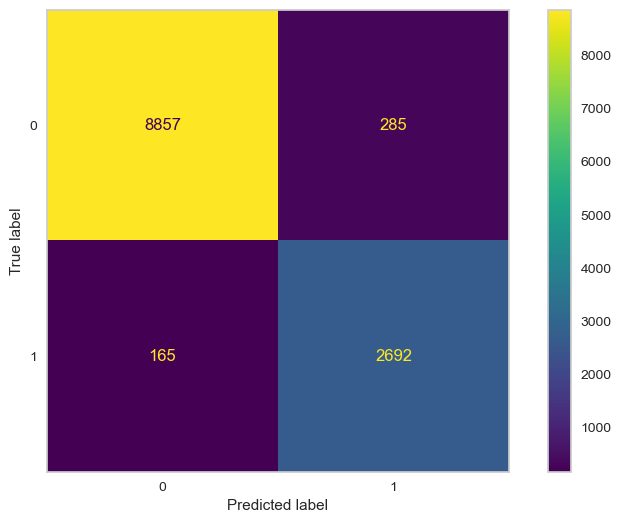

In [133]:
# check the evaluation metrics of logistic model

eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

#### KNN Model Cross Validation

In [135]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.86
train_precision   0.90
test_recall       0.88
train_recall      0.93
test_f1           0.87
train_f1          0.92
test_accuracy     0.94
train_accuracy    0.96
dtype: float64

#### Elbow Method for Choosing Reasonable K Values

In [136]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=k))]
    KNN_pipe_model = Pipeline(steps=operations)
    KNN_pipe_model.fit(X_train, y_train)  
   
    y_pred_test = KNN_pipe_model.predict(X_test)
    y_pred_train = KNN_pipe_model.predict(X_train)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

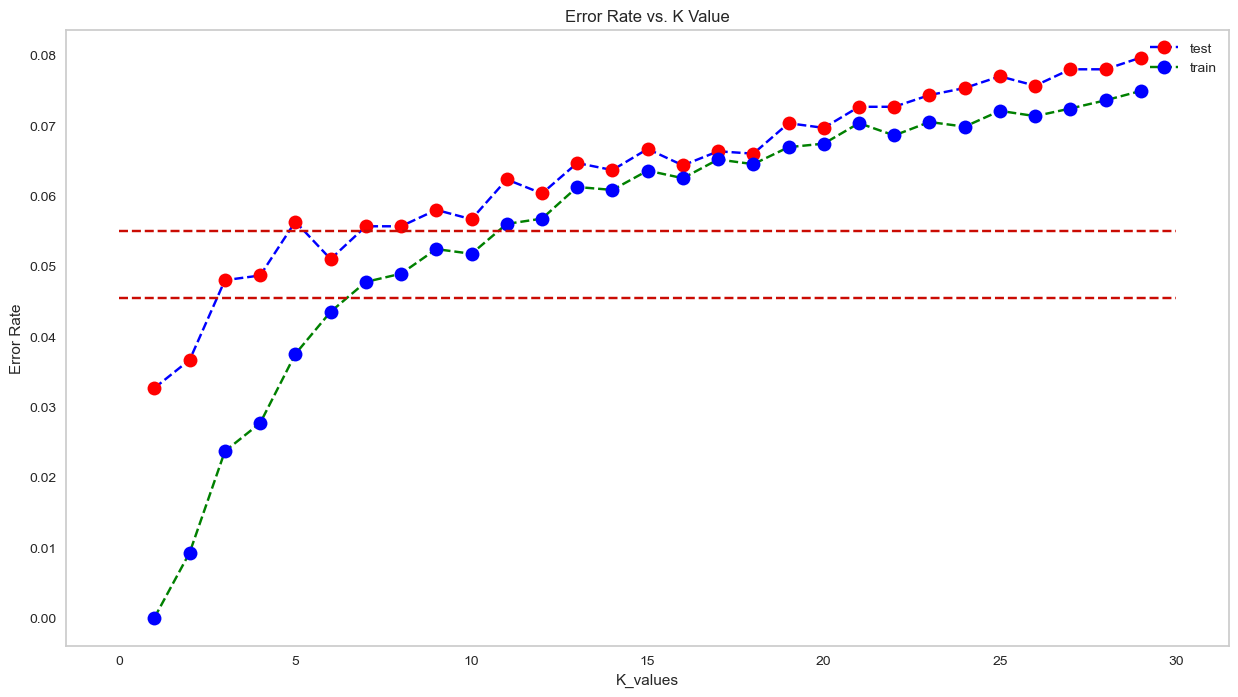

In [137]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.0455, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.055, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.legend(["test", "train"]);

#### Scores by Various K Values

WITH K=6

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2286
           1       0.88      0.91      0.89       714

    accuracy                           0.95      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



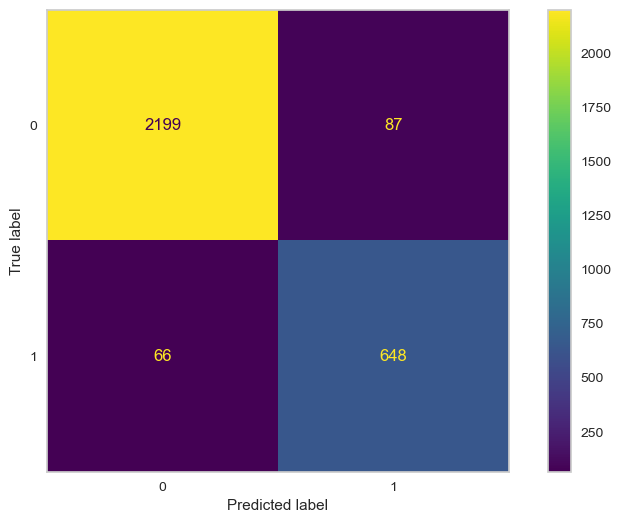




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9142
           1       0.92      0.89      0.91      2857

    accuracy                           0.96     11999
   macro avg       0.95      0.93      0.94     11999
weighted avg       0.96      0.96      0.96     11999



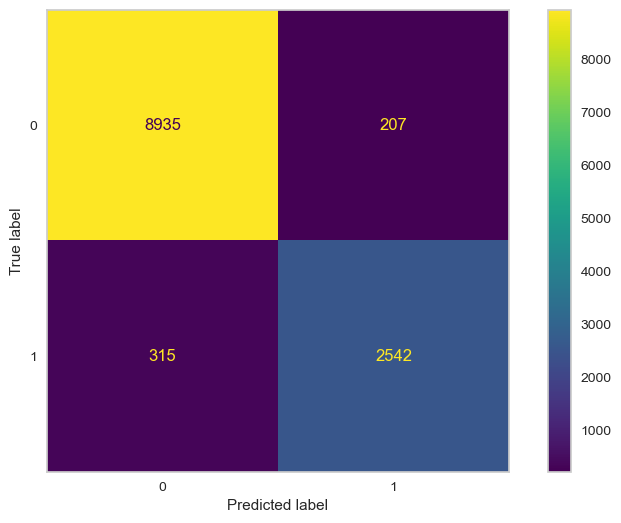

In [138]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=6))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=6\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=7

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.86      0.92      0.89       714

    accuracy                           0.94      3000
   macro avg       0.92      0.94      0.93      3000
weighted avg       0.95      0.94      0.95      3000



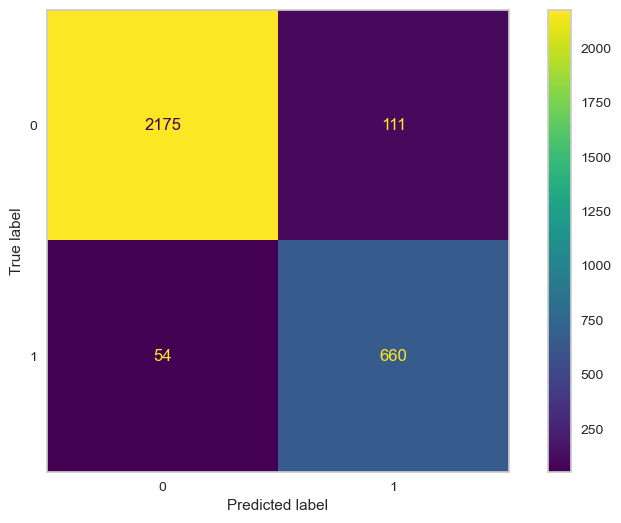




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9142
           1       0.90      0.91      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.94      0.94      0.94     11999
weighted avg       0.95      0.95      0.95     11999



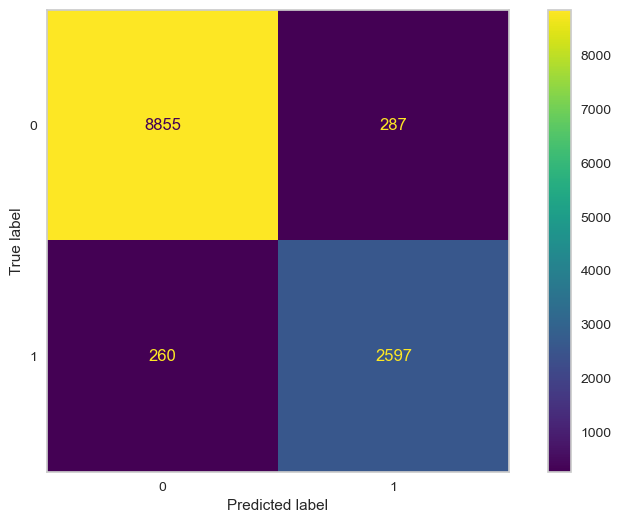

In [231]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=7))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=7\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=8

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2286
           1       0.87      0.90      0.88       714

    accuracy                           0.94      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



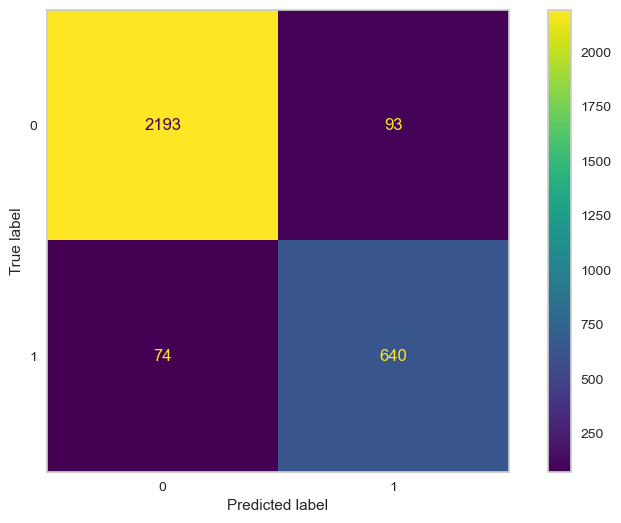




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9142
           1       0.91      0.88      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.94      0.93      0.93     11999
weighted avg       0.95      0.95      0.95     11999



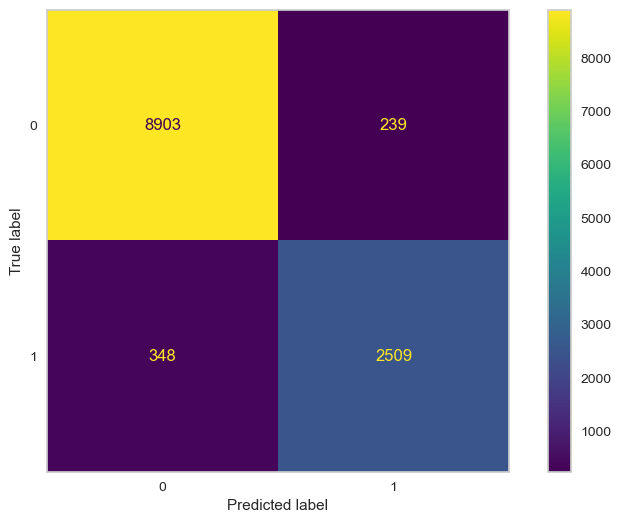

In [139]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=8))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=8\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

WITH K=10

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2286
           1       0.87      0.90      0.88       714

    accuracy                           0.94      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



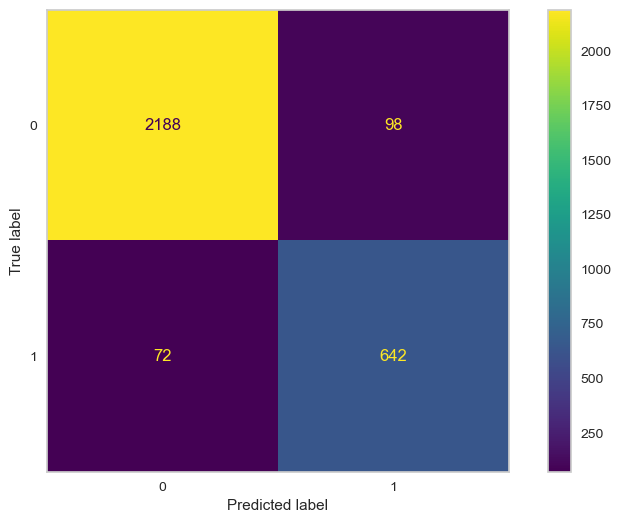




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9142
           1       0.90      0.88      0.89      2857

    accuracy                           0.95     11999
   macro avg       0.93      0.92      0.93     11999
weighted avg       0.95      0.95      0.95     11999



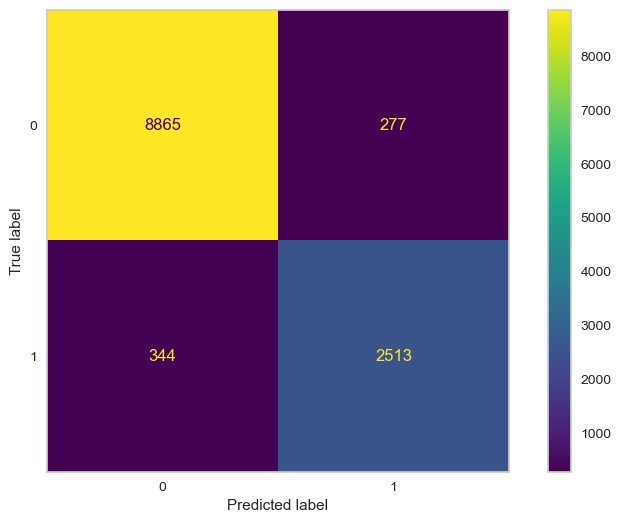

In [140]:
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN_model", KNeighborsClassifier(n_neighbors=10))]
KNN_pipe_model = Pipeline(steps=operations)

KNN_pipe_model.fit(X_train,y_train)
print('WITH K=10\n')
eval_metric(KNN_pipe_model, X_train, y_train, X_test, y_test)

#### KNN Model GridsearchCV

In [158]:
# reset the pipe model
operations = [("Encoder", column_trans), ("Scaler", scaler), ("KNN", KNeighborsClassifier())]
model = Pipeline(operations)

# defining the grid parameter
k_values=[5, 6, 7, 8, 10, 15]

param_grid = {'KNN__n_neighbors': k_values,
              'KNN__p': [1,2],
              'KNN__weights': ['uniform', "distance"]
             }

# built KNN grid model
KNN_grid_model = GridSearchCV(model, param_grid = param_grid, scoring="f1", cv=5, n_jobs=-1)

In [159]:
# fit grid model on train data

KNN_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', MinMaxScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__n_neighbors': [5, 6, 7, 8, 10, 15],
                         'KNN__p': [1, 2],
                         'KNN__weights': ['uniform', 'distance']},
             scoring='f1')

In [160]:
KNN_grid_model.best_estimator_

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', MinMaxScaler()),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=8, p=1, weights='distance'))])

In [161]:
KNN_grid_model.best_params_

{'KNN__n_neighbors': 8, 'KNN__p': 1, 'KNN__weights': 'distance'}

In [162]:
KNN_grid_model.best_score_

0.9256998401374087

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2286
           1       0.89      0.97      0.93       714

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.97      0.96      0.96      3000



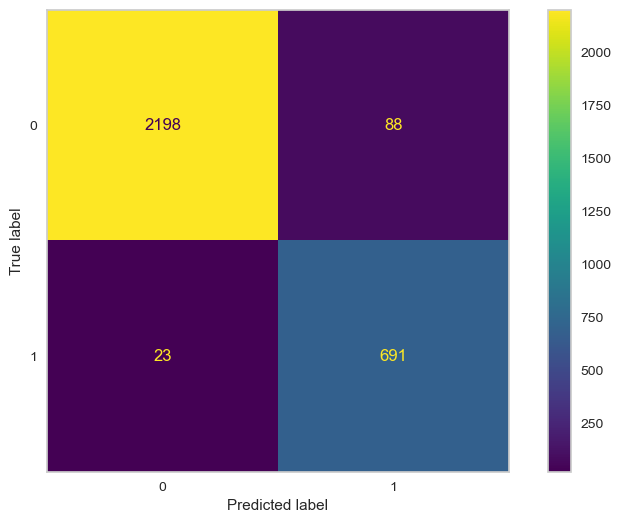




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



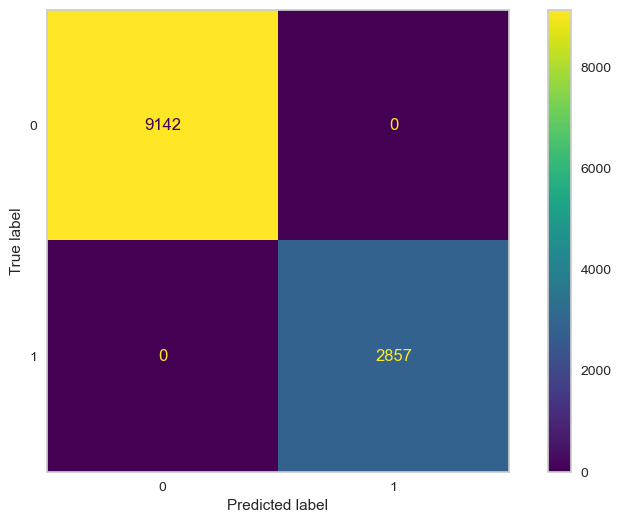

In [163]:
# checking the evaluation metrics of grid model

eval_metric(KNN_grid_model, X_train, y_train, X_test, y_test)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

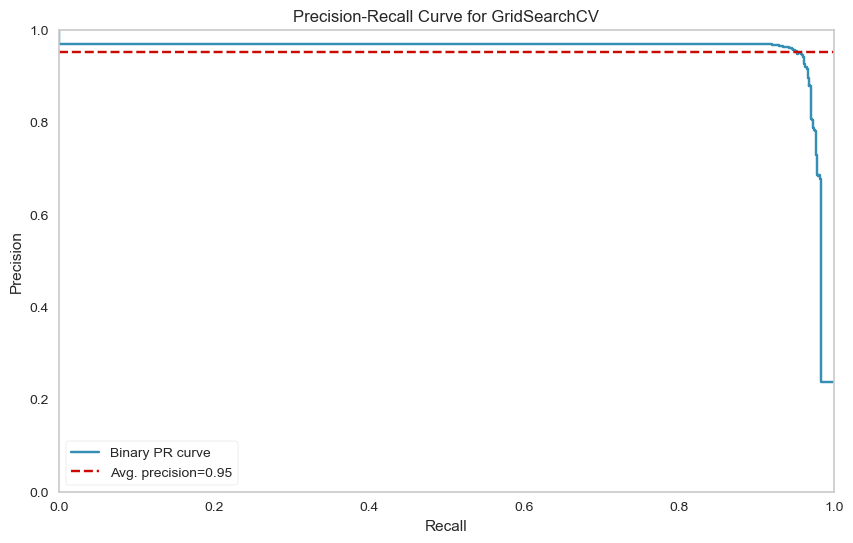

In [164]:
# Plot precision recall curve
from yellowbrick.classifier import PrecisionRecallCurve

model=KNN_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

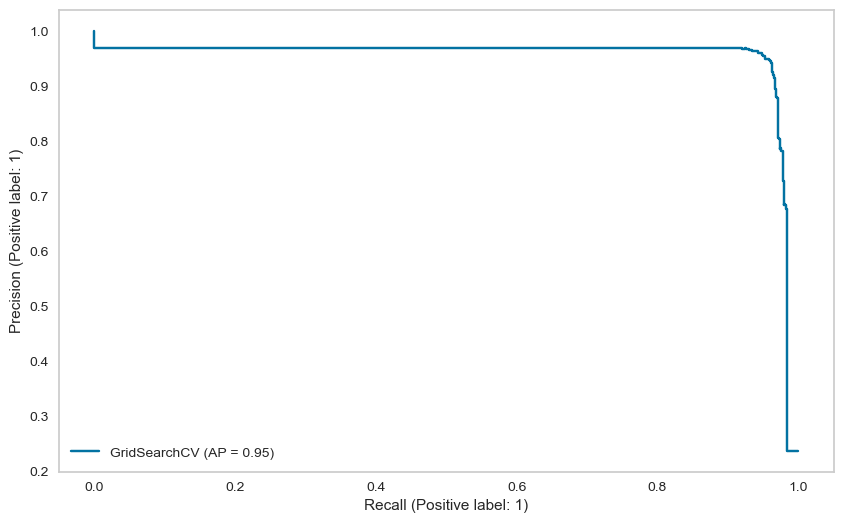

In [165]:
plot_precision_recall_curve(KNN_grid_model, X_test, y_test);

#### Prediction

In [166]:
# predict on train and test data

y_pred_test = KNN_pipe_model.predict(X_test)
y_pred_train = KNN_pipe_model.predict(X_train)

In [167]:
# define model comparison variables

KNN_AP = viz.score_ # AP: average precision

KNN_f1_test = f1_score(y_test, y_pred_test)
KNN_f1_train = f1_score(y_train, y_pred_train)

KNN_recall_test = recall_score(y_test, y_pred_test)
KNN_recall_train = recall_score(y_train, y_pred_train)

KNN_AP, KNN_f1_test, KNN_f1_train, KNN_recall_test, KNN_recall_train

(0.9524317859306327,
 0.8855788761002031,
 0.9228659581762084,
 0.9159663865546218,
 0.9422471123556178)

### Random Forest Model - without duplicates

In [168]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [170]:
cat = X_train.select_dtypes("object").columns
cat

Index(['departments', 'salary'], dtype='object')

In [171]:
# defining column transformer object for tree based models without scaling, because these models doesn't need scaling

cat = X_train.select_dtypes("object").columns

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

#### Model Building

In [172]:
# built a pipe model for Random Forest with default hyperparameter

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

RF_pipe_model = Pipeline(steps=operations)

In [173]:
# fit the RF model on train data

RF_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.97      0.98      2399
weighted avg       0.99      0.99      0.99      2399



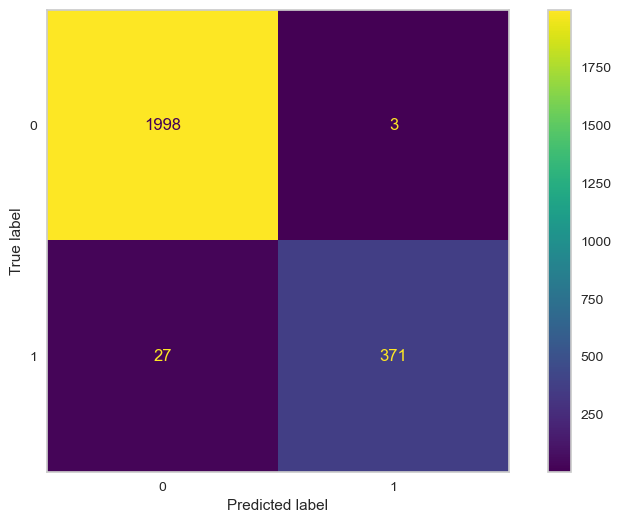




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



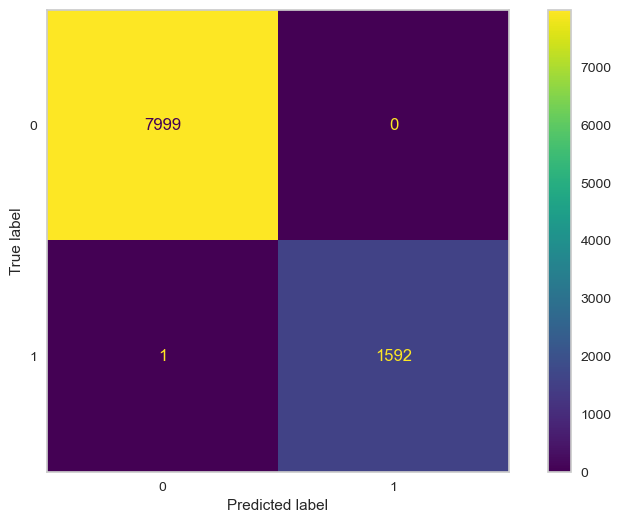

In [174]:
# check the evaluation metrics of RF pipe model

eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test)

#### Random Forest Model Cross Validation

In [176]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.99
train_precision   1.00
test_recall       0.90
train_recall      1.00
test_f1           0.94
train_f1          1.00
test_accuracy     0.98
train_accuracy    1.00
dtype: float64

#### Random Forest Model GridSearchCV

In [177]:
# reset the model
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations)

# define grid parameters
param_grid = {"RF_model__n_estimators":[10, 50, 100],
             "RF_model__criterion":["entropy","gini"],
              "RF_model__max_features":['auto',"log2"],
              "RF_model__max_depth": [5, 10, 15],
             "RF_model__min_samples_split": [2, 5],
             "RF_model__min_samples_leaf" : [1, 5]}

In [178]:
# built RF grid model

RF_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring="f1",
                          cv=5,
                          n_jobs = -1)

In [179]:
# fit he RF grid model on train data

RF_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['departments', 'salary'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['entropy', 'gini'],
                         'RF_model__max_depth': [5, 10, 15],
                         'RF_model__max_features': ['auto', 'log2'],
                         'RF_model__min_samples_leaf': [1, 5],
                         'RF_model__min_samples_split': [2, 5],
                         'RF_model__n_estimators': [10, 50, 100]},
             scoring='f1')

In [180]:
RF_grid_model.best_score_

0.9467454017898683

In [181]:
RF_grid_model.best_params_

{'RF_model__criterion': 'entropy',
 'RF_model__max_depth': 15,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 5,
 'RF_model__n_estimators': 50}

In [182]:
RF_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=15,
                                        max_features='auto',
                                        min_samples_split=5, n_estimators=50,
                                        random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.97      0.98      2399
weighted avg       0.99      0.99      0.99      2399



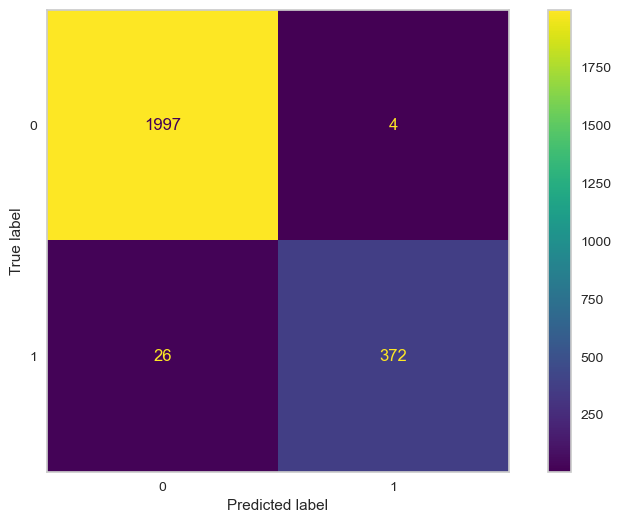




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       0.99      0.98      0.99      1593

    accuracy                           1.00      9592
   macro avg       0.99      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592



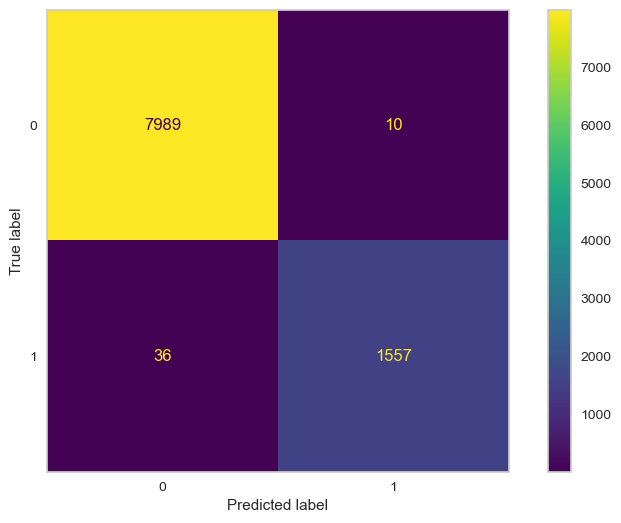

In [183]:
# check the evaluation metrics of RF grid model

eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

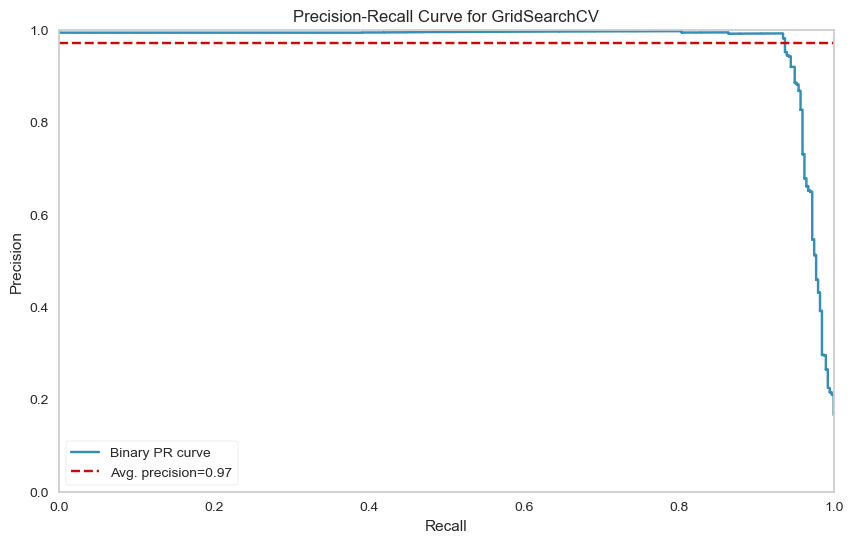

In [184]:
# precision-recall curve for RF grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = RF_grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#### Prediction

In [185]:
# predict on train and test data

y_pred_test = RF_grid_model.predict(X_test)
y_pred_train = RF_grid_model.predict(X_train)

In [186]:
# define model comparison variables

RF_AP = viz.score_
RF_f1_test = f1_score(y_test, y_pred_test)
RF_f1_train = f1_score(y_train, y_pred_train)

RF_recall_test = recall_score(y_test, y_pred_test)
RF_recall_train = recall_score(y_train, y_pred_train)

RF_AP, RF_f1_test, RF_f1_train, RF_recall_test, RF_recall_train

(0.9705084249898855,
 0.9612403100775194,
 0.9854430379746836,
 0.9346733668341709,
 0.9774011299435028)

### Random Forest Model - with duplicates

In [187]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

#### Model Building

In [189]:
# built a pipe model for Random Forest with default hyperparameter

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

RF_pipe_model = Pipeline(steps=operations)

In [190]:
# fit the RF model on train data

RF_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.99      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



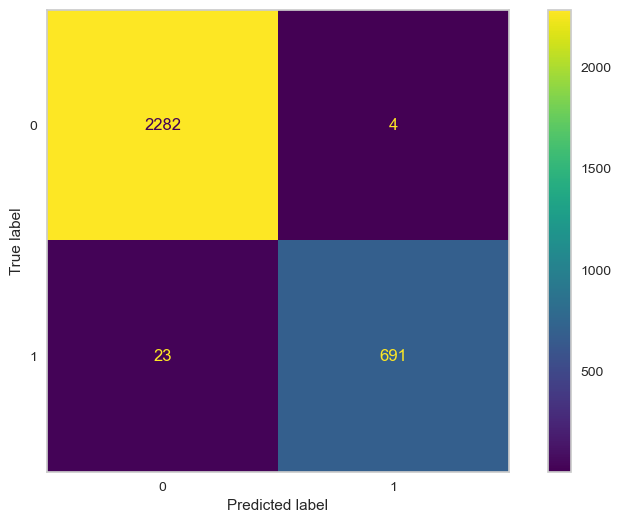




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



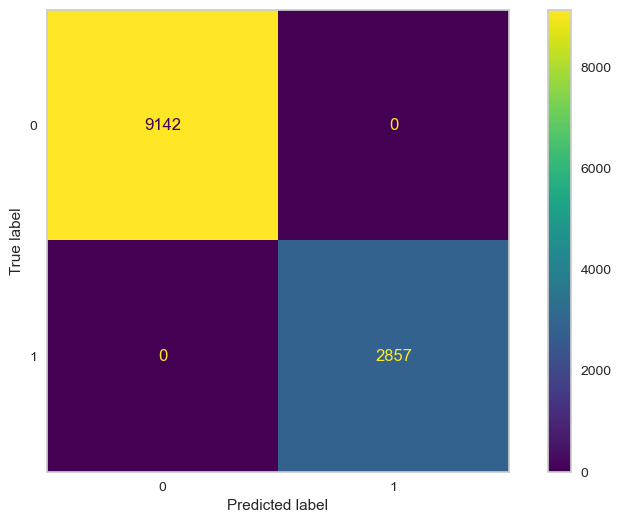

In [191]:
# check the evaluation metrics of RF pipe model

eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test)

#### Random Forest Model Cross Validation

In [193]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.99
train_precision   1.00
test_recall       0.97
train_recall      1.00
test_f1           0.98
train_f1          1.00
test_accuracy     0.99
train_accuracy    1.00
dtype: float64

#### Random Forest Model GridSearchCV

In [194]:
# reset the model
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations)

# define grid parameters
param_grid = {"RF_model__n_estimators":[10, 50, 100],
              "RF_model__max_depth": [2, 5, 7, 10]}

In [195]:
# built RF grid model

RF_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring="f1",
                          cv=5,
                          n_jobs = -1)

In [196]:
# fit he RF grid model on train data

RF_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['departments', 'salary'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 5, 7, 10],
                         'RF_model__n_estimators': [10, 50, 100]},
             scoring='f1')

In [197]:
RF_grid_model.best_score_

0.965886092909706

In [198]:
RF_grid_model.best_params_

{'RF_model__max_depth': 10, 'RF_model__n_estimators': 100}

In [199]:
RF_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2286
           1       0.99      0.95      0.97       714

    accuracy                           0.98      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.99      0.98      0.98      3000



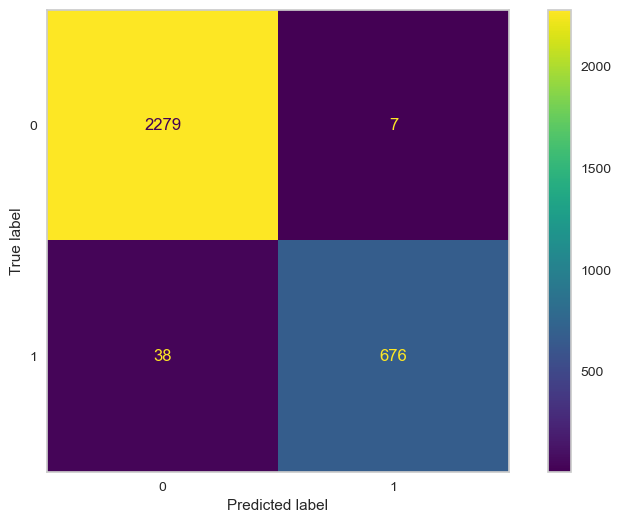




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9142
           1       0.99      0.97      0.98      2857

    accuracy                           0.99     11999
   macro avg       0.99      0.98      0.99     11999
weighted avg       0.99      0.99      0.99     11999



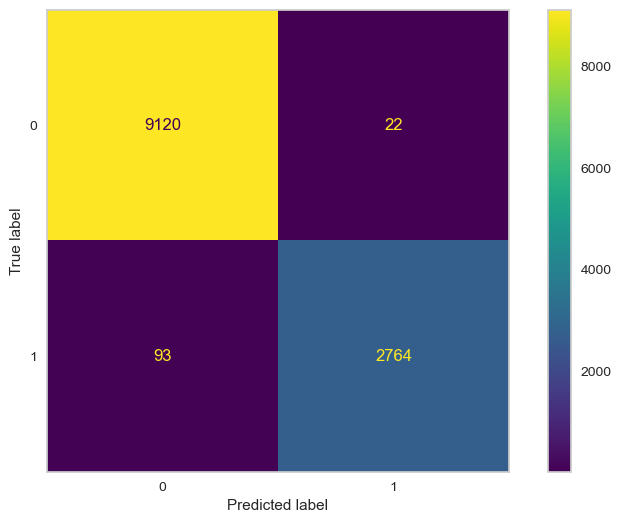

In [200]:
# check the evaluation metrics of RF grid model

eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

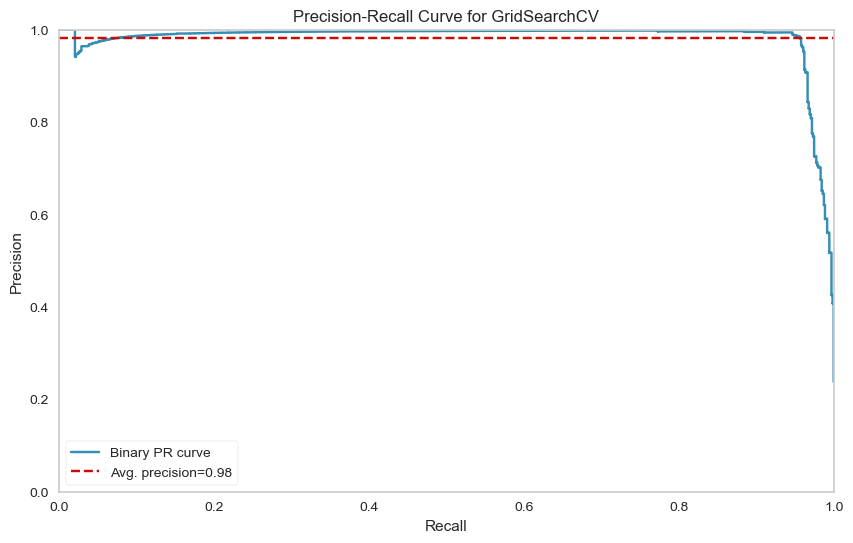

In [201]:
# precision-recall curve for RF grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = RF_grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#### Prediction

In [202]:
# predict on train and test data

y_pred_test = RF_grid_model.predict(X_test)
y_pred_train = RF_grid_model.predict(X_train)

In [203]:
# define model comparison variables

RF_AP = viz.score_
RF_f1_test = f1_score(y_test, y_pred_test)
RF_f1_train = f1_score(y_train, y_pred_train)

RF_recall_test = recall_score(y_test, y_pred_test)
RF_recall_train = recall_score(y_train, y_pred_train)

RF_AP, RF_f1_test, RF_f1_train, RF_recall_test, RF_recall_train

(0.9823648552364261,
 0.9677881173944166,
 0.9796207690944533,
 0.9467787114845938,
 0.9674483724186209)

### XGBoost Classifier - without duplicates

In [204]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [206]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights  # to show all class weights for each instance

array([0.59957495, 3.01067169, 0.59957495, ..., 0.59957495, 0.59957495,
       0.59957495])

#### Model Building

In [207]:
# built XGB pipe model

operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

XGB_pipe_model = Pipeline(steps=operations)

In [208]:
# define class weights in order to use during XGBoost model fit as we have imbalanced data

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique() # to show unique class weights

array([0.59957495, 3.01067169])

In [209]:
# fit the XGB pipe model on train data

XGB_pipe_model.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('XGB_model', XGBClassifier(random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2001
           1       0.86      0.95      0.90       398

    accuracy                           0.97      2399
   macro avg       0.93      0.96      0.94      2399
weighted avg       0.97      0.97      0.97      2399



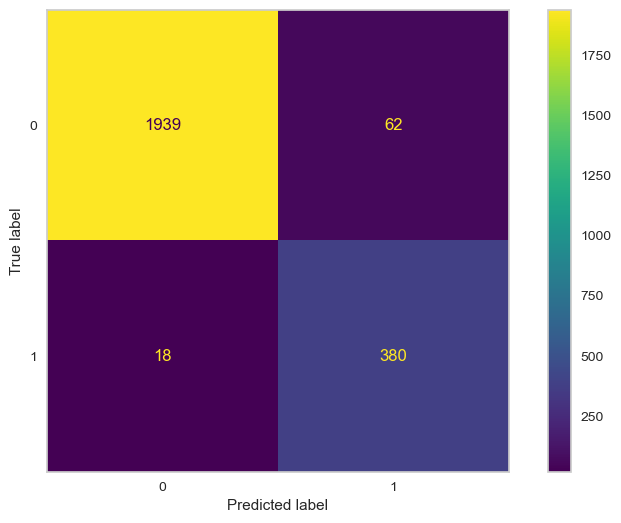




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7999
           1       0.91      0.94      0.92      1593

    accuracy                           0.97      9592
   macro avg       0.95      0.96      0.95      9592
weighted avg       0.97      0.97      0.97      9592



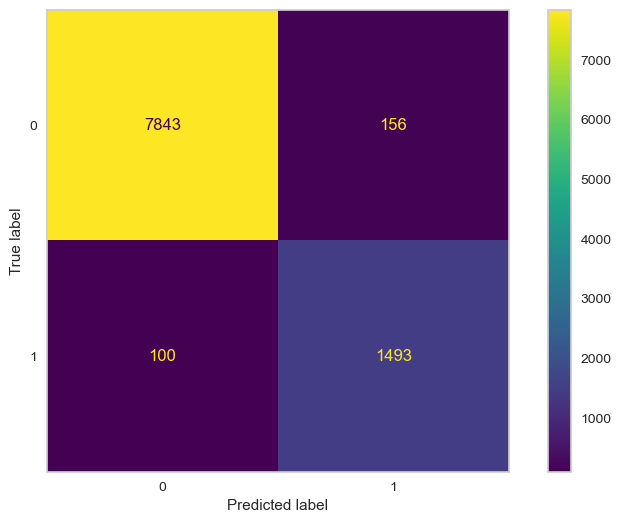

In [210]:
# check the evaluation metrics of XGB pipe model

eval_metric(XGB_pipe_model, X_train, y_train, X_test, y_test)

#### XGB Model Cross Validation

In [212]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10,
                        fit_params={"XGB_model__sample_weight":classes_weights},
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.89
train_precision   0.90
test_recall       0.93
train_recall      0.94
test_f1           0.91
train_f1          0.92
test_accuracy     0.97
train_accuracy    0.97
dtype: float64

#### XGBoost Model GridsearchCV

In [213]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [214]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

XGB_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring="f1", 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [215]:
XGB_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(colsample_bytree=0.8, learning_rate=0.3,
                               max_depth=2, random_state=101))])

In [216]:
XGB_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.3,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 1}

In [217]:
XGB_grid_model.best_score_

0.8937936186592932

TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2001
           1       0.84      0.96      0.90       398

    accuracy                           0.96      2399
   macro avg       0.92      0.96      0.94      2399
weighted avg       0.97      0.96      0.96      2399



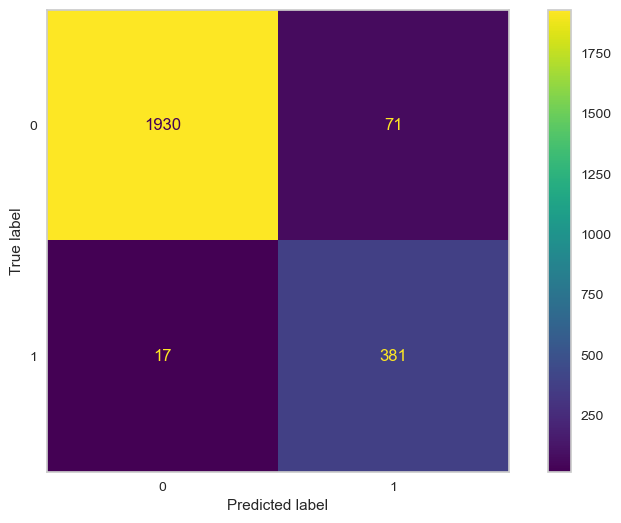




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7999
           1       0.87      0.94      0.91      1593

    accuracy                           0.97      9592
   macro avg       0.93      0.96      0.94      9592
weighted avg       0.97      0.97      0.97      9592



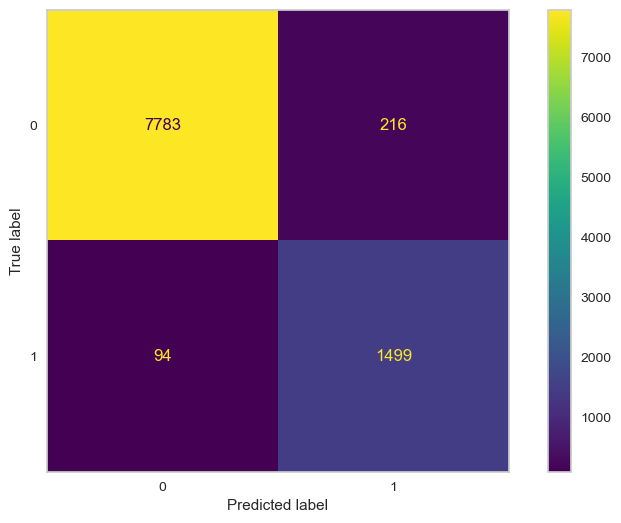

In [218]:
eval_metric(XGB_grid_model, X_train, y_train, X_test, y_test)

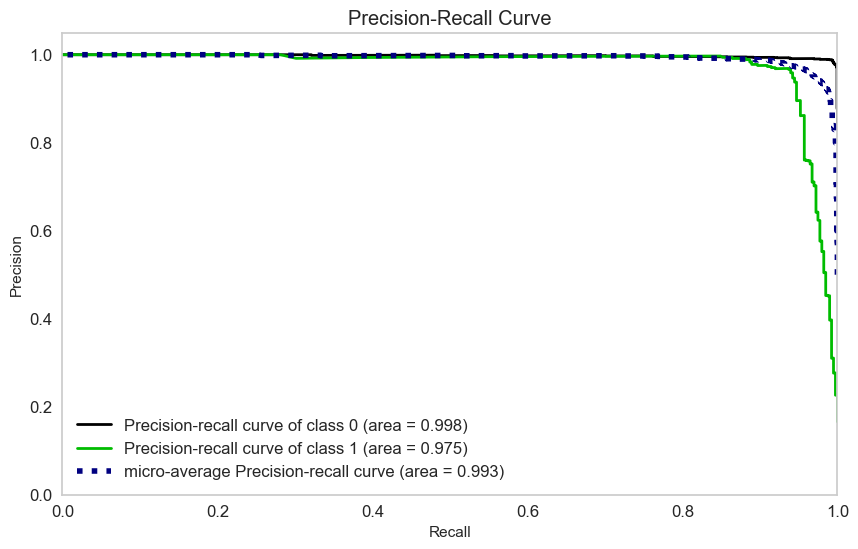

In [219]:
# from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

# operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]




# operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1,
#                             random_state=101, subsample=0.8, n_estimetors=50, colsample_bytree = 0.8))]

# model = Pipeline(steps=operations)

# model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = XGB_grid_model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [220]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.9750333541364945

#### Prediction

In [221]:
# predict on train and test data

y_pred_test = XGB_grid_model.predict(X_test)
y_pred_train = XGB_grid_model.predict(X_train)

In [222]:
XGB_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

XGB_f1_test = f1_score(y_test, y_pred_test)
XGB_f1_train = f1_score(y_train, y_pred_train)

XGB_recall_test = recall_score(y_test, y_pred_test)
XGB_recall_train = recall_score(y_train, y_pred_train)

XGB_AP, XGB_f1_test, XGB_f1_train, XGB_recall_test, XGB_recall_train

(0.9750333541364945,
 0.8964705882352941,
 0.9062877871825877,
 0.957286432160804,
 0.9409918392969241)

### XGBoost Classifier - with duplicates

In [223]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

#### Model Building

In [225]:
# built XGB pipe model

operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

XGB_pipe_model = Pipeline(steps=operations)

In [226]:
# define class weights in order to use during model fit, as we have imbalanced data

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique() # to show unique class weights

array([0.65625684, 2.09993   ])

In [227]:
# fit the XGB pipe model on train data

XGB_pipe_model.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('XGB_model', XGBClassifier(random_state=101))])

#### Evaluating Model Performance and Tuning

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.90      0.95      0.92       714

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



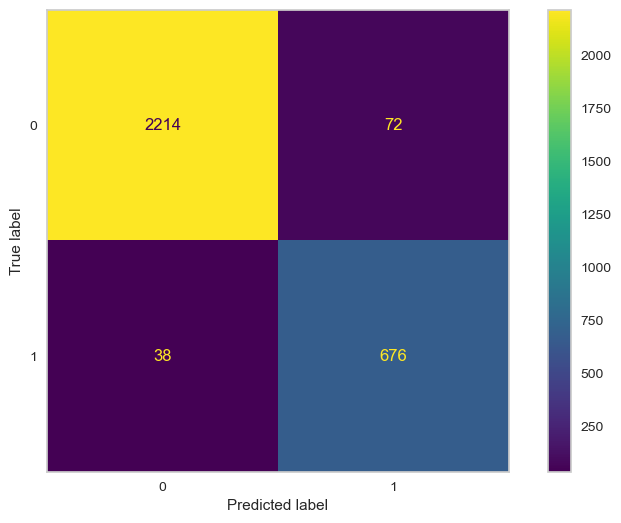




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9142
           1       0.93      0.94      0.93      2857

    accuracy                           0.97     11999
   macro avg       0.96      0.96      0.96     11999
weighted avg       0.97      0.97      0.97     11999



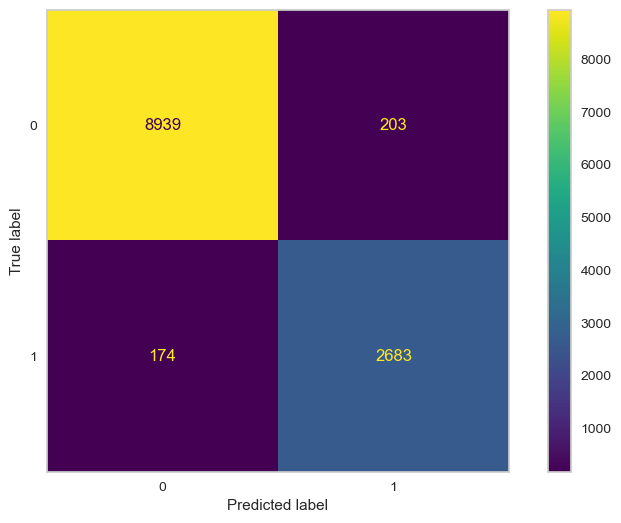

In [228]:
# check the evaluation metrics of XGB pipe model

eval_metric(XGB_pipe_model, X_train, y_train, X_test, y_test)

#### XGB Model Cross Validation

In [229]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10,
                        fit_params={"XGB_model__sample_weight":classes_weights},
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.93
train_precision   0.93
test_recall       0.94
train_recall      0.94
test_f1           0.93
train_f1          0.93
test_accuracy     0.97
train_accuracy    0.97
dtype: float64

#### XGBoost Model GridSearchCV

In [230]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1]}

In [231]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations)

XGB_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring="f1", 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [232]:
XGB_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(learning_rate=0.3, max_depth=2, random_state=101,
                               subsample=0.8))])

In [233]:
XGB_grid_model.best_params_

{'XGB_model__learning_rate': 0.3,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.8}

In [234]:
XGB_grid_model.best_score_

0.9263176519635165

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2286
           1       0.90      0.95      0.92       714

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



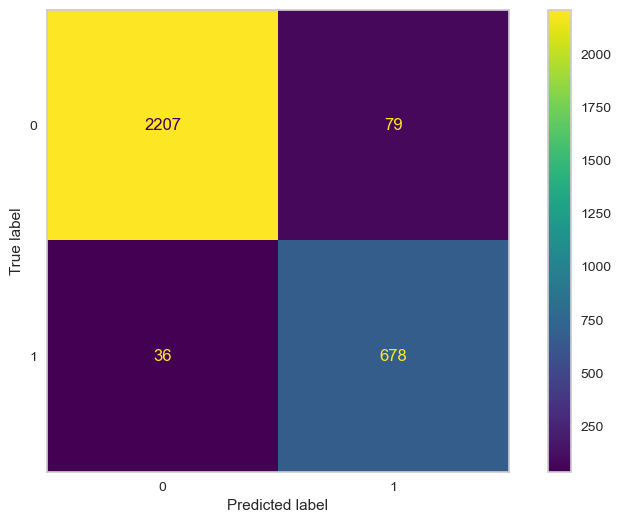




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9142
           1       0.92      0.95      0.93      2857

    accuracy                           0.97     11999
   macro avg       0.95      0.96      0.96     11999
weighted avg       0.97      0.97      0.97     11999



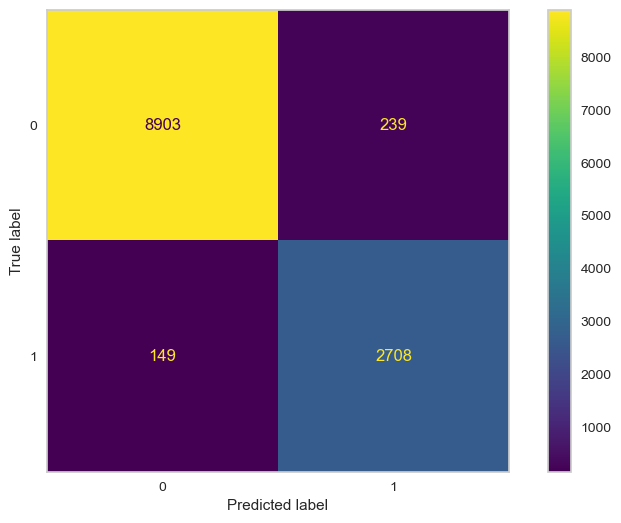

In [235]:
eval_metric(XGB_grid_model, X_train, y_train, X_test, y_test)

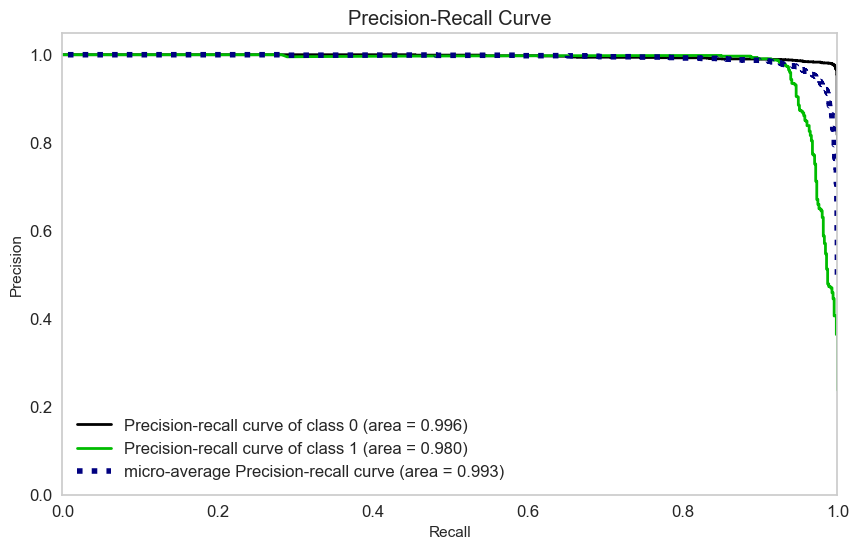

In [236]:
# from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


# operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1,
#                             random_state=101, subsample=0.8, n_estimetors=50, colsample_bytree = 0.8))]

# model = Pipeline(steps=operations)

# model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = XGB_grid_model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [237]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.9803628525921171

#### Prediction

In [238]:
# predict on train and test data

y_pred_test = XGB_grid_model.predict(X_test)
y_pred_train = XGB_grid_model.predict(X_train)

In [239]:
XGB_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

XGB_f1_test = f1_score(y_test, y_pred_test)
XGB_f1_train = f1_score(y_train, y_pred_train)

XGB_recall_test = recall_score(y_test, y_pred_test)
XGB_recall_train = recall_score(y_train, y_pred_train)

XGB_AP, XGB_f1_test, XGB_f1_train, XGB_recall_test, XGB_recall_train

(0.9803628525921171,
 0.9218218898708361,
 0.9331495520330806,
 0.9495798319327731,
 0.9478473923696185)

### ANN Classifier - without duplicates - without pipeline

In [133]:
# df_without_dp = pd.read_csv("df_without_dp.csv")
# df_with_dp = pd.read_csv("df_with_dp.csv")

In [240]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [242]:
# Defining class weights using scikitlaern class_weight method in order to use it in ANN model

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5995749468683585, 1: 3.01067168863779}

In [243]:
# Defining column_trans object that contains  onehot encoder and ordinal encoder

onehot_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((onehot_enc, ["departments"]), (ordinal_enc, ["salary"]), remainder= "passthrough")

# Defining scaler object
scaler = StandardScaler()

In [244]:
# import librraries that necessary for ANN model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#### Layer Architecture Building and Compiling without pipeline

In [245]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [246]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [266]:
# seed = 101

# tf.random.set_seed(seed)
tf.keras.backend.clear_session() # to reset session

model = Sequential()

model.add(Dense(26, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(14, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [267]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [268]:
%%time
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=64,
          epochs=100,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/100
135/135 [==============================] - 1s 4ms/step - loss: 0.6513 - recall: 0.7584 - val_loss: 0.6839 - val_recall: 0.9091
Epoch 2/100
135/135 [==============================] - 0s 3ms/step - loss: 0.5660 - recall: 0.7927 - val_loss: 0.5479 - val_recall: 0.8606
Epoch 3/100
135/135 [==============================] - 0s 3ms/step - loss: 0.4599 - recall: 0.8137 - val_loss: 0.3709 - val_recall: 0.8788
Epoch 4/100
135/135 [==============================] - 0s 3ms/step - loss: 0.3912 - recall: 0.8277 - val_loss: 0.3313 - val_recall: 0.9091
Epoch 5/100
135/135 [==============================] - 0s 2ms/step - loss: 0.3573 - recall: 0.8487 - val_loss: 0.2992 - val_recall: 0.9091
Epoch 6/100
135/135 [==============================] - 0s 3ms/step - loss: 0.3300 - recall: 0.8662 - val_loss: 0.2557 - val_recall: 0.9091
Epoch 7/100
135/135 [==============================] - 0s 3ms/step - loss: 0.3081 - recall: 0.8831 - val_loss: 0.2616 - val_recall: 0.9091
Epoch 8/100
135/135 [======

In [269]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                494       
                                                                 
 dropout (Dropout)           (None, 26)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                378       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 90        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7

In [270]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
19  0.23    0.90      0.20        0.90
20  0.23    0.91      0.19        0.90
21  0.23    0.90      0.19        0.91
22  0.22    0.91      0.19        0.90
23  0.23    0.91      0.19        0.89

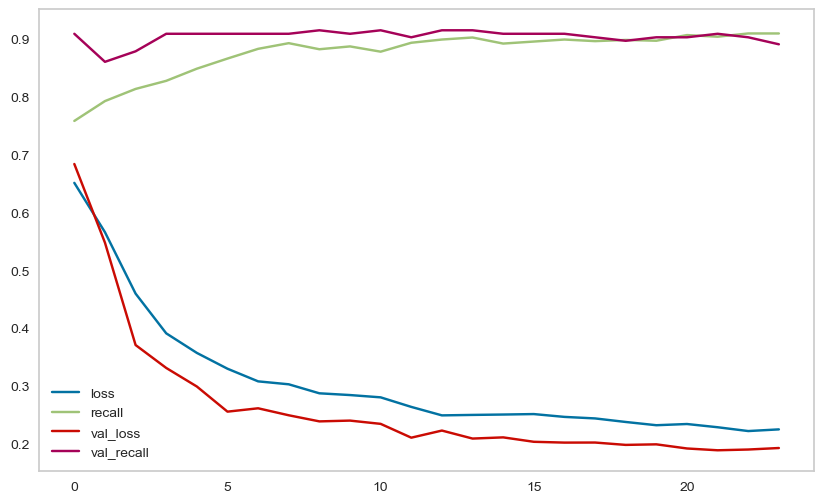

In [271]:
loss_df.plot();

#### Evaluating Model Performance and Tunning

In [272]:
# define a function to compare evaluation metrics of ANN models

def eval_metric_ann(model, X_train, y_train, X_test, y_test):
    y_pred_test = model.predict(X_test) > 0.5 
    y_pred_train = model.predict(X_train) > 0.5
    
    print("TEST REPORT")
#     print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred_test))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show();

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
#     print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred_train))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show();

In [273]:
model.evaluate(X_test, y_test, verbose=0)

[0.1864566057920456, 0.9246231317520142]

In [274]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.1864566057920456
recall :  0.9246231317520142


300/300 [==============================] - 0s 1ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.84      0.92      0.88       398

    accuracy                           0.96      2399
   macro avg       0.91      0.94      0.93      2399
weighted avg       0.96      0.96      0.96      2399



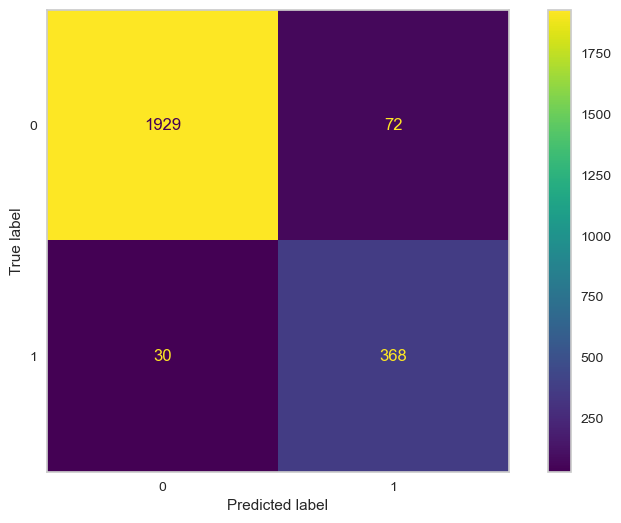




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7999
           1       0.86      0.92      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.92      0.94      0.93      9592
weighted avg       0.96      0.96      0.96      9592



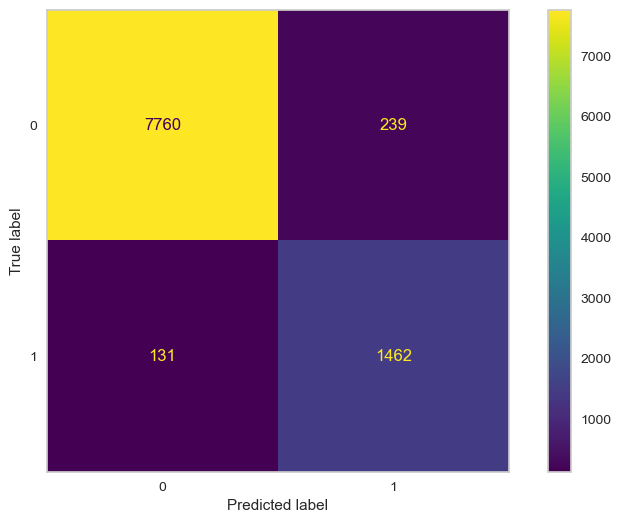

In [275]:
eval_metric_ann(model, X_train, y_train, X_test, y_test)

#### ANN Model Cross Validation

In [276]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [299]:
def build_classifier_for_CV(input_dim):
    input_dim=input_dim
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [300]:
%%time
classifier_model = KerasClassifier(build_fn = lambda: build_classifier_for_CV(input_dim=18),
                                   batch_size = 64,
                                   epochs = 100,
                                   verbose=0,
                                   class_weight = class_weights)

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10,
                       return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

270/270 [==============================] - 0s 1ms/step
CPU times: total: 1min 24s
Wall time: 5min 24s


test_accuracy  train_accuracy  test_precision  train_precision  \
1            0.97            0.97            0.90             0.92   
2            0.97            0.97            0.92             0.90   
3            0.97            0.97            0.89             0.90   
4            0.96            0.97            0.87             0.91   
5            0.97            0.97            0.90             0.92   
6            0.96            0.97            0.83             0.90   
7            0.96            0.97            0.89             0.91   
8            0.97            0.97            0.88             0.89   
9            0.96            0.97            0.87             0.91   
10           0.96            0.97            0.86             0.92   

    test_recall  train_recall  test_f1  train_f1  
1          0.91          0.92     0.90      0.92  
2          0.88          0.93     0.90      0.91  
3          0.90          0.94     0.90      0.92  
4          0.93          0.93     0.90      0.92  
5          0.94          0.92     0.92      0.92  
6          0.91          0.93     0.87      0.91  
7          0.89          0.93     0.89      0.92  
8          0.92          0.93     0.90      0.91  
9          0.90          0.92     0.88      0.91  
10         0.89          0.92     0.88      0.92

In [302]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc_test", "acc_train", "pre_test", "pre_train", "rec_test", "rec_train", "f1_test", "f1_train"])

df_scores_summary

score_mean  score_std
acc_test         0.96       0.01
acc_train        0.97       0.00
pre_test         0.88       0.03
pre_train        0.91       0.01
rec_test         0.91       0.02
rec_train        0.93       0.01
f1_test          0.89       0.02
f1_train         0.92       0.00

#### ANN Model GridSearchCV

In [307]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [308]:
# defining a model function for GridSearchCV

def build_classifier_for_GSCV(optimizer, learn_rate):
    
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [309]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [310]:
%%time
classifier_model = KerasClassifier(build_fn = build_classifier_for_GSCV,
                                   validation_split = 0.1,
                                   epochs = 100,
                                   class_weight = class_weights)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 0)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Epoch 1/100
135/135 [==============================] - 1s 4ms/step - loss: 0.6859 - recall: 0.4832 - val_loss: 0.6432 - val_recall: 0.8000
Epoch 2/100
135/135 [==============================] - 0s 3ms/step - loss: 0.5963 - recall: 0.7101 - val_loss: 0.4671 - val_recall: 0.8424
Epoch 3/100
135/135 [==============================] - 0s 3ms/step - loss: 0.4880 - recall: 0.8004 - val_loss: 0.3889 - val_recall: 0.9212
Epoch 4/100
135/135 [==============================] - 0s 3ms/step - loss: 0.4360 - recall: 0.8578 - val_loss: 0.3486 - val_recall: 0.9273
Epoch 5/100
135/135 [==============================] - 0s 3ms/step - loss: 0.3785 - recall: 0.8761 - val_loss: 0.3119 - val_recall: 0.9455
Epoch 6/100
135/135 [==============================] - 0s 3ms/step - loss: 0.3751 - recall: 0.8739 - val_loss: 0.2844 - val_recall: 0.9273
Epoch 7/100
135/135 [==============================] - 0s 2ms/step - loss: 0.3464 - recall: 0.8754 - val_loss: 0.2846 - val_recall: 0.9394
Epoch 8/100
135/135 [======

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000028362152A60>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>]},
             scoring='recall')

In [311]:
grid_model.best_score_

0.9159284782820469

In [312]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [313]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
9              0.92            0.02                1   
0              0.91            0.01                2   
6              0.91            0.02                3   
15             0.91            0.02                4   
3              0.91            0.02                5   
12             0.91            0.02                6   
10             0.91            0.02                7   
13             0.90            0.02                8   
16             0.90            0.02                9   
1              0.90            0.02               10   
4              0.90            0.02               11   
7              0.90            0.03               12   
17             0.55            0.25               13   
2              0.52            0.28               14   
5              0.46            0.31               15   
14             0.39            0.32               16   
11             0.36            0.29               17   
8              0.31            0.28               18   

                                               params  
9   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
0   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
6   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
15  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
3   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
12  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
10  {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
13  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
16  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
1   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
4   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
7   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
17  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
2   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
5   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
14  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
11  {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
8   {'batch_size': 32, 'learn_rate': 0.005, 'optim...

300/300 [==============================] - 0s 1ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2001
           1       0.82      0.93      0.87       398

    accuracy                           0.95      2399
   macro avg       0.90      0.94      0.92      2399
weighted avg       0.96      0.95      0.96      2399



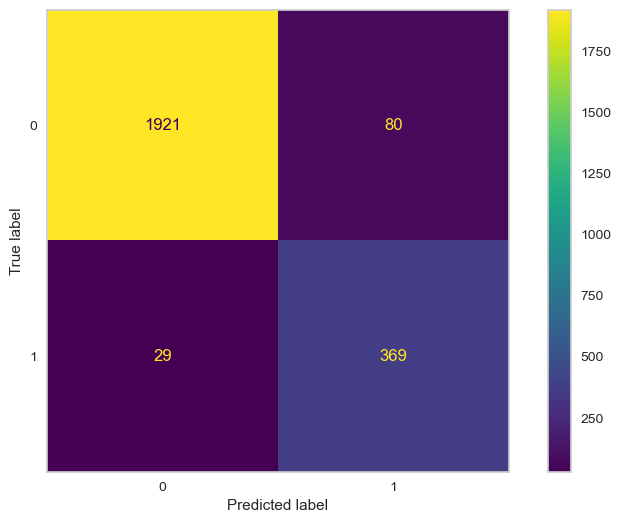




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7999
           1       0.84      0.92      0.88      1593

    accuracy                           0.96      9592
   macro avg       0.91      0.94      0.92      9592
weighted avg       0.96      0.96      0.96      9592



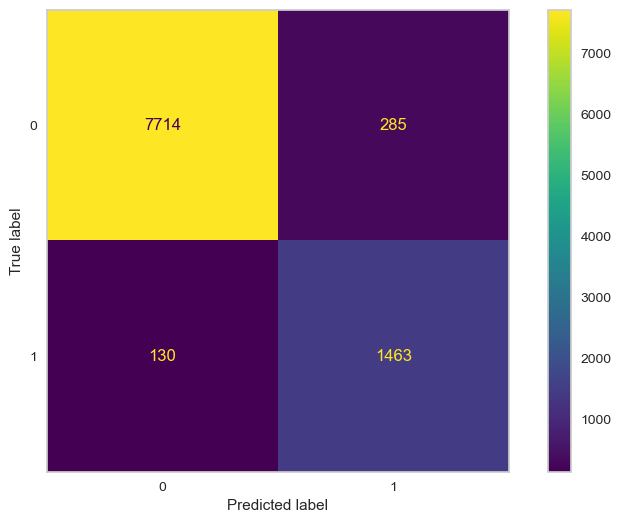

In [314]:
eval_metric_ann(grid_model, X_train, y_train, X_test, y_test)

75/75 [==============================] - 0s 1ms/step


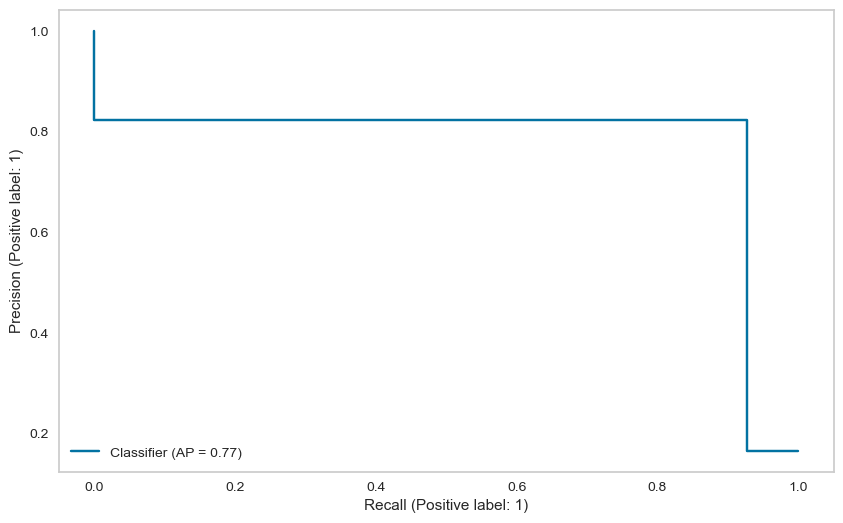

In [315]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = grid_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [316]:
average_precision_score(y_test, y_pred_proba)

0.7740328363605408

#### Prediction

In [317]:
# predict on train and test data

y_pred_test = grid_model.predict(X_test)
y_pred_train = grid_model.predict(X_train)

300/300 [==============================] - 0s 1ms/step


In [318]:
ANN_AP = average_precision_score(y_test, y_pred_proba)

ANN_f1_test = f1_score(y_test, y_pred_test)
ANN_f1_train = f1_score(y_train, y_pred_train)

ANN_recall_test = recall_score(y_test, y_pred_test)
ANN_recall_train = recall_score(y_train, y_pred_train)

ANN_AP, ANN_f1_test, ANN_f1_train, ANN_recall_test, ANN_recall_train

(0.7740328363605408,
 0.8713105076741439,
 0.8757856929063156,
 0.9271356783919598,
 0.9183929692404269)

### ANN Classifier - with duplicates - without pipeline

In [319]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

#### Layer Architecture Building and Compiling without pipeline

In [321]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [322]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [326]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session() # to reset session

model = Sequential()

model.add(Dense(26, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(14, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [327]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [328]:
%%time
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=64,
          epochs=100,
          verbose=1,
          class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/100
169/169 [==============================] - 1s 3ms/step - loss: 0.7487 - recall: 0.8695 - val_loss: 0.6621 - val_recall: 0.9477
Epoch 2/100
169/169 [==============================] - 0s 2ms/step - loss: 0.5727 - recall: 0.8730 - val_loss: 0.4712 - val_recall: 0.9575
Epoch 3/100
169/169 [==============================] - 0s 3ms/step - loss: 0.4797 - recall: 0.9094 - val_loss: 0.3848 - val_recall: 0.9477
Epoch 4/100
169/169 [==============================] - 0s 3ms/step - loss: 0.4144 - recall: 0.9110 - val_loss: 0.3392 - val_recall: 0.9412
Epoch 5/100
169/169 [==============================] - 1s 3ms/step - loss: 0.3749 - recall: 0.9126 - val_loss: 0.2859 - val_recall: 0.9281
Epoch 6/100
169/169 [==============================] - 0s 3ms/step - loss: 0.3490 - recall: 0.9192 - val_loss: 0.2792 - val_recall: 0.9216
Epoch 7/100
169/169 [==============================] - 1s 3ms/step - loss: 0.3293 - recall: 0.9173 - val_loss: 0.2704 - val_recall: 0.9183
Epoch 8/100
169/169 [======

In [329]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
7   0.32    0.92      0.24        0.92
8   0.31    0.92      0.24        0.92
9   0.29    0.92      0.23        0.92
10  0.29    0.92      0.24        0.92
11  0.30    0.92      0.23        0.92

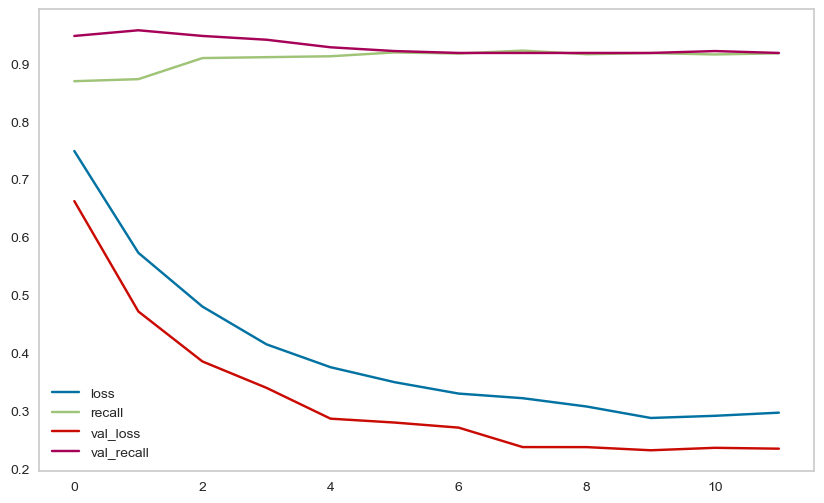

In [330]:
loss_df.plot();

#### Evaluating Model Performance and Tunning

In [331]:
model.evaluate(X_test, y_test, verbose=0)

[0.22522403299808502, 0.9355742335319519]

In [332]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.22522403299808502
recall :  0.9355742335319519


375/375 [==============================] - 1s 1ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2286
           1       0.81      0.94      0.87       714

    accuracy                           0.93      3000
   macro avg       0.89      0.93      0.91      3000
weighted avg       0.94      0.93      0.93      3000



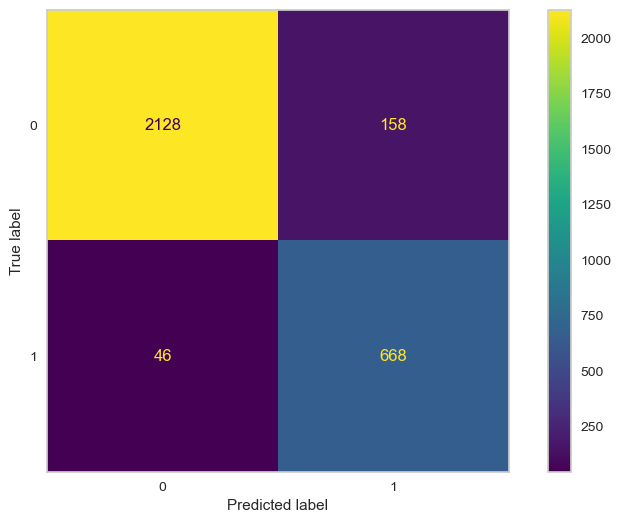




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      9142
           1       0.82      0.93      0.87      2857

    accuracy                           0.93     11999
   macro avg       0.90      0.93      0.91     11999
weighted avg       0.94      0.93      0.94     11999



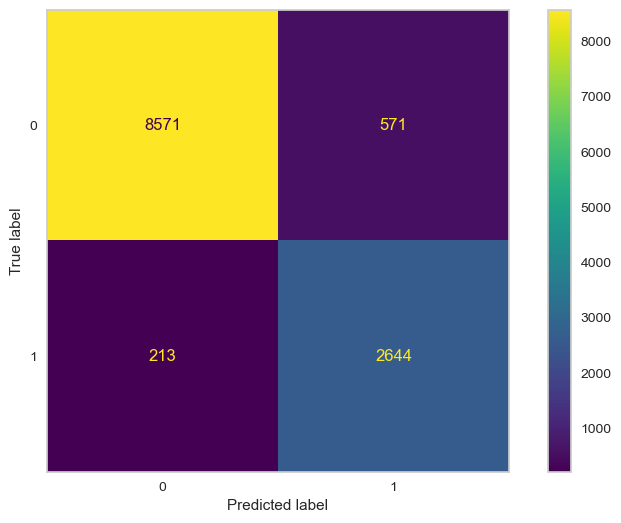

In [333]:
eval_metric_ann(model, X_train, y_train, X_test, y_test)

94/94 [==============================] - 0s 1ms/step


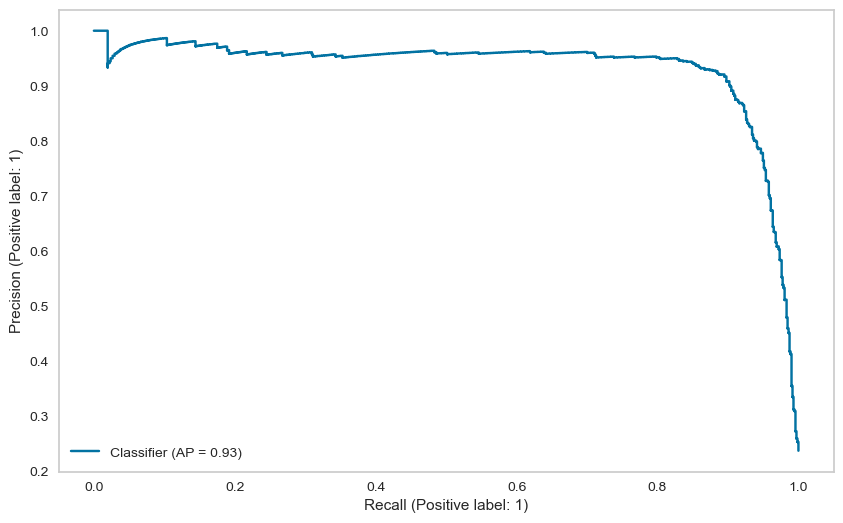

In [334]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

#### ANN Model Cross Validation

In [335]:
def build_classifier_for_CV(input_dim):
    input_dim=input_dim
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
        
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [336]:
%%time
classifier_model = KerasClassifier(build_fn = lambda: build_classifier_for_CV(input_dim=18),
                                   batch_size = 64,
                                   epochs = 100,
                                   verbose=0,
                                   class_weight = class_weights)

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10,
                       return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

338/338 [==============================] - 1s 1ms/step
CPU times: total: 1min 44s
Wall time: 6min 58s


test_accuracy  train_accuracy  test_precision  train_precision  \
1            0.97            0.97            0.94             0.93   
2            0.96            0.97            0.91             0.94   
3            0.97            0.97            0.92             0.92   
4            0.96            0.97            0.88             0.92   
5            0.96            0.97            0.93             0.94   
6            0.97            0.97            0.93             0.92   
7            0.96            0.97            0.88             0.92   
8            0.95            0.97            0.89             0.91   
9            0.96            0.97            0.89             0.91   
10           0.96            0.96            0.93             0.90   

    test_recall  train_recall  test_f1  train_f1  
1          0.94          0.94     0.94      0.93  
2          0.93          0.94     0.92      0.94  
3          0.93          0.94     0.93      0.93  
4          0.93          0.94     0.91      0.93  
5          0.90          0.94     0.91      0.94  
6          0.93          0.94     0.93      0.93  
7          0.95          0.95     0.92      0.93  
8          0.92          0.95     0.91      0.93  
9          0.93          0.95     0.91      0.93  
10         0.93          0.95     0.93      0.93

In [337]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc_test", "acc_train", "pre_test", "pre_train", "rec_test", "rec_train", "f1_test", "f1_train"])

df_scores_summary

score_mean  score_std
acc_test         0.96       0.01
acc_train        0.97       0.00
pre_test         0.91       0.02
pre_train        0.92       0.01
rec_test         0.93       0.01
rec_train        0.94       0.01
f1_test          0.92       0.01
f1_train         0.93       0.00

#### ANN Model GridSearchCV

In [338]:
# defining a model function for GridSearchCV

def build_classifier_for_GSCV(optimizer, learn_rate):
    
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [339]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [340]:
%%time
classifier_model = KerasClassifier(build_fn = build_classifier_for_GSCV,
                                   validation_split = 0.1,
                                   epochs = 100,
                                   class_weight = class_weights)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 0)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Epoch 1/100
338/338 [==============================] - 2s 3ms/step - loss: 0.7038 - recall: 0.8624 - val_loss: 0.5876 - val_recall: 0.9477
Epoch 2/100
338/338 [==============================] - 1s 3ms/step - loss: 0.5050 - recall: 0.8742 - val_loss: 0.4077 - val_recall: 0.9444
Epoch 3/100
338/338 [==============================] - 1s 3ms/step - loss: 0.4151 - recall: 0.8902 - val_loss: 0.3517 - val_recall: 0.9412
Epoch 4/100
338/338 [==============================] - 1s 3ms/step - loss: 0.3749 - recall: 0.9000 - val_loss: 0.3004 - val_recall: 0.9281
Epoch 5/100
338/338 [==============================] - 1s 3ms/step - loss: 0.3504 - recall: 0.9047 - val_loss: 0.2714 - val_recall: 0.9150
Epoch 6/100
338/338 [==============================] - 1s 3ms/step - loss: 0.3225 - recall: 0.9087 - val_loss: 0.2557 - val_recall: 0.9183
Epoch 7/100
338/338 [==============================] - 1s 3ms/step - loss: 0.3209 - recall: 0.9051 - val_loss: 0.2514 - val_recall: 0.9118
Epoch 8/100
338/338 [======

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000028360C9D460>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>]},
             scoring='recall')

In [341]:
grid_model.best_score_

0.9251973641831442

In [342]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [343]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
0              0.93            0.01                1   
10             0.92            0.01                2   
6              0.92            0.01                3   
2              0.92            0.01                4   
8              0.92            0.01                5   
9              0.92            0.01                6   
4              0.92            0.02                7   
1              0.92            0.02                8   
7              0.92            0.01                9   
3              0.92            0.01               10   
5              0.91            0.02               11   
11             0.91            0.01               12   

                                               params  
0   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
10  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
6   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
2   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
8   {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
9   {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
4   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
1   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
7   {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
3   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
5   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
11  {'batch_size': 64, 'learn_rate': 0.005, 'optim...

375/375 [==============================] - 1s 1ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.85      0.93      0.89       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.93      3000
weighted avg       0.95      0.94      0.94      3000



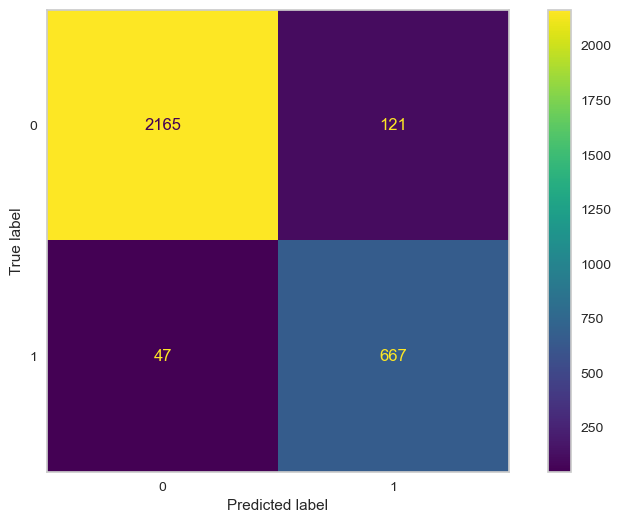




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9142
           1       0.87      0.93      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.93      0.94      0.93     11999
weighted avg       0.95      0.95      0.95     11999



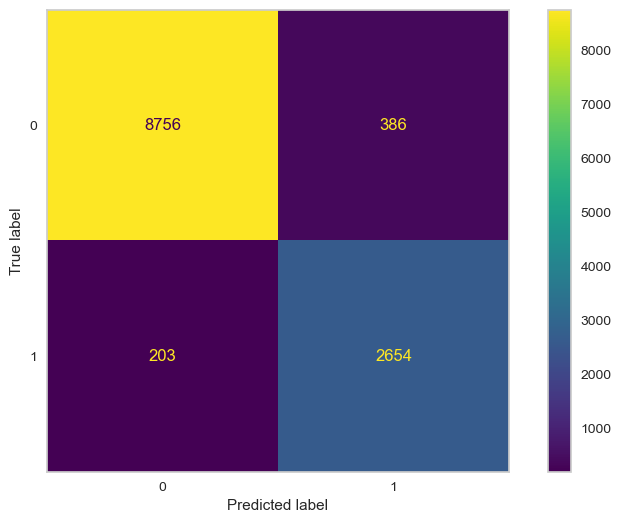

In [344]:
eval_metric_ann(grid_model, X_train, y_train, X_test, y_test)

94/94 [==============================] - 0s 1ms/step


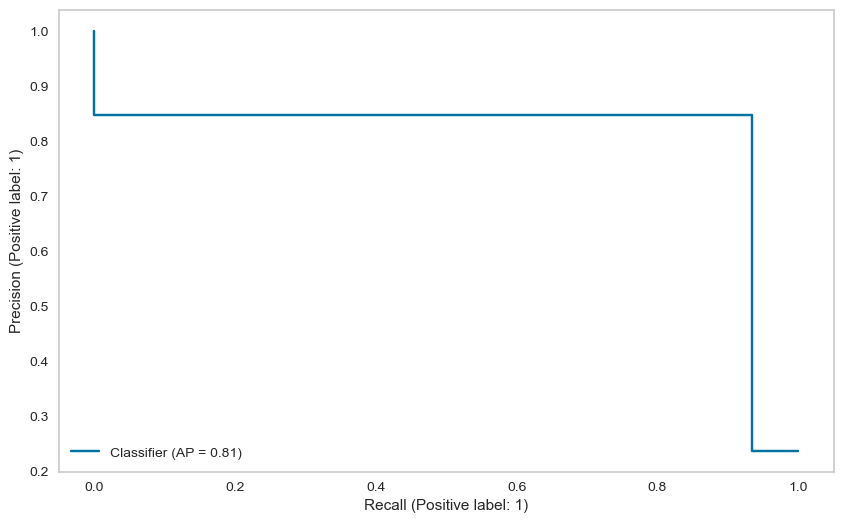

In [345]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = grid_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [346]:
average_precision_score(y_test, y_pred_proba)

0.8063948868887656

#### Prediction

In [347]:
# predict on train and test data

y_pred_test = grid_model.predict(X_test)
y_pred_train = grid_model.predict(X_train)

375/375 [==============================] - 1s 1ms/step


In [348]:
ANN_AP = average_precision_score(y_test, y_pred_proba)

ANN_f1_test = f1_score(y_test, y_pred_test)
ANN_f1_train = f1_score(y_train, y_pred_train)

ANN_recall_test = recall_score(y_test, y_pred_test)
ANN_recall_train = recall_score(y_train, y_pred_train)

ANN_AP, ANN_f1_test, ANN_f1_train, ANN_recall_test, ANN_recall_train

(0.8063948868887656,
 0.8881491344873502,
 0.9001187044259793,
 0.9341736694677871,
 0.9289464473223661)

### ANN Classifier with Pipeline - without duplicates

In [349]:
X = df_without_dp.drop(columns="left")
y = df_without_dp.left

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [351]:
# Defining a function for ANN model creation - way 1

def create_ann_model(input_dim):
    input_dim = input_dim
    import tensorflow as tf
    from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
#     from keras.optimizers import Adam, Nadam, RMSprop, Nadam
    tf.keras.backend.clear_session()
    tf.random.set_seed(101)
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim = input_dim))
    classifier.add(Dropout(0.2))
    
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = Adam(0.001), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [352]:
# Defining a function for ANN model creation - way 2

def create_ann_model(input_dim):
    input_dim = input_dim
    
    import tensorflow as tf
    from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
            
    model = Sequential()
    model.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 14, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 6, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 1, activation = 'sigmoid'))
       
    model.compile(optimizer = Adam(0.001), loss = 'binary_crossentropy', metrics = ['Recall'])
    return model

In [353]:
model = create_ann_model(input_dim=18)

operations = [("Encoder", column_trans), ("Scaler", scaler), ("ANN_model", model)]

ANN_pipe_model = Pipeline(steps=operations)

In [354]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", 
                           verbose = 1, patience = 3, restore_best_weights=True)

In [355]:
%%time
ANN_pipe_model.fit(X_train, y_train,
                   ANN_model__validation_split = 0.1,
                   ANN_model__batch_size = 64,
                   ANN_model__epochs = 100,
#                    ANN_model__verbose = 1,
                   ANN_model__callbacks = [early_stop],
                   ANN_model__class_weight=class_weights)

Epoch 1/100
135/135 [==============================] - 1s 5ms/step - loss: 0.7054 - recall: 0.5819 - val_loss: 0.6452 - val_recall: 0.8909
Epoch 2/100
135/135 [==============================] - 0s 3ms/step - loss: 0.5874 - recall: 0.7983 - val_loss: 0.4735 - val_recall: 0.8667
Epoch 3/100
135/135 [==============================] - 0s 3ms/step - loss: 0.4835 - recall: 0.8466 - val_loss: 0.3748 - val_recall: 0.9091
Epoch 4/100
135/135 [==============================] - 0s 3ms/step - loss: 0.4334 - recall: 0.8564 - val_loss: 0.3455 - val_recall: 0.9394
Epoch 5/100
135/135 [==============================] - 0s 3ms/step - loss: 0.3803 - recall: 0.8845 - val_loss: 0.3087 - val_recall: 0.9515
Epoch 6/100
135/135 [==============================] - 0s 3ms/step - loss: 0.3752 - recall: 0.8782 - val_loss: 0.2768 - val_recall: 0.9455
Epoch 7/100
135/135 [==============================] - 0s 3ms/step - loss: 0.3462 - recall: 0.8845 - val_loss: 0.2848 - val_recall: 0.9515
Epoch 8/100
135/135 [======

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('ANN_model',
                 <keras.engine.sequential.Sequential object at 0x000002836514D040>)])

In [356]:
ANN_pipe_model["ANN_model"].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                494       
                                                                 
 dropout (Dropout)           (None, 26)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                378       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 90        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7

In [357]:
loss_df = pd.DataFrame(ANN_pipe_model["ANN_model"].history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
15  0.26    0.90      0.21        0.92
16  0.25    0.91      0.20        0.92
17  0.26    0.89      0.21        0.92
18  0.25    0.90      0.20        0.92
19  0.24    0.91      0.20        0.92

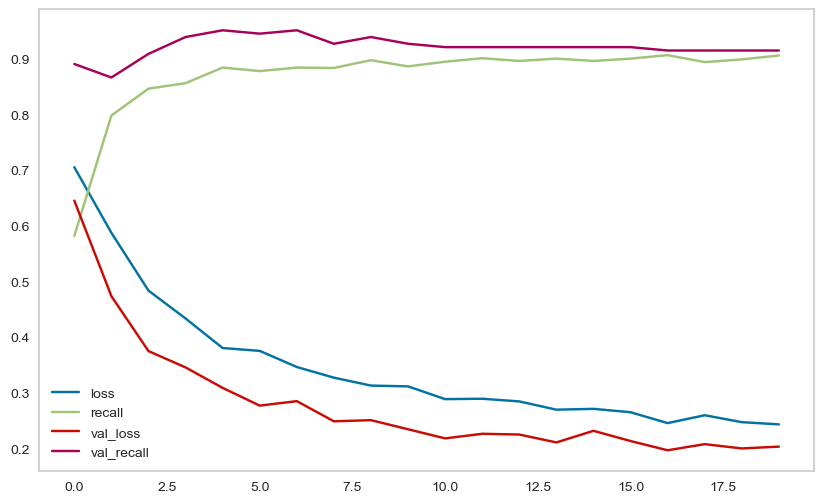

In [358]:
loss_df.plot();

#### Evaluating Model Performance and Tunning

In [359]:
ANN_pipe_model["ANN_model"].evaluate(scaler.transform(column_trans.transform(X_test)), y_test, verbose=0)  # Eğer pipeline modeli oluşturduysanız model.evaluate() metodu içine encoder ve scaler işlemleri uygulanmış veri girilmelidir.

[0.1998477578163147, 0.9246231317520142]

In [360]:
loss, recall = model.evaluate(scaler.transform(column_trans.transform(X_test)), y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.1998477578163147
recall :  0.9246231317520142


In [361]:
print("Test result :", ANN_pipe_model[-1].evaluate((ANN_pipe_model[:-1].transform(X_test)), y_test, verbose=0, return_dict=1),
      "Train result :", ANN_pipe_model[-1].evaluate((ANN_pipe_model[:-1].transform(X_train)), y_train, verbose=0, return_dict=1), sep='\n')

Test result :
{'loss': 0.1998477578163147, 'recall': 0.9246231317520142}
Train result :
{'loss': 0.18072201311588287, 'recall': 0.9221594333648682}


300/300 [==============================] - 0s 1ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2001
           1       0.78      0.92      0.85       398

    accuracy                           0.94      2399
   macro avg       0.88      0.94      0.91      2399
weighted avg       0.95      0.94      0.95      2399



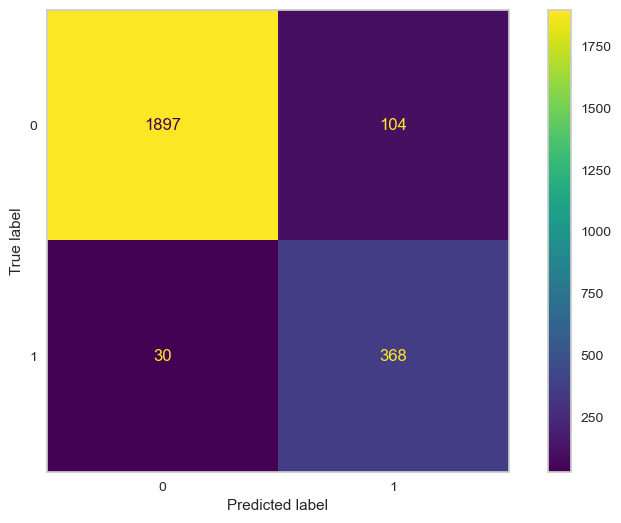




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7999
           1       0.80      0.92      0.85      1593

    accuracy                           0.95      9592
   macro avg       0.89      0.94      0.91      9592
weighted avg       0.95      0.95      0.95      9592



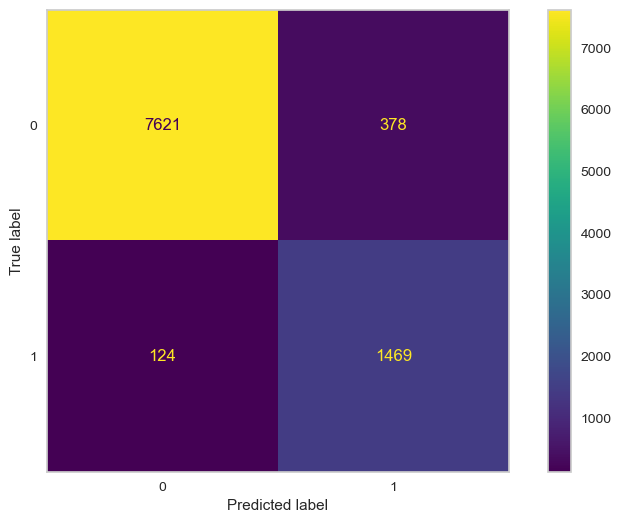

In [362]:
eval_metric_ann(ANN_pipe_model, X_train, y_train, X_test, y_test)

75/75 [==============================] - 0s 1ms/step


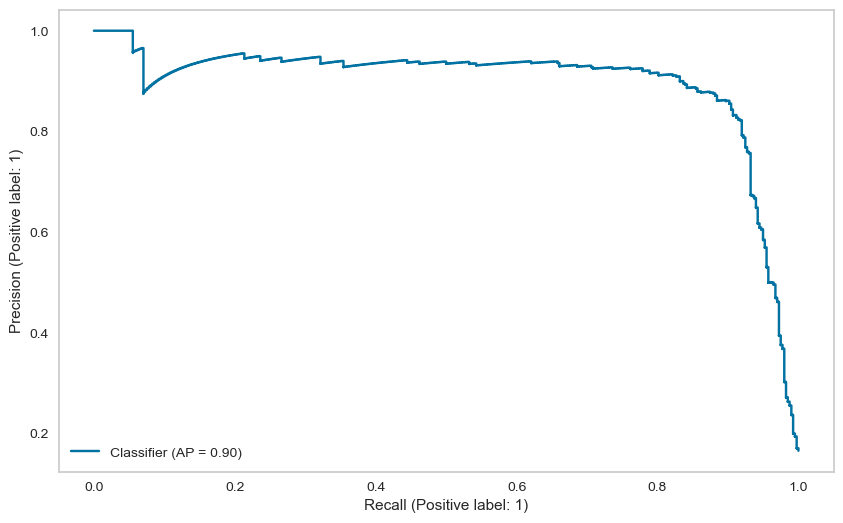

In [363]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = ANN_pipe_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
# As we get greater eval metric with data contains duplicates, we will not implement cross validation and grid search here.

### ANN Classifier with Pipeline - with duplicates

In [364]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [366]:
# Defining a function for ANN model creation

def create_ann_model(input_dim):
    input_dim = input_dim
    
#     import tensorflow as tf
    from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
            
    model = Sequential()
    model.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 14, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 6, activation = 'relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    model.compile(optimizer = Adam(0.001), loss = 'binary_crossentropy', metrics = ['Recall'])
    return model

In [367]:
model = create_ann_model(input_dim=18)

operations = [("Encoder", column_trans), ("Scaler", scaler), ("ANN_model", model)]

ANN_pipe_model = Pipeline(steps=operations) 

In [368]:
early_stop = EarlyStopping(monitor='val_loss', mode="min", 
                           verbose = 1, patience = 3, restore_best_weights=True)

In [369]:
%%time
ANN_pipe_model.fit(X_train, y_train,
                   ANN_model__validation_split = 0.1,
                   ANN_model__batch_size = 64,
                   ANN_model__epochs = 100,
#                    ANN_model__verbose = 1,
                   ANN_model__callbacks = [early_stop],
                   ANN_model__class_weight=class_weights)

Epoch 1/100
169/169 [==============================] - 1s 4ms/step - loss: 0.7712 - recall: 0.7444 - val_loss: 0.6975 - val_recall: 0.9346
Epoch 2/100
169/169 [==============================] - 0s 3ms/step - loss: 0.6437 - recall: 0.8412 - val_loss: 0.5687 - val_recall: 0.9314
Epoch 3/100
169/169 [==============================] - 0s 3ms/step - loss: 0.5395 - recall: 0.8655 - val_loss: 0.4905 - val_recall: 0.9379
Epoch 4/100
169/169 [==============================] - 0s 3ms/step - loss: 0.4706 - recall: 0.8910 - val_loss: 0.4211 - val_recall: 0.9412
Epoch 5/100
169/169 [==============================] - 0s 3ms/step - loss: 0.4260 - recall: 0.9008 - val_loss: 0.3540 - val_recall: 0.9412
Epoch 6/100
169/169 [==============================] - 1s 3ms/step - loss: 0.3934 - recall: 0.9130 - val_loss: 0.3306 - val_recall: 0.9314
Epoch 7/100
169/169 [==============================] - 0s 3ms/step - loss: 0.3666 - recall: 0.9165 - val_loss: 0.2926 - val_recall: 0.9281
Epoch 8/100
169/169 [======

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['salary'])])),
                ('Scaler', StandardScaler()),
                ('ANN_model',
                 <keras.engine.sequential.Sequential object at 0x000002836796A130>)])

In [370]:
ANN_pipe_model["ANN_model"].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                494       
                                                                 
 dropout (Dropout)           (None, 26)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                378       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 90        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7

In [371]:
loss_df = pd.DataFrame(ANN_pipe_model["ANN_model"].history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
19  0.27    0.93      0.21        0.93
20  0.26    0.94      0.20        0.92
21  0.26    0.93      0.22        0.93
22  0.26    0.93      0.23        0.93
23  0.25    0.94      0.21        0.93

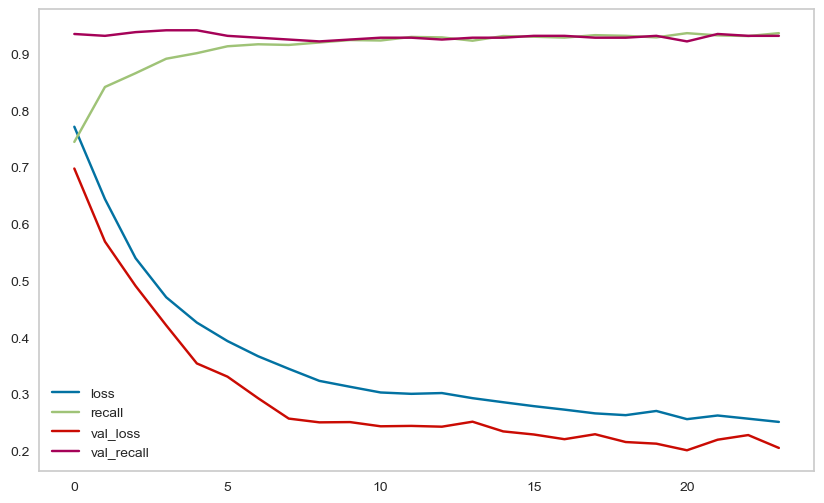

In [372]:
loss_df.plot();

#### Evaluating Model Performance and Tunning

In [373]:
ANN_pipe_model["ANN_model"].evaluate(scaler.transform(column_trans.transform(X_test)), y_test, verbose=0)  # Eğer pipeline modeli oluşturduysanız model.evaluate() metodu içine encoder ve scaler işlemleri uygulanmış veri girilmelidir.

[0.20197704434394836, 0.9425770044326782]

In [374]:
loss, recall = model.evaluate(scaler.transform(column_trans.transform(X_test)), y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.20197704434394836
recall :  0.9425770044326782


375/375 [==============================] - 1s 2ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2286
           1       0.84      0.94      0.89       714

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.95      0.94      0.94      3000



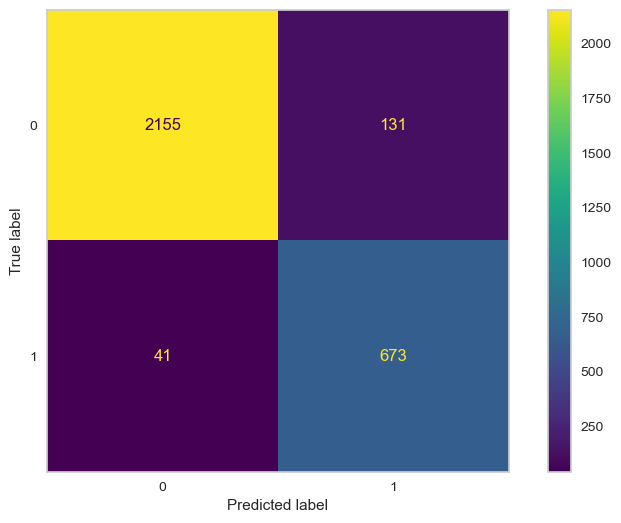




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      9142
           1       0.85      0.94      0.89      2857

    accuracy                           0.95     11999
   macro avg       0.92      0.94      0.93     11999
weighted avg       0.95      0.95      0.95     11999



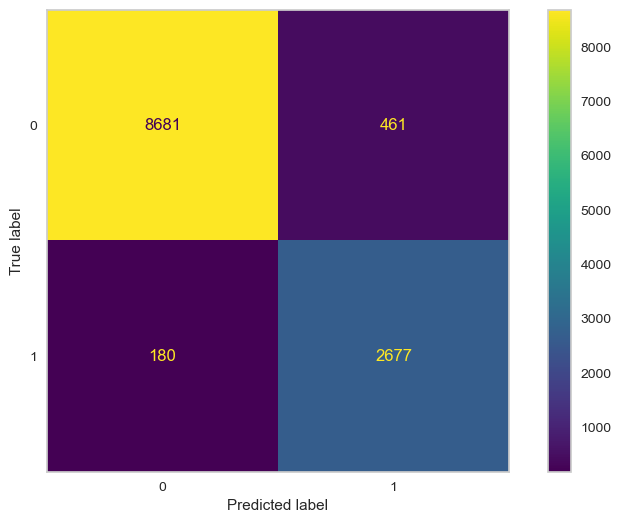

In [375]:
eval_metric_ann(ANN_pipe_model, X_train, y_train, X_test, y_test)

94/94 [==============================] - 0s 1ms/step


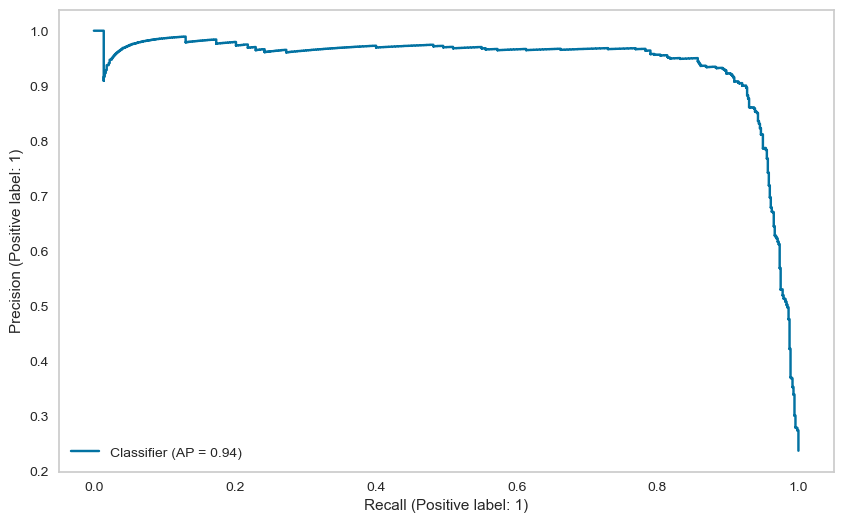

In [376]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = ANN_pipe_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

#### ANN Pipe Model Cross Validation

In [377]:
def build_classifier_for_CV(input_dim):
    
    tf.keras.backend.clear_session()
    input_dim=input_dim
    tf.random.set_seed(seed)
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))

    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [378]:
# !pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier

classifier_model = KerasClassifier(build_fn = lambda: build_classifier_for_CV(input_dim=18),
                             validation_split = 0.1,
                             batch_size = 64,
                             epochs = 100,
                             verbose=1,
                             callbacks = [early_stop], class_weight = class_weights,
)

operations = [("Encoder", column_trans), ("Scaler", scaler), ("ANN_model", classifier_model)]

ANN_pipe_CV = Pipeline(steps=operations)


scores = cross_validate(ANN_pipe_CV, X_train, y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'],
                        return_train_score=True,
                        error_score="raise",
                        n_jobs=-1,
                        cv=10)  # fit_params={"ann__sample_weight":sample_weight}


df_scores = pd.DataFrame.from_dict(scores, orient='columns')

df_scores.mean()[2:]

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpxrjrn5ug\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpk4vo1si8\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmptd6z14su\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpqselcqsx\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpwdc7p26u\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpp0y_4wsp\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp60sxbbim\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpnli48u_b\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpa9jhd7fi\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmp89fjyhdx\assets
INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmpfeubdsm1\assets
INFO:tensorflow:Assets written to: C:\Users

test_accuracy     0.95
train_accuracy    0.95
test_precision    0.86
train_precision   0.87
test_recall       0.93
train_recall      0.94
test_f1           0.89
train_f1          0.90
dtype: float64

#### ANN Pipe Model GridSearchCV

In [379]:
# defining a model function for GridSearchCV

def build_classifier_for_GSCV(input_dim):
    input_dim= input_dim
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = Adam(0.001), loss = 'binary_crossentropy', weighted_metrics = ['Recall'])
    return classifier

In [380]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [381]:
%%time
classifier_model = KerasClassifier(build_fn = lambda: build_classifier_for_GSCV(input_dim=18) ,
                                   validation_split = 0.1,
                                   batch_size = 64,
                                   epochs = 100,
                                   callbacks = [early_stop],
                                   class_weight = class_weights)


operations = [("Encoder", column_trans), ("Scaler", scaler), ("ANN_model", classifier_model)]

ANN_pipe_GSCV = Pipeline(steps=operations)


parameters = {'ANN_model__batch_size': [32, 64],
              'ANN_model__optimizer': ["Adam", "RMSprop"],  # "Adadelta", "Nadam"
              'ANN_model__optimizer__learning_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = ANN_pipe_GSCV,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 0)

grid_model.fit(X_train, y_train)

Epoch 1/100
338/338 [==============================] - 2s 4ms/step - loss: 0.6966 - recall: 0.8111 - val_loss: 0.5072 - val_recall: 0.9346
Epoch 2/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4922 - recall: 0.8828 - val_loss: 0.3786 - val_recall: 0.9477
Epoch 3/100
338/338 [==============================] - 1s 3ms/step - loss: 0.3891 - recall: 0.9091 - val_loss: 0.3223 - val_recall: 0.9379
Epoch 4/100
338/338 [==============================] - 1s 3ms/step - loss: 0.3544 - recall: 0.9177 - val_loss: 0.2896 - val_recall: 0.9314
Epoch 5/100
338/338 [==============================] - 1s 3ms/step - loss: 0.3278 - recall: 0.9177 - val_loss: 0.2748 - val_recall: 0.9248
Epoch 6/100
338/338 [==============================] - 1s 3ms/step - loss: 0.2994 - recall: 0.9196 - val_loss: 0.2637 - val_recall: 0.9281
Epoch 7/100
338/338 [==============================] - 1s 3ms/step - loss: 0.2933 - recall: 0.9232 - val_loss: 0.2571 - val_recall: 0.9216
Epoch 8/100
338/338 [======

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('ANN_model',
                                        KerasClass...00002836669D4C0>, callbacks=[<keras.callbacks.EarlyStopping object at 0x00000283755EB7C0>], class_weight={0: 0.5995749468683585, 1: 3.01067168863779}, epochs=100, validation_split=0.1))]),
             n_jobs=-1,
             param_grid={'ANN_model__batch_size': [32, 64],
                         'ANN_model__optimizer': ['Adam', 'RMSprop'],
                         'ANN_model__optimizer__learning_rate': [0.001, 0.003,
                                                                 0.005]},
             scoring='recall')

In [382]:
grid_model.best_score_

0.9300049073733285

In [383]:
grid_model.best_params_

{'ANN_model__batch_size': 32,
 'ANN_model__optimizer': 'Adam',
 'ANN_model__optimizer__learning_rate': 0.003}

In [384]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
1              0.93            0.01                1   
3              0.93            0.01                2   
8              0.93            0.01                3   
2              0.93            0.01                4   
7              0.93            0.01                5   
6              0.93            0.01                6   
11             0.93            0.01                7   
0              0.93            0.01                8   
4              0.93            0.02                9   
5              0.93            0.01               10   
10             0.93            0.01               11   
9              0.92            0.01               12   

                                               params  
1   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
3   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
8   {'ANN_model__batch_size': 64, 'ANN_model__opti...  
2   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
7   {'ANN_model__batch_size': 64, 'ANN_model__opti...  
6   {'ANN_model__batch_size': 64, 'ANN_model__opti...  
11  {'ANN_model__batch_size': 64, 'ANN_model__opti...  
0   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
4   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
5   {'ANN_model__batch_size': 32, 'ANN_model__opti...  
10  {'ANN_model__batch_size': 64, 'ANN_model__opti...  
9   {'ANN_model__batch_size': 64, 'ANN_model__opti...

375/375 [==============================] - 1s 2ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2286
           1       0.87      0.94      0.90       714

    accuracy                           0.95      3000
   macro avg       0.92      0.95      0.94      3000
weighted avg       0.95      0.95      0.95      3000



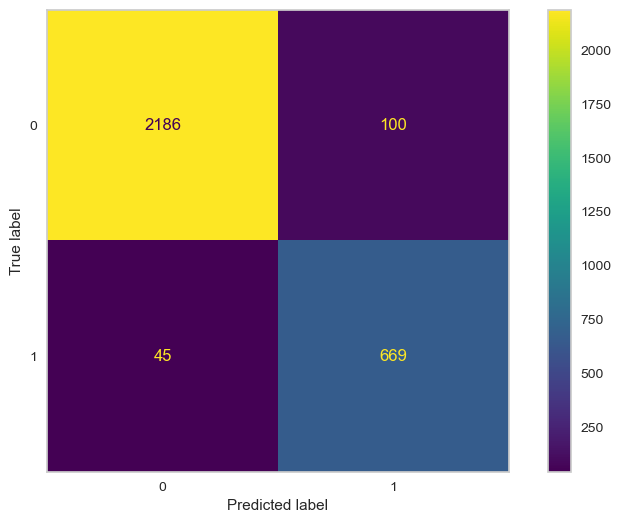




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9142
           1       0.89      0.93      0.91      2857

    accuracy                           0.96     11999
   macro avg       0.94      0.95      0.94     11999
weighted avg       0.96      0.96      0.96     11999



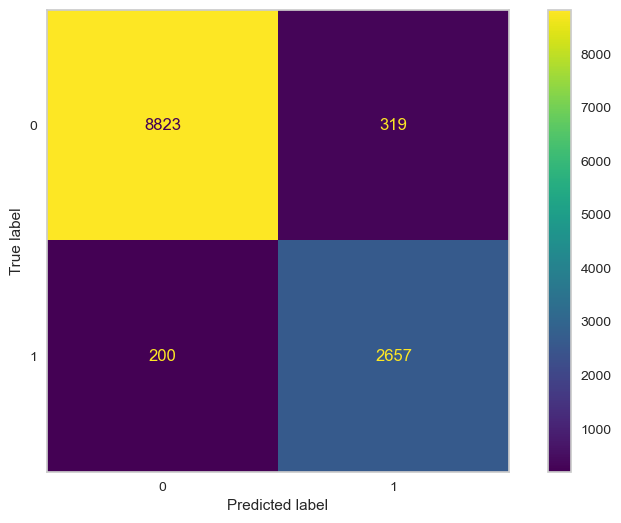

In [385]:
eval_metric_ann(grid_model, X_train, y_train, X_test, y_test)

94/94 [==============================] - 0s 1ms/step


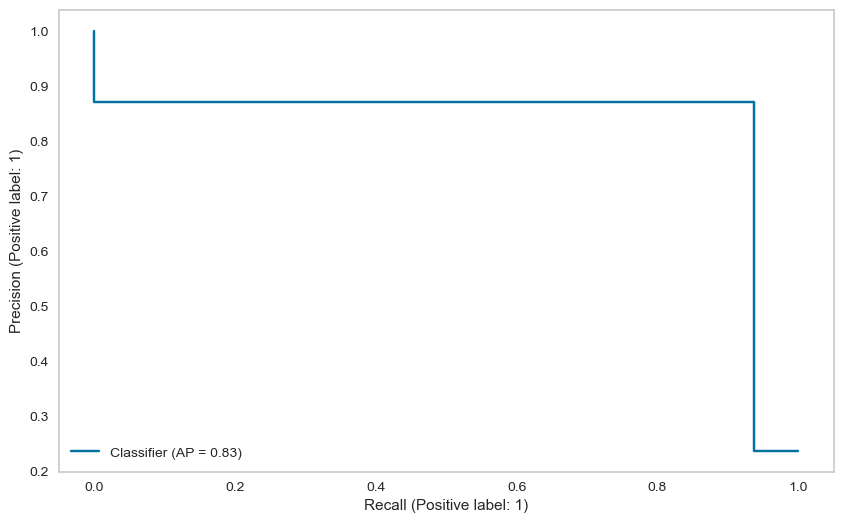

In [386]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = grid_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [387]:
average_precision_score(y_test, y_pred_proba)

0.8301315142441892

#### ANN Pipe Model GridSearchCV

In [388]:
# defining a model function for GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

def build_classifier_for_GSCV(input_dim, optimizer, learn_rate):
#     input_dim= input_dim
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu', input_dim=input_dim))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 14, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', weighted_metrics = ['Recall'])
    return classifier

In [389]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 2, restore_best_weights = True)

In [390]:
%%time

classifier_model = KerasClassifier(model = build_classifier_for_GSCV ,
                                   input_dim= 18,
                                   validation_split = 0.1,
                                   epochs = 100,
                                   callbacks = [early_stop],
                                   class_weight = class_weights)


operations = [("Encoder", column_trans), ("Scaler", scaler), ("ANN_model", classifier_model)]

ANN_pipe_GSCV = Pipeline(steps=operations)


parameters = {'ANN_model__batch_size': [32, 64],
              'ANN_model__model__optimizer': [Adam, RMSprop],  # "Adadelta", "Nadam"
              'ANN_model__model__learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = ANN_pipe_GSCV,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 0)

grid_model.fit(X_train, y_train)

Epoch 1/100
338/338 [==============================] - 3s 4ms/step - loss: 0.7960 - recall: 0.6903 - val_loss: 0.7069 - val_recall: 0.9542
Epoch 2/100
338/338 [==============================] - 1s 3ms/step - loss: 0.5835 - recall: 0.8891 - val_loss: 0.4847 - val_recall: 0.9510
Epoch 3/100
338/338 [==============================] - 1s 2ms/step - loss: 0.4605 - recall: 0.9247 - val_loss: 0.3951 - val_recall: 0.9510
Epoch 4/100
338/338 [==============================] - 1s 3ms/step - loss: 0.4041 - recall: 0.9334 - val_loss: 0.3423 - val_recall: 0.9477
Epoch 5/100
338/338 [==============================] - 1s 3ms/step - loss: 0.3692 - recall: 0.9314 - val_loss: 0.3057 - val_recall: 0.9379
Epoch 6/100
338/338 [==============================] - 1s 3ms/step - loss: 0.3302 - recall: 0.9341 - val_loss: 0.2894 - val_recall: 0.9412
Epoch 7/100
338/338 [==============================] - 1s 3ms/step - loss: 0.3157 - recall: 0.9334 - val_loss: 0.2776 - val_recall: 0.9412
Epoch 8/100
338/338 [======

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['departments']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['salary'])])),
                                       ('Scaler', StandardScaler()),
                                       ('ANN_model',
                                        KerasClass...=18, model=<function build_classifier_for_GSCV at 0x000002836527C8B0>, validation_split=0.1))]),
             n_jobs=-1,
             param_grid={'ANN_model__batch_size': [32, 64],
                         'ANN_model__model__learn_rate': [0.001, 0.003, 0.005],
                         'ANN_model__model__optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                                         <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>]},
             scoring='recall')

In [391]:
grid_model.best_score_

0.929297018770703

In [392]:
grid_model.best_params_

{'ANN_model__batch_size': 32,
 'ANN_model__model__learn_rate': 0.001,
 'ANN_model__model__optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [393]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
0              0.93            0.01                1   
4              0.93            0.01                2   
6              0.92            0.01                3   
2              0.92            0.02                4   
3              0.92            0.01                5   
8              0.92            0.01                6   
7              0.92            0.01                7   
10             0.92            0.01                8   
5              0.92            0.02                9   
9              0.92            0.01               10   
1              0.92            0.01               11   
11             0.92            0.01               12   

                                               params  
0   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
4   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
6   {'ANN_model__batch_size': 64, 'ANN_model__mode...  
2   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
3   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
8   {'ANN_model__batch_size': 64, 'ANN_model__mode...  
7   {'ANN_model__batch_size': 64, 'ANN_model__mode...  
10  {'ANN_model__batch_size': 64, 'ANN_model__mode...  
5   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
9   {'ANN_model__batch_size': 64, 'ANN_model__mode...  
1   {'ANN_model__batch_size': 32, 'ANN_model__mode...  
11  {'ANN_model__batch_size': 64, 'ANN_model__mode...

375/375 [==============================] - 1s 1ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2286
           1       0.85      0.95      0.89       714

    accuracy                           0.95      3000
   macro avg       0.92      0.95      0.93      3000
weighted avg       0.95      0.95      0.95      3000



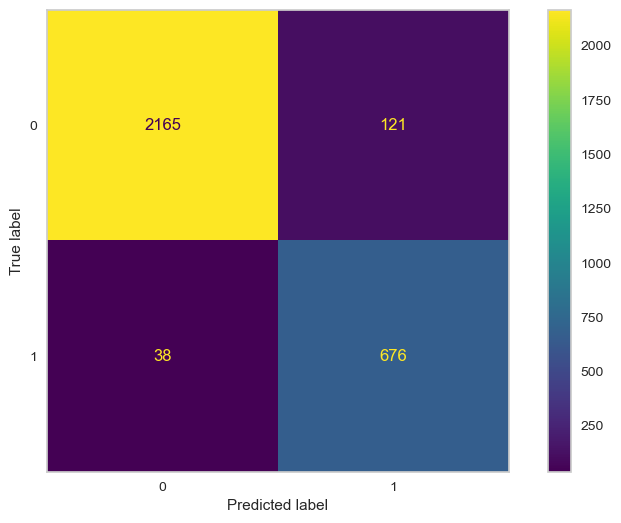




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9142
           1       0.87      0.94      0.90      2857

    accuracy                           0.95     11999
   macro avg       0.92      0.95      0.94     11999
weighted avg       0.95      0.95      0.95     11999



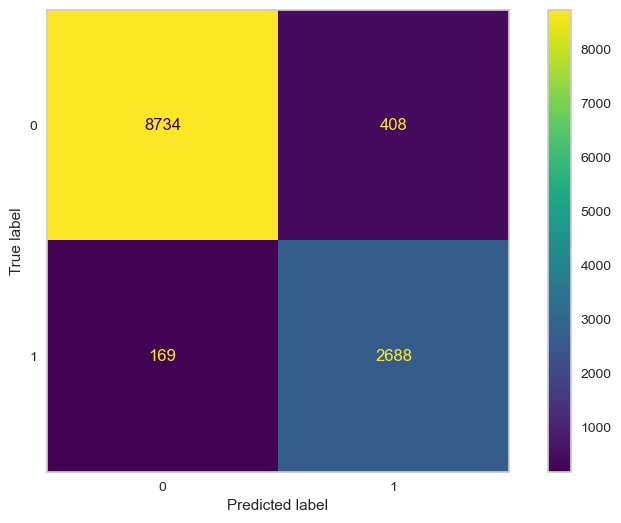

In [394]:
eval_metric_ann(grid_model, X_train, y_train, X_test, y_test)

94/94 [==============================] - 0s 1ms/step


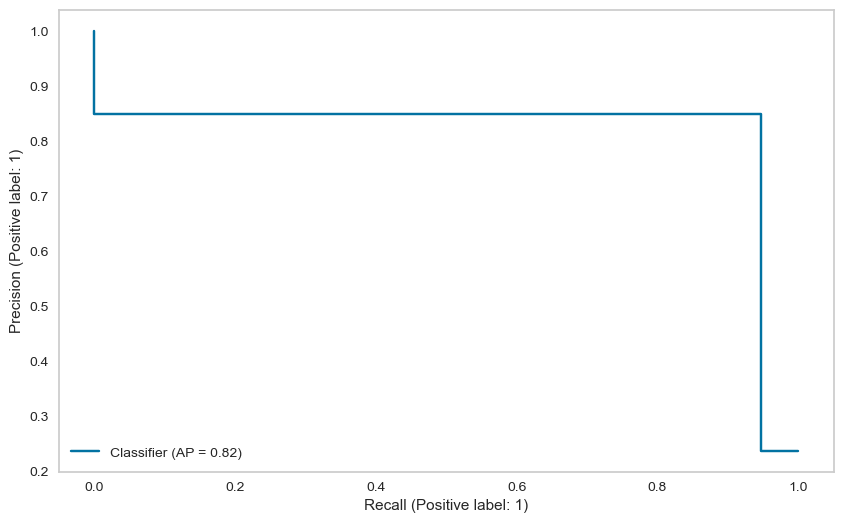

In [395]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = grid_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [396]:
average_precision_score(y_test, y_pred_proba)

0.8157060756548542

#### Prediction

In [397]:
# predict on train and test data

y_pred_test = grid_model.predict(X_test)
y_pred_train = grid_model.predict(X_train)

375/375 [==============================] - 1s 1ms/step


In [398]:
ANN_AP = average_precision_score(y_test, y_pred_proba)

ANN_f1_test = f1_score(y_test, y_pred_test)
ANN_f1_train = f1_score(y_train, y_pred_train)

ANN_recall_test = recall_score(y_test, y_pred_test)
ANN_recall_train = recall_score(y_train, y_pred_train)

ANN_AP, ANN_f1_test, ANN_f1_train, ANN_recall_test, ANN_recall_train

(0.8157060756548542,
 0.8947716743878226,
 0.9030740802956492,
 0.9467787114845938,
 0.9408470423521176)

### Model Comparision

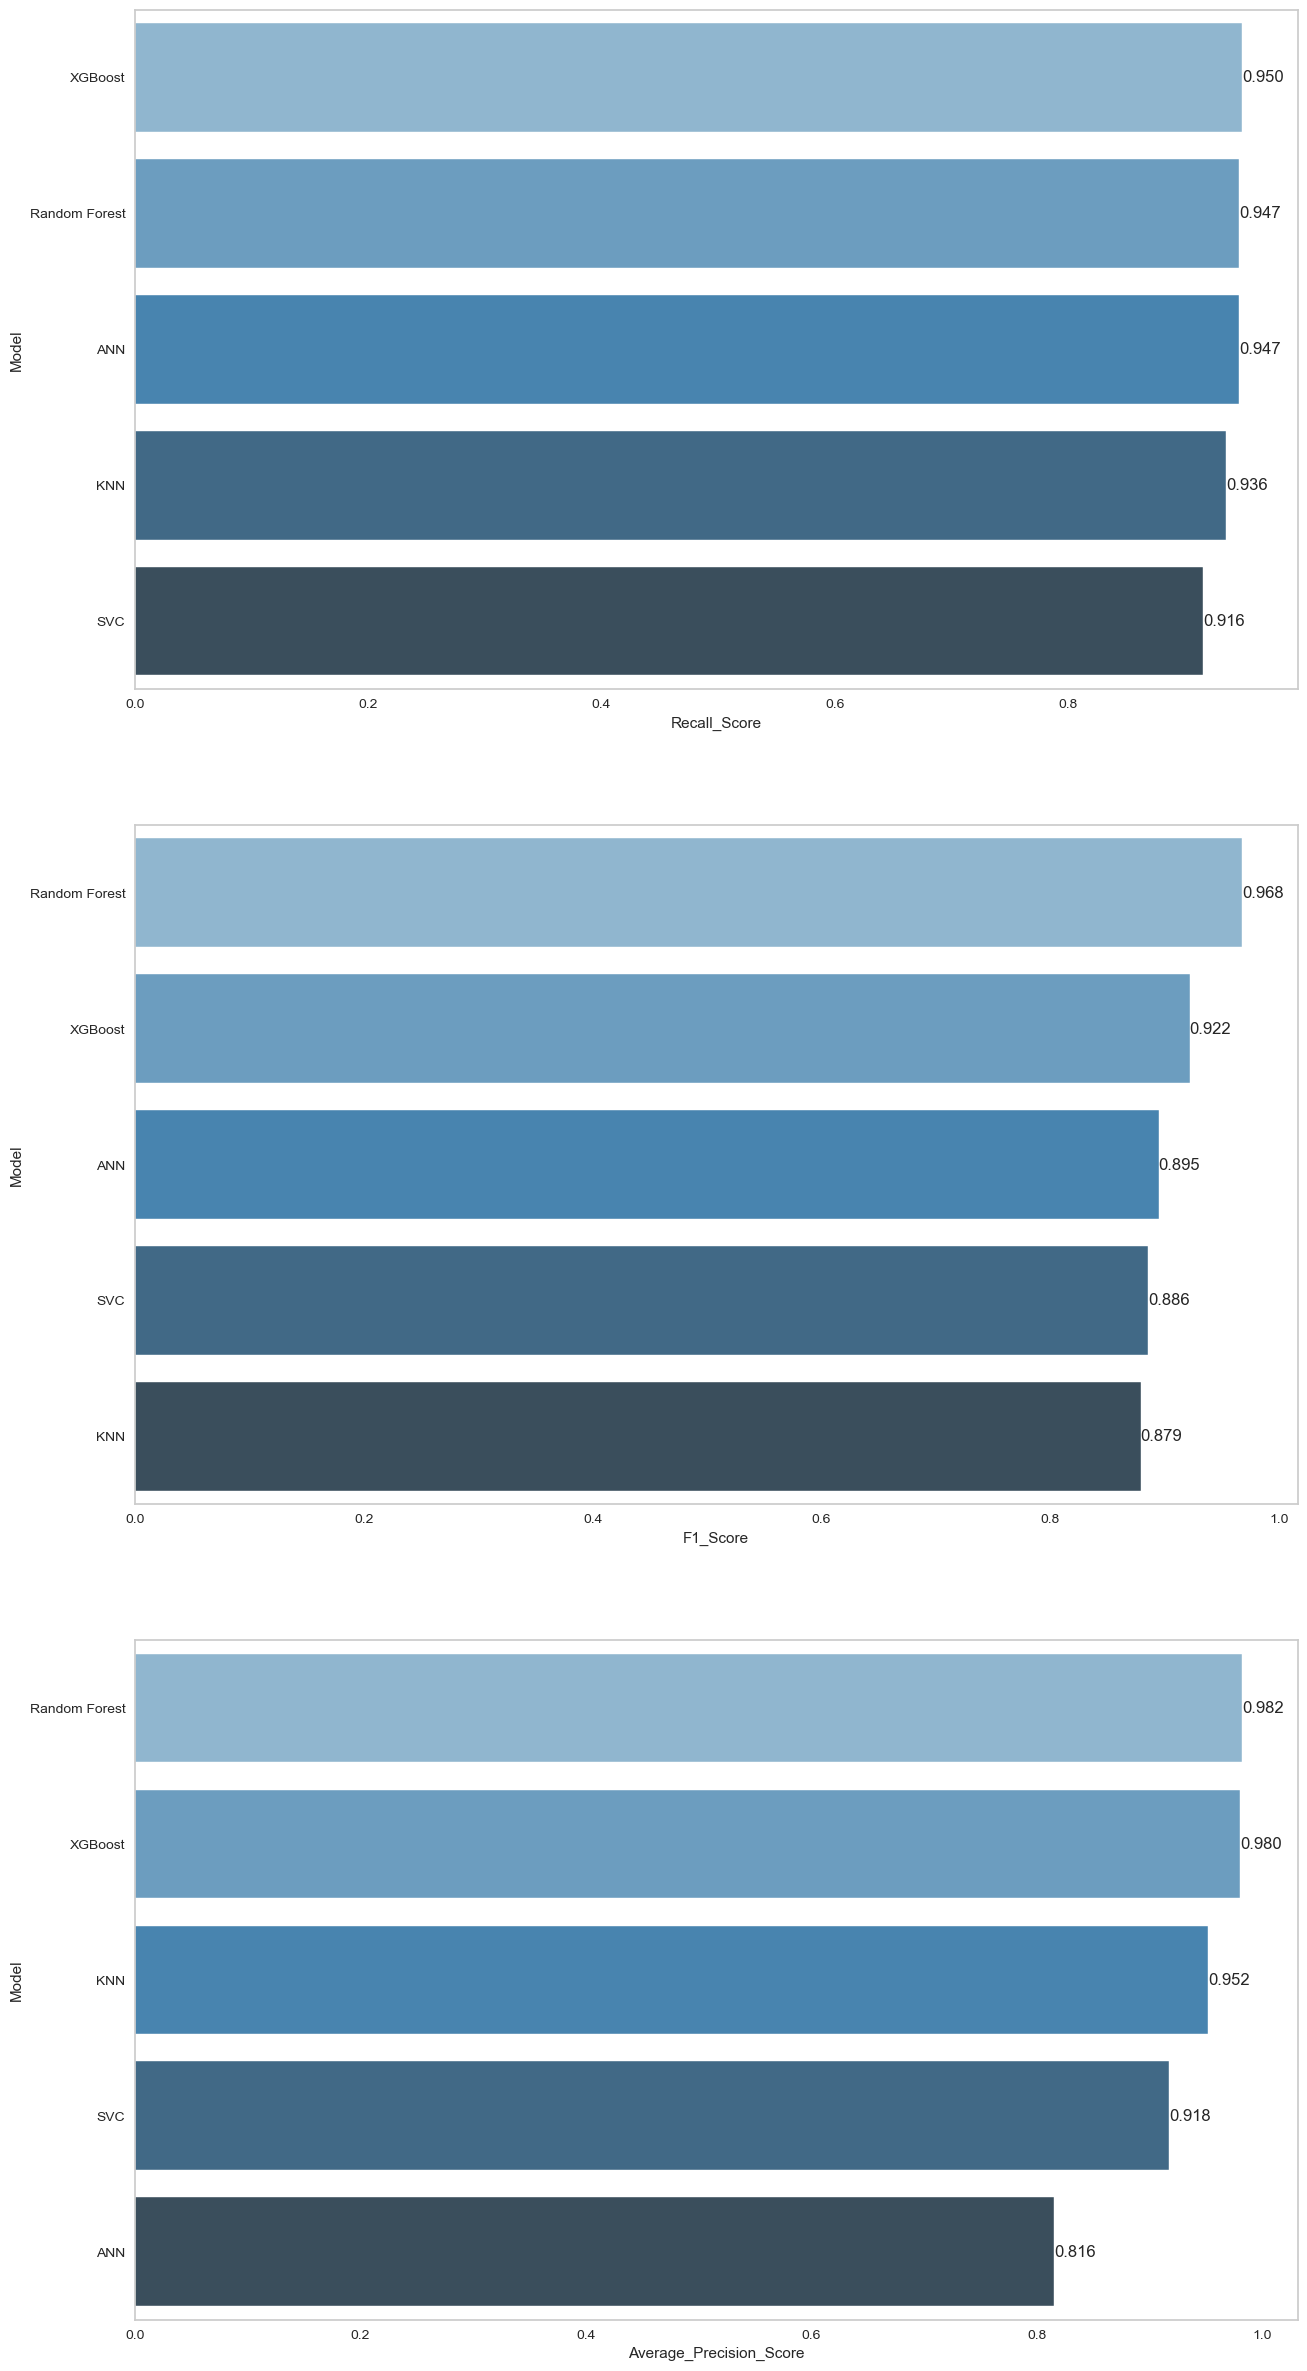

In [399]:
compare = pd.DataFrame({"Model": ["SVC", "KNN", "Random Forest", "XGBoost", "ANN"],
                        
                        "F1_Score": [KNN_f1_test, SVC_f1_test,  RF_f1_test,  XGB_f1_test, ANN_f1_test],
                        
                        "Recall_Score": [KNN_recall_test, SVC_recall_test, RF_recall_test, XGB_recall_test, ANN_recall_test],
                        
                        "Average_Precision_Score": [SVC_AP_test, KNN_AP, RF_AP, XGB_AP, ANN_AP]})




plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Final Model

**As we get the better model metrics with Random Forest model, we decided to use it as final model.**

In [425]:
X = df_with_dp.drop(columns="left")
y = df_with_dp.left

In [426]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['departments', 'salary']

In [427]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value',
                         unknown_value=-1
                        ) 

column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough'
                                      )

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(max_depth=10, n_estimators=100, class_weight="balanced", random_state=101))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments', 'salary'])])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=101))])

In [428]:
X.describe()

satisfaction_level  last_evaluation  number_project  \
count            14999.00         14999.00        14999.00   
mean                 0.61             0.72            3.80   
std                  0.25             0.17            1.23   
min                  0.09             0.36            2.00   
25%                  0.44             0.56            3.00   
50%                  0.64             0.72            4.00   
75%                  0.82             0.87            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  work_accident  \
count              14999.00            14999.00       14999.00   
mean                 201.05                3.50           0.14   
std                   49.94                1.46           0.35   
min                   96.00                2.00           0.00   
25%                  156.00                3.00           0.00   
50%                  200.00                3.00           0.00   
75%                  245.00                4.00           0.00   
max                  310.00               10.00           1.00   

       promotion_last_5years  
count               14999.00  
mean                    0.02  
std                     0.14  
min                     0.00  
25%                     0.00  
50%                     0.00  
75%                     0.00  
max                     1.00

In [429]:
X.describe(include="O")

departments salary
count        14999  14999
unique          10      3
top          sales    low
freq          4140   7316

In [430]:
my_dict = {
    "satisfaction_level": 0.64,
    "last_evaluation": 0.4,
    "number_project": 4,
    "average_montly_hours": 200,
    "time_spend_company": 3,
    "work_accident": 1,
    "promotion_last_5years": 0,
    "departments": "sales",
    "salary": "medium"
    
}

new_obs = pd.DataFrame([my_dict])
new_obs

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.64             0.40               4                   200   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              1                      0       sales   

   salary  
0  medium

In [431]:
final_model.predict(new_obs)

array([0], dtype=int64)

#### Feature Importance of Final Model

In [432]:
features = list(X.select_dtypes("object").columns) + list(X.select_dtypes("number").columns)
features

['departments',
 'salary',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years']

In [408]:
# 2nd way

# features = final_model["OrdinalEncoder"].get_feature_names_out()
# features

In [433]:
final_model[-1].feature_importances_

array([0.00826223, 0.00656751, 0.29115815, 0.13471091, 0.15180205,
       0.13947912, 0.26081747, 0.00650715, 0.00069542])

In [434]:
np.argsort(final_model[-1].feature_importances_)

array([8, 7, 1, 0, 3, 5, 4, 6, 2], dtype=int64)

In [435]:
df_f_i = pd.DataFrame(data = final_model[-1].feature_importances_, index=features,
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i

Feature Importance
satisfaction_level                   0.29
time_spend_company                   0.26
number_project                       0.15
average_montly_hours                 0.14
last_evaluation                      0.13
departments                          0.01
salary                               0.01
work_accident                        0.01
promotion_last_5years                0.00

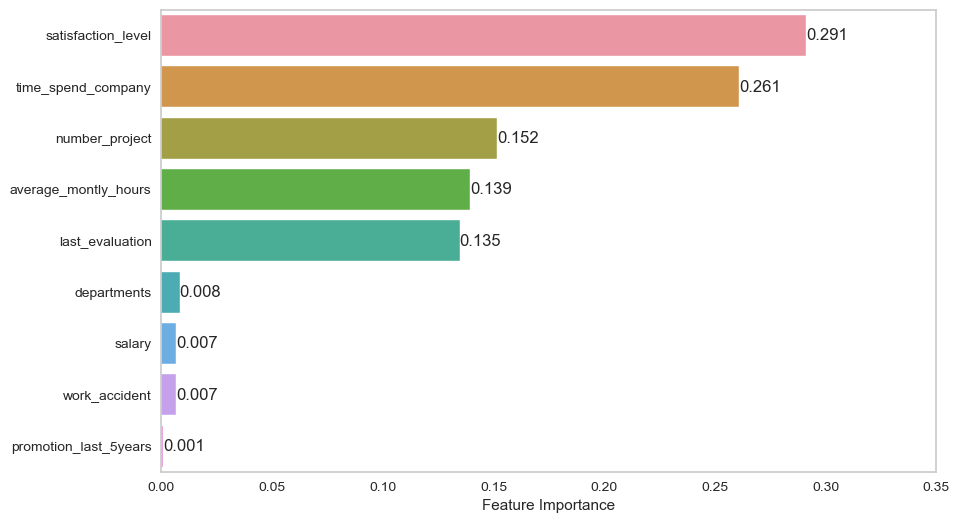

In [436]:
ax =sns.barplot(x = 'Feature Importance', y = df_f_i.index,  data = df_f_i)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xlim(right=0.35)
plt.show()

### Rebuilding Final Model with Most Important Features

In [437]:
X = X[["satisfaction_level", "time_spend_company", "average_montly_hours", "last_evaluation", "number_project"]]

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [439]:
X_train.head()

satisfaction_level  time_spend_company  average_montly_hours  \
9355                 0.70                   3                   168   
8808                 0.33                   3                   280   
11737                0.69                   6                   215   
8741                 0.50                   3                   142   
2143                 0.88                   4                   157   

       last_evaluation  number_project  
9355              0.66               4  
8808              0.95               4  
11737             0.66               3  
8741              0.67               2  
2143              0.68               5

In [440]:
# Reset Final Model

final_model = RandomForestClassifier(max_depth=10, n_estimators=10, class_weight="balanced", random_state=101)
final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=10,
                       random_state=101)

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2286
           1       0.98      0.95      0.97       714

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



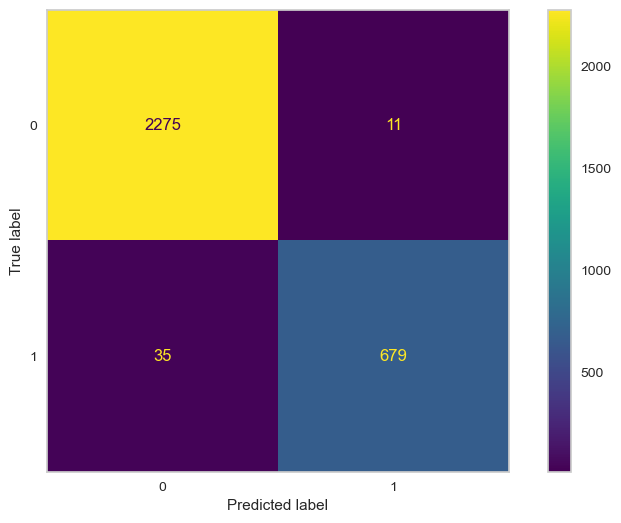




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9142
           1       0.99      0.96      0.98      2857

    accuracy                           0.99     11999
   macro avg       0.99      0.98      0.99     11999
weighted avg       0.99      0.99      0.99     11999



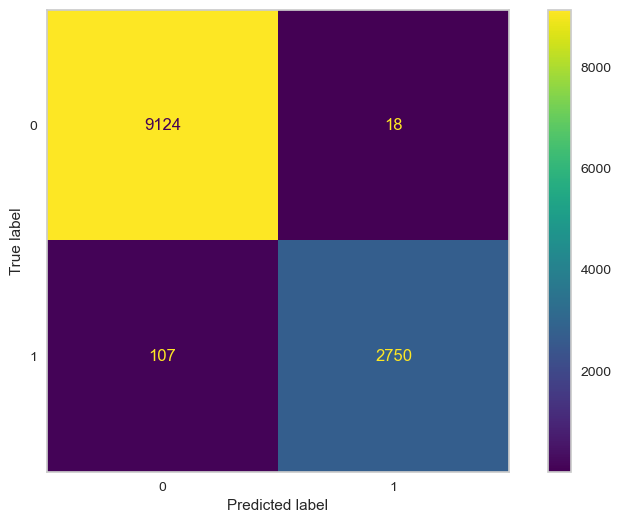

In [441]:
eval_metric(final_model, X_train, y_train, X_test, y_test)

In [443]:
model = RandomForestClassifier(max_depth=10, n_estimators=10, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.99
train_precision   0.99
test_recall       0.95
train_recall      0.97
test_f1           0.97
train_f1          0.98
test_accuracy     0.98
train_accuracy    0.99
dtype: float64

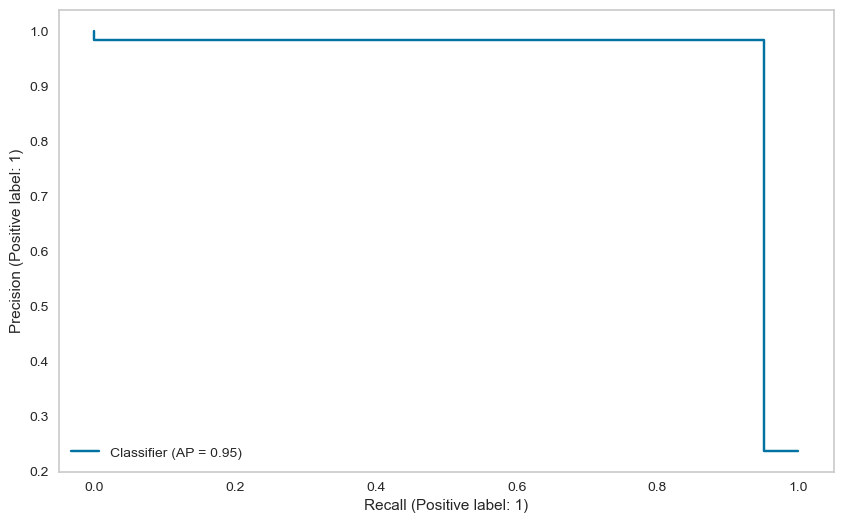

In [444]:
# plot precision recall curve

from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = final_model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

**When we build final model with the most important features, the evaluation metrics of the model was almost the same with we get from original model. So we decided to build final model with the most important features.**

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

In [445]:
X = df_with_dp[["satisfaction_level", "time_spend_company", "average_montly_hours", "last_evaluation", "number_project"]]
y = df_with_dp.left

In [446]:
final_model = RandomForestClassifier(max_depth=10, n_estimators=100, class_weight="balanced", random_state=101)

final_model.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=101)

In [447]:
# Saving final model

import pickle
pickle.dump(final_model, open("final_model_employee_churn", 'wb'))

In [448]:
# Exporting final model

model = pickle.load(open("final_model_employee_churn", "rb"))

In [449]:
model

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=101)

In [450]:
my_dict = {
    "satisfaction_level": 0.64,
    "time_spend_company": 3,
    "average_montly_hours": 200,
    "last_evaluation": 0.4,
    "number_project": 4,
    }

new_obs = pd.DataFrame([my_dict])
new_obs

satisfaction_level  time_spend_company  average_montly_hours  \
0                0.64                   3                   200   

   last_evaluation  number_project  
0             0.40               4

In [451]:
model.predict(new_obs)

array([0], dtype=int64)

### Save and Export Variables


In [452]:
df_with_dp[df_with_dp.left==1].iloc[1]  # left employee

satisfaction_level         0.80
last_evaluation            0.86
number_project                5
average_montly_hours        262
time_spend_company            6
work_accident                 0
left                          1
promotion_last_5years         0
departments               sales
salary                   medium
Name: 1, dtype: object

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___